In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../"))

# our library
from src.mcmc_sat import mcmc, sat

In [2]:
def gen_conf_matrix(y: np.ndarray):
    """
    Simple function to generate the configuration matrix for variable number of roads
    """
    num_vers = y.size+1
    num_pathways = num_vers-1

    pathways = []
    for i in range(1,num_vers+1):
        for j in range(1,num_vers+1):
            if i < j:
                pathways += [(i,j)]

    print(pathways)

    return np.array([[ 1 if (p1<=i and i<p2) else 0 for (p1,p2) in pathways] for i in range(1, num_pathways+1)])    

In [3]:
A = np.array([[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0],
[0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0],
[0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1]])

y=np.array([1087, 1008, 1068, 1204, 1158, 1151, 1143])

In [4]:
num_con = 3
yprime  = y[:num_con] #np.array([4*int(i/10) for i in y[:num_con]]) 
Aprime  = gen_conf_matrix(yprime)


print(Aprime)
print(yprime)
print([sum(x) for x in Aprime])


[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[[1 1 1 0 0 0]
 [0 1 1 1 1 0]
 [0 0 1 0 1 1]]
[1087 1008 1068]
[3, 4, 3]


In [5]:
trace = mcmc.sample_mh_trace_from_conf_matrix_sat(A=Aprime,y=yprime,
                                                  num_bits=11,
                                                  max_int_bv=2**9,
                                                  num_samples=10000)

[x24 = False,
 x59 = False,
 x04 = True,
 x06 = True,
 x07 = True,
 x51 = True,
 x15 = True,
 x48 = True,
 x39 = False,
 x18 = True,
 x45 = True,
 x22 = False,
 x43 = True,
 x40 = True,
 x34 = False,
 x23 = False,
 x52 = False,
 x30 = True,
 x55 = True,
 x20 = False,
 x10 = False,
 x53 = True,
 x32 = False,
 x37 = False,
 x44 = False,
 x41 = True,
 x01 = True,
 x56 = False,
 x33 = False,
 x35 = False,
 x54 = True,
 x57 = True,
 x21 = True,
 x42 = True,
 x25 = False,
 x26 = True,
 x49 = False,
 x36 = False,
 x47 = True,
 x46 = False,
 x58 = True,
 x50 = True,
 x17 = False,
 x38 = False,
 x31 = False,
 x19 = False,
 x14 = True,
 x12 = True,
 x02 = True,
 x05 = True,
 x16 = True,
 x13 = True,
 x11 = True,
 x09 = False,
 x29 = False,
 x27 = True,
 x03 = True,
 x00 = True,
 x28 = False,
 x08 = True,
 x4 = 431,
 x5 = 443,
 x3 = 1,
 x0 = 511,
 x210 = False,
 x010 = False,
 x1 = 382,
 x2 = 194,
 x410 = False,
 x310 = False,
 x110 = False,
 x510 = False]


Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	660/660/0
independent support size:  	0
clauses (all/long/binary/unit): 2769/2111/634/24
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	781 MB

STAGE #1: Build the initial partial assignments



time elapsed: 60.2401s



time elapsed: 121.24s



time elapsed: 182.242s



time elapsed: 243.242s



time elapsed: 304.24s


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...


Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	781 MB



Completing sample #1 of 9157 which has 21 variables unset and 1 sample.
Completing sample #2 of 9157 which has 98 variables unset and 1 sample.
Completing sample #3 of 9157 which has 82 variables unset and 1 sample.
Completing sample #4 of 9157 which has 51 variables unset and 1 sample.
Completing sample #5 of 9157 which has 79 variables unset and 1 sample.
Completing sample #6 of 9157 which has 54 variables unset and 1 sample.
Completing sample #7 of 9157 which has 26 variables unset and 1 sample.
Sample #8 of 9157 is already a complete assignment.  Continuing...
Completing sample #9 of 9157 which has 71 variables unset and 1 sample.
Completing sample #10 of 9157 which has 90 variables unset and 1 sample.
Completing sample #11 of 9157 which has 139 variables unset and 1 sample.
Completing sample #12 of 9157 which has 145 variables unset and 1 sample.
Completing sample #13 of 9157 which has 116 variables unset and 1 sample.
Completing sample #14 of 9157 which has 81 variables unset and

Completing sample #53 of 9157 which has 141 variables unset and 1 sample.
Completing sample #54 of 9157 which has 154 variables unset and 1 sample.
Completing sample #55 of 9157 which has 74 variables unset and 1 sample.
Completing sample #56 of 9157 which has 48 variables unset and 1 sample.
Completing sample #57 of 9157 which has 54 variables unset and 1 sample.
Completing sample #58 of 9157 which has 169 variables unset and 1 sample.
Completing sample #59 of 9157 which has 80 variables unset and 1 sample.
Completing sample #60 of 9157 which has 95 variables unset and 1 sample.
Completing sample #61 of 9157 which has 71 variables unset and 1 sample.
Completing sample #62 of 9157 which has 38 variables unset and 1 sample.
Completing sample #63 of 9157 which has 64 variables unset and 3 samples.
Completing sample #64 of 9157 which has 206 variables unset and 1 sample.
Completing sample #65 of 9157 which has 112 variables unset and 1 sample.
Completing sample #66 of 9157 which has 115 v

Completing sample #91 of 9157 which has 156 variables unset and 1 sample.
Completing sample #92 of 9157 which has 35 variables unset and 1 sample.
Completing sample #93 of 9157 which has 162 variables unset and 1 sample.
Completing sample #94 of 9157 which has 60 variables unset and 1 sample.
Completing sample #95 of 9157 which has 143 variables unset and 1 sample.
Completing sample #96 of 9157 which has 53 variables unset and 1 sample.
Completing sample #97 of 9157 which has 77 variables unset and 1 sample.
Completing sample #98 of 9157 which has 90 variables unset and 1 sample.
Completing sample #99 of 9157 which has 190 variables unset and 1 sample.
Completing sample #100 of 9157 which has 34 variables unset and 1 sample.
Completing sample #101 of 9157 which has 243 variables unset and 1 sample.
Completing sample #102 of 9157 which has 105 variables unset and 1 sample.
Completing sample #103 of 9157 which has 150 variables unset and 1 sample.
Completing sample #104 of 9157 which has

Completing sample #125 of 9157 which has 185 variables unset and 1 sample.
Completing sample #126 of 9157 which has 103 variables unset and 1 sample.
Completing sample #127 of 9157 which has 171 variables unset and 1 sample.
Completing sample #128 of 9157 which has 90 variables unset and 1 sample.
Completing sample #129 of 9157 which has 148 variables unset and 1 sample.
Completing sample #130 of 9157 which has 171 variables unset and 1 sample.
Completing sample #131 of 9157 which has 143 variables unset and 1 sample.
Completing sample #132 of 9157 which has 103 variables unset and 1 sample.
Completing sample #133 of 9157 which has 199 variables unset and 1 sample.
Completing sample #134 of 9157 which has 123 variables unset and 1 sample.
Completing sample #135 of 9157 which has 135 variables unset and 1 sample.
Completing sample #136 of 9157 which has 174 variables unset and 1 sample.
Completing sample #137 of 9157 which has 225 variables unset and 1 sample.
Completing sample #138 of 

Completing sample #161 of 9157 which has 198 variables unset and 1 sample.
Completing sample #162 of 9157 which has 129 variables unset and 1 sample.
Completing sample #163 of 9157 which has 155 variables unset and 1 sample.
Completing sample #164 of 9157 which has 133 variables unset and 1 sample.
Completing sample #165 of 9157 which has 129 variables unset and 1 sample.
Completing sample #166 of 9157 which has 67 variables unset and 1 sample.
Completing sample #167 of 9157 which has 118 variables unset and 1 sample.
Completing sample #168 of 9157 which has 154 variables unset and 1 sample.
Completing sample #169 of 9157 which has 179 variables unset and 1 sample.
Completing sample #170 of 9157 which has 208 variables unset and 1 sample.
Completing sample #171 of 9157 which has 204 variables unset and 1 sample.
Completing sample #172 of 9157 which has 140 variables unset and 1 sample.
Completing sample #173 of 9157 which has 217 variables unset and 1 sample.
Completing sample #174 of 

Completing sample #192 of 9157 which has 49 variables unset and 1 sample.
Completing sample #193 of 9157 which has 15 variables unset and 1 sample.
Completing sample #194 of 9157 which has 120 variables unset and 1 sample.
Completing sample #195 of 9157 which has 122 variables unset and 1 sample.
Completing sample #196 of 9157 which has 171 variables unset and 1 sample.
Completing sample #197 of 9157 which has 163 variables unset and 2 samples.
Completing sample #198 of 9157 which has 134 variables unset and 1 sample.
Completing sample #199 of 9157 which has 167 variables unset and 1 sample.
Completing sample #200 of 9157 which has 308 variables unset and 1 sample.
Completing sample #201 of 9157 which has 81 variables unset and 1 sample.
Completing sample #202 of 9157 which has 167 variables unset and 1 sample.
Completing sample #203 of 9157 which has 150 variables unset and 1 sample.
Completing sample #204 of 9157 which has 153 variables unset and 1 sample.
Completing sample #205 of 9

Completing sample #222 of 9157 which has 26 variables unset and 1 sample.
Completing sample #223 of 9157 which has 118 variables unset and 1 sample.
Completing sample #224 of 9157 which has 201 variables unset and 1 sample.
Completing sample #225 of 9157 which has 38 variables unset and 1 sample.
Completing sample #226 of 9157 which has 158 variables unset and 1 sample.
Completing sample #227 of 9157 which has 104 variables unset and 1 sample.
Completing sample #228 of 9157 which has 158 variables unset and 1 sample.
Completing sample #229 of 9157 which has 188 variables unset and 1 sample.
Completing sample #230 of 9157 which has 32 variables unset and 1 sample.
Completing sample #231 of 9157 which has 90 variables unset and 1 sample.
Completing sample #232 of 9157 which has 42 variables unset and 1 sample.
Completing sample #233 of 9157 which has 145 variables unset and 1 sample.
Completing sample #234 of 9157 which has 143 variables unset and 1 sample.
Completing sample #235 of 9157

Completing sample #261 of 9157 which has 101 variables unset and 1 sample.
Completing sample #262 of 9157 which has 217 variables unset and 1 sample.
Completing sample #263 of 9157 which has 163 variables unset and 1 sample.
Completing sample #264 of 9157 which has 132 variables unset and 1 sample.
Completing sample #265 of 9157 which has 188 variables unset and 1 sample.
Completing sample #266 of 9157 which has 229 variables unset and 1 sample.
Completing sample #267 of 9157 which has 178 variables unset and 1 sample.
Completing sample #268 of 9157 which has 107 variables unset and 1 sample.
Completing sample #269 of 9157 which has 141 variables unset and 1 sample.
Completing sample #270 of 9157 which has 161 variables unset and 1 sample.
Completing sample #271 of 9157 which has 184 variables unset and 1 sample.
Completing sample #272 of 9157 which has 152 variables unset and 1 sample.
Completing sample #273 of 9157 which has 154 variables unset and 1 sample.
Completing sample #274 of

Completing sample #304 of 9157 which has 117 variables unset and 1 sample.
Completing sample #305 of 9157 which has 207 variables unset and 1 sample.
Completing sample #306 of 9157 which has 75 variables unset and 1 sample.
Completing sample #307 of 9157 which has 206 variables unset and 1 sample.
Completing sample #308 of 9157 which has 236 variables unset and 1 sample.
Completing sample #309 of 9157 which has 93 variables unset and 1 sample.
Completing sample #310 of 9157 which has 73 variables unset and 1 sample.
Completing sample #311 of 9157 which has 90 variables unset and 1 sample.
Completing sample #312 of 9157 which has 69 variables unset and 1 sample.
Completing sample #313 of 9157 which has 65 variables unset and 1 sample.
Completing sample #314 of 9157 which has 171 variables unset and 1 sample.
Completing sample #315 of 9157 which has 133 variables unset and 1 sample.
Completing sample #316 of 9157 which has 55 variables unset and 1 sample.
Completing sample #317 of 9157 w

Completing sample #339 of 9157 which has 132 variables unset and 1 sample.
Completing sample #340 of 9157 which has 68 variables unset and 1 sample.
Completing sample #341 of 9157 which has 136 variables unset and 1 sample.
Completing sample #342 of 9157 which has 104 variables unset and 1 sample.
Completing sample #343 of 9157 which has 161 variables unset and 1 sample.
Completing sample #344 of 9157 which has 89 variables unset and 1 sample.
Completing sample #345 of 9157 which has 166 variables unset and 1 sample.
Completing sample #346 of 9157 which has 152 variables unset and 1 sample.
Completing sample #347 of 9157 which has 249 variables unset and 1 sample.
Completing sample #348 of 9157 which has 136 variables unset and 1 sample.
Completing sample #349 of 9157 which has 47 variables unset and 1 sample.
Completing sample #350 of 9157 which has 205 variables unset and 1 sample.
Completing sample #351 of 9157 which has 164 variables unset and 1 sample.
Completing sample #352 of 91

Completing sample #376 of 9157 which has 205 variables unset and 1 sample.
Completing sample #377 of 9157 which has 90 variables unset and 1 sample.
Completing sample #378 of 9157 which has 98 variables unset and 1 sample.
Completing sample #379 of 9157 which has 56 variables unset and 2 samples.
Completing sample #380 of 9157 which has 103 variables unset and 1 sample.
Completing sample #381 of 9157 which has 190 variables unset and 1 sample.
Completing sample #382 of 9157 which has 178 variables unset and 1 sample.
Completing sample #383 of 9157 which has 98 variables unset and 1 sample.
Completing sample #384 of 9157 which has 103 variables unset and 1 sample.
Completing sample #385 of 9157 which has 238 variables unset and 1 sample.
Completing sample #386 of 9157 which has 161 variables unset and 1 sample.
Completing sample #387 of 9157 which has 81 variables unset and 1 sample.
Completing sample #388 of 9157 which has 213 variables unset and 1 sample.
Completing sample #389 of 915

Completing sample #417 of 9157 which has 109 variables unset and 1 sample.
Completing sample #418 of 9157 which has 144 variables unset and 1 sample.
Completing sample #419 of 9157 which has 119 variables unset and 1 sample.
Completing sample #420 of 9157 which has 156 variables unset and 1 sample.
Completing sample #421 of 9157 which has 52 variables unset and 1 sample.
Completing sample #422 of 9157 which has 88 variables unset and 1 sample.
Completing sample #423 of 9157 which has 133 variables unset and 1 sample.
Completing sample #424 of 9157 which has 205 variables unset and 2 samples.
Completing sample #425 of 9157 which has 179 variables unset and 2 samples.
Completing sample #426 of 9157 which has 132 variables unset and 1 sample.
Completing sample #427 of 9157 which has 207 variables unset and 2 samples.
Completing sample #428 of 9157 which has 145 variables unset and 1 sample.
Completing sample #429 of 9157 which has 202 variables unset and 1 sample.
Completing sample #430 o

Completing sample #437 of 9157 which has 154 variables unset and 1 sample.
Completing sample #438 of 9157 which has 180 variables unset and 3 samples.
Completing sample #439 of 9157 which has 204 variables unset and 1 sample.
Completing sample #440 of 9157 which has 207 variables unset and 1 sample.
Completing sample #441 of 9157 which has 68 variables unset and 1 sample.
Completing sample #442 of 9157 which has 172 variables unset and 1 sample.
Completing sample #443 of 9157 which has 175 variables unset and 1 sample.
Completing sample #444 of 9157 which has 138 variables unset and 1 sample.
Completing sample #445 of 9157 which has 145 variables unset and 1 sample.
Completing sample #446 of 9157 which has 174 variables unset and 1 sample.
Completing sample #447 of 9157 which has 122 variables unset and 1 sample.
Completing sample #448 of 9157 which has 43 variables unset and 1 sample.
Completing sample #449 of 9157 which has 153 variables unset and 1 sample.
Completing sample #450 of 

Completing sample #460 of 9157 which has 137 variables unset and 1 sample.
Completing sample #461 of 9157 which has 177 variables unset and 1 sample.
Completing sample #462 of 9157 which has 167 variables unset and 1 sample.
Completing sample #463 of 9157 which has 155 variables unset and 2 samples.
Completing sample #464 of 9157 which has 177 variables unset and 1 sample.
Completing sample #465 of 9157 which has 109 variables unset and 1 sample.
Completing sample #466 of 9157 which has 121 variables unset and 1 sample.
Completing sample #467 of 9157 which has 147 variables unset and 1 sample.
Completing sample #468 of 9157 which has 183 variables unset and 1 sample.
Completing sample #469 of 9157 which has 182 variables unset and 1 sample.
Completing sample #470 of 9157 which has 198 variables unset and 1 sample.
Completing sample #471 of 9157 which has 208 variables unset and 1 sample.
Completing sample #472 of 9157 which has 206 variables unset and 2 samples.
Completing sample #473 

Completing sample #477 of 9157 which has 29 variables unset and 1 sample.
Completing sample #478 of 9157 which has 103 variables unset and 1 sample.
Completing sample #479 of 9157 which has 49 variables unset and 1 sample.
Completing sample #480 of 9157 which has 41 variables unset and 1 sample.
Completing sample #481 of 9157 which has 126 variables unset and 1 sample.
Completing sample #482 of 9157 which has 125 variables unset and 1 sample.
Completing sample #483 of 9157 which has 122 variables unset and 1 sample.
Completing sample #484 of 9157 which has 117 variables unset and 2 samples.
Completing sample #485 of 9157 which has 83 variables unset and 1 sample.
Completing sample #486 of 9157 which has 99 variables unset and 1 sample.
Completing sample #487 of 9157 which has 75 variables unset and 1 sample.
Completing sample #488 of 9157 which has 95 variables unset and 1 sample.
Completing sample #489 of 9157 which has 36 variables unset and 1 sample.
Completing sample #490 of 9157 w

Completing sample #520 of 9157 which has 120 variables unset and 1 sample.
Completing sample #521 of 9157 which has 107 variables unset and 1 sample.
Completing sample #522 of 9157 which has 41 variables unset and 1 sample.
Completing sample #523 of 9157 which has 185 variables unset and 1 sample.
Completing sample #524 of 9157 which has 128 variables unset and 1 sample.
Completing sample #525 of 9157 which has 26 variables unset and 1 sample.
Completing sample #526 of 9157 which has 161 variables unset and 1 sample.
Completing sample #527 of 9157 which has 138 variables unset and 1 sample.
Completing sample #528 of 9157 which has 97 variables unset and 1 sample.
Completing sample #529 of 9157 which has 194 variables unset and 1 sample.
Completing sample #530 of 9157 which has 156 variables unset and 1 sample.
Completing sample #531 of 9157 which has 189 variables unset and 1 sample.
Completing sample #532 of 9157 which has 124 variables unset and 1 sample.
Completing sample #533 of 91

Completing sample #558 of 9157 which has 103 variables unset and 1 sample.
Completing sample #559 of 9157 which has 197 variables unset and 1 sample.
Completing sample #560 of 9157 which has 241 variables unset and 1 sample.
Completing sample #561 of 9157 which has 94 variables unset and 1 sample.
Completing sample #562 of 9157 which has 108 variables unset and 1 sample.
Completing sample #563 of 9157 which has 55 variables unset and 1 sample.
Completing sample #564 of 9157 which has 19 variables unset and 2 samples.
Completing sample #565 of 9157 which has 20 variables unset and 1 sample.
Completing sample #566 of 9157 which has 101 variables unset and 1 sample.
Completing sample #567 of 9157 which has 154 variables unset and 1 sample.
Completing sample #568 of 9157 which has 133 variables unset and 1 sample.
Completing sample #569 of 9157 which has 147 variables unset and 1 sample.
Completing sample #570 of 9157 which has 118 variables unset and 1 sample.
Completing sample #571 of 91

Completing sample #593 of 9157 which has 198 variables unset and 1 sample.
Completing sample #594 of 9157 which has 139 variables unset and 1 sample.
Completing sample #595 of 9157 which has 169 variables unset and 1 sample.
Completing sample #596 of 9157 which has 186 variables unset and 1 sample.
Completing sample #597 of 9157 which has 33 variables unset and 1 sample.
Completing sample #598 of 9157 which has 154 variables unset and 1 sample.
Completing sample #599 of 9157 which has 153 variables unset and 1 sample.
Completing sample #600 of 9157 which has 186 variables unset and 1 sample.
Completing sample #601 of 9157 which has 100 variables unset and 1 sample.
Completing sample #602 of 9157 which has 161 variables unset and 1 sample.
Completing sample #603 of 9157 which has 163 variables unset and 1 sample.
Completing sample #604 of 9157 which has 278 variables unset and 1 sample.
Completing sample #605 of 9157 which has 184 variables unset and 1 sample.
Completing sample #606 of 

Completing sample #630 of 9157 which has 79 variables unset and 2 samples.
Completing sample #631 of 9157 which has 219 variables unset and 1 sample.
Completing sample #632 of 9157 which has 90 variables unset and 1 sample.
Completing sample #633 of 9157 which has 178 variables unset and 1 sample.
Completing sample #634 of 9157 which has 119 variables unset and 1 sample.
Completing sample #635 of 9157 which has 140 variables unset and 1 sample.
Completing sample #636 of 9157 which has 165 variables unset and 2 samples.
Completing sample #637 of 9157 which has 210 variables unset and 1 sample.
Completing sample #638 of 9157 which has 141 variables unset and 1 sample.
Completing sample #639 of 9157 which has 197 variables unset and 1 sample.
Completing sample #640 of 9157 which has 223 variables unset and 1 sample.
Completing sample #641 of 9157 which has 82 variables unset and 1 sample.
Completing sample #642 of 9157 which has 116 variables unset and 1 sample.
Completing sample #643 of 

Completing sample #668 of 9157 which has 131 variables unset and 1 sample.
Completing sample #669 of 9157 which has 115 variables unset and 1 sample.
Completing sample #670 of 9157 which has 33 variables unset and 1 sample.
Completing sample #671 of 9157 which has 109 variables unset and 2 samples.
Completing sample #672 of 9157 which has 144 variables unset and 1 sample.
Completing sample #673 of 9157 which has 119 variables unset and 1 sample.
Completing sample #674 of 9157 which has 158 variables unset and 1 sample.
Completing sample #675 of 9157 which has 158 variables unset and 1 sample.
Completing sample #676 of 9157 which has 163 variables unset and 1 sample.
Completing sample #677 of 9157 which has 148 variables unset and 1 sample.
Completing sample #678 of 9157 which has 116 variables unset and 1 sample.
Completing sample #679 of 9157 which has 136 variables unset and 1 sample.
Completing sample #680 of 9157 which has 15 variables unset and 1 sample.
Completing sample #681 of 

Completing sample #708 of 9157 which has 116 variables unset and 1 sample.
Completing sample #709 of 9157 which has 177 variables unset and 1 sample.
Completing sample #710 of 9157 which has 130 variables unset and 1 sample.
Completing sample #711 of 9157 which has 59 variables unset and 1 sample.
Completing sample #712 of 9157 which has 144 variables unset and 1 sample.
Completing sample #713 of 9157 which has 160 variables unset and 1 sample.
Completing sample #714 of 9157 which has 166 variables unset and 1 sample.
Completing sample #715 of 9157 which has 42 variables unset and 1 sample.
Completing sample #716 of 9157 which has 38 variables unset and 1 sample.
Completing sample #717 of 9157 which has 195 variables unset and 2 samples.
Completing sample #718 of 9157 which has 35 variables unset and 1 sample.
Completing sample #719 of 9157 which has 27 variables unset and 1 sample.
Completing sample #720 of 9157 which has 195 variables unset and 1 sample.
Completing sample #721 of 915

Completing sample #740 of 9157 which has 203 variables unset and 1 sample.
Completing sample #741 of 9157 which has 209 variables unset and 1 sample.
Completing sample #742 of 9157 which has 232 variables unset and 1 sample.
Completing sample #743 of 9157 which has 184 variables unset and 1 sample.
Completing sample #744 of 9157 which has 133 variables unset and 1 sample.
Completing sample #745 of 9157 which has 140 variables unset and 1 sample.
Completing sample #746 of 9157 which has 13 variables unset and 2 samples.
Completing sample #747 of 9157 which has 201 variables unset and 1 sample.
Completing sample #748 of 9157 which has 255 variables unset and 1 sample.
Completing sample #749 of 9157 which has 76 variables unset and 1 sample.
Completing sample #750 of 9157 which has 188 variables unset and 1 sample.
Completing sample #751 of 9157 which has 88 variables unset and 1 sample.
Completing sample #752 of 9157 which has 160 variables unset and 1 sample.
Completing sample #753 of 9

Completing sample #771 of 9157 which has 125 variables unset and 1 sample.
Completing sample #772 of 9157 which has 156 variables unset and 2 samples.
Completing sample #773 of 9157 which has 117 variables unset and 1 sample.
Completing sample #774 of 9157 which has 136 variables unset and 1 sample.
Completing sample #775 of 9157 which has 51 variables unset and 1 sample.
Completing sample #776 of 9157 which has 142 variables unset and 1 sample.
Completing sample #777 of 9157 which has 29 variables unset and 1 sample.
Completing sample #778 of 9157 which has 215 variables unset and 1 sample.
Completing sample #779 of 9157 which has 157 variables unset and 1 sample.
Completing sample #780 of 9157 which has 158 variables unset and 2 samples.
Completing sample #781 of 9157 which has 84 variables unset and 1 sample.
Completing sample #782 of 9157 which has 126 variables unset and 1 sample.
Completing sample #783 of 9157 which has 60 variables unset and 1 sample.
Completing sample #784 of 9

Completing sample #807 of 9157 which has 228 variables unset and 1 sample.
Completing sample #808 of 9157 which has 256 variables unset and 2 samples.
Completing sample #809 of 9157 which has 202 variables unset and 1 sample.
Completing sample #810 of 9157 which has 209 variables unset and 1 sample.
Completing sample #811 of 9157 which has 160 variables unset and 1 sample.
Completing sample #812 of 9157 which has 212 variables unset and 1 sample.
Completing sample #813 of 9157 which has 148 variables unset and 1 sample.
Completing sample #814 of 9157 which has 123 variables unset and 1 sample.
Completing sample #815 of 9157 which has 155 variables unset and 1 sample.
Completing sample #816 of 9157 which has 193 variables unset and 1 sample.
Completing sample #817 of 9157 which has 210 variables unset and 1 sample.
Completing sample #818 of 9157 which has 180 variables unset and 1 sample.
Completing sample #819 of 9157 which has 222 variables unset and 1 sample.
Completing sample #820 o

Completing sample #833 of 9157 which has 151 variables unset and 1 sample.
Completing sample #834 of 9157 which has 65 variables unset and 1 sample.
Completing sample #835 of 9157 which has 136 variables unset and 1 sample.
Completing sample #836 of 9157 which has 161 variables unset and 1 sample.
Completing sample #837 of 9157 which has 249 variables unset and 1 sample.
Completing sample #838 of 9157 which has 150 variables unset and 1 sample.
Completing sample #839 of 9157 which has 175 variables unset and 1 sample.
Completing sample #840 of 9157 which has 133 variables unset and 1 sample.
Completing sample #841 of 9157 which has 232 variables unset and 1 sample.
Completing sample #842 of 9157 which has 53 variables unset and 1 sample.
Completing sample #843 of 9157 which has 152 variables unset and 1 sample.
Completing sample #844 of 9157 which has 84 variables unset and 1 sample.
Completing sample #845 of 9157 which has 98 variables unset and 1 sample.
Completing sample #846 of 915

Completing sample #871 of 9157 which has 175 variables unset and 1 sample.
Completing sample #872 of 9157 which has 208 variables unset and 1 sample.
Completing sample #873 of 9157 which has 164 variables unset and 1 sample.
Completing sample #874 of 9157 which has 232 variables unset and 1 sample.
Completing sample #875 of 9157 which has 87 variables unset and 1 sample.
Completing sample #876 of 9157 which has 199 variables unset and 1 sample.
Completing sample #877 of 9157 which has 237 variables unset and 1 sample.
Completing sample #878 of 9157 which has 112 variables unset and 1 sample.
Completing sample #879 of 9157 which has 75 variables unset and 1 sample.
Completing sample #880 of 9157 which has 51 variables unset and 1 sample.
Completing sample #881 of 9157 which has 111 variables unset and 1 sample.
Completing sample #882 of 9157 which has 126 variables unset and 1 sample.
Completing sample #883 of 9157 which has 102 variables unset and 1 sample.
Completing sample #884 of 91

Completing sample #906 of 9157 which has 108 variables unset and 1 sample.
Completing sample #907 of 9157 which has 147 variables unset and 1 sample.
Completing sample #908 of 9157 which has 93 variables unset and 1 sample.
Completing sample #909 of 9157 which has 156 variables unset and 1 sample.
Completing sample #910 of 9157 which has 143 variables unset and 1 sample.
Completing sample #911 of 9157 which has 59 variables unset and 1 sample.
Completing sample #912 of 9157 which has 119 variables unset and 1 sample.
Completing sample #913 of 9157 which has 113 variables unset and 1 sample.
Completing sample #914 of 9157 which has 103 variables unset and 1 sample.
Completing sample #915 of 9157 which has 202 variables unset and 1 sample.
Completing sample #916 of 9157 which has 192 variables unset and 1 sample.
Completing sample #917 of 9157 which has 135 variables unset and 1 sample.
Completing sample #918 of 9157 which has 182 variables unset and 1 sample.
Completing sample #919 of 9

Completing sample #944 of 9157 which has 200 variables unset and 1 sample.
Completing sample #945 of 9157 which has 145 variables unset and 1 sample.
Completing sample #946 of 9157 which has 181 variables unset and 1 sample.
Completing sample #947 of 9157 which has 206 variables unset and 1 sample.
Completing sample #948 of 9157 which has 181 variables unset and 1 sample.
Completing sample #949 of 9157 which has 178 variables unset and 1 sample.
Completing sample #950 of 9157 which has 114 variables unset and 1 sample.
Completing sample #951 of 9157 which has 231 variables unset and 1 sample.
Completing sample #952 of 9157 which has 237 variables unset and 1 sample.
Completing sample #953 of 9157 which has 100 variables unset and 1 sample.
Completing sample #954 of 9157 which has 142 variables unset and 1 sample.
Completing sample #955 of 9157 which has 121 variables unset and 1 sample.
Completing sample #956 of 9157 which has 121 variables unset and 1 sample.
Completing sample #957 of

Completing sample #984 of 9157 which has 230 variables unset and 1 sample.
Completing sample #985 of 9157 which has 224 variables unset and 1 sample.
Completing sample #986 of 9157 which has 182 variables unset and 1 sample.
Completing sample #987 of 9157 which has 143 variables unset and 1 sample.
Completing sample #988 of 9157 which has 195 variables unset and 2 samples.
Completing sample #989 of 9157 which has 131 variables unset and 1 sample.
Completing sample #990 of 9157 which has 97 variables unset and 1 sample.
Completing sample #991 of 9157 which has 143 variables unset and 1 sample.
Completing sample #992 of 9157 which has 40 variables unset and 1 sample.
Completing sample #993 of 9157 which has 182 variables unset and 1 sample.
Completing sample #994 of 9157 which has 114 variables unset and 1 sample.
Completing sample #995 of 9157 which has 144 variables unset and 1 sample.
Completing sample #996 of 9157 which has 61 variables unset and 1 sample.
Completing sample #997 of 9

Completing sample #1022 of 9157 which has 107 variables unset and 1 sample.
Completing sample #1023 of 9157 which has 232 variables unset and 1 sample.
Completing sample #1024 of 9157 which has 268 variables unset and 1 sample.
Completing sample #1025 of 9157 which has 143 variables unset and 1 sample.
Completing sample #1026 of 9157 which has 65 variables unset and 1 sample.
Completing sample #1027 of 9157 which has 166 variables unset and 1 sample.
Completing sample #1028 of 9157 which has 183 variables unset and 2 samples.
Completing sample #1029 of 9157 which has 203 variables unset and 1 sample.
Completing sample #1030 of 9157 which has 166 variables unset and 1 sample.
Completing sample #1031 of 9157 which has 173 variables unset and 1 sample.
Completing sample #1032 of 9157 which has 173 variables unset and 1 sample.
Completing sample #1033 of 9157 which has 191 variables unset and 1 sample.
Completing sample #1034 of 9157 which has 254 variables unset and 2 samples.
Completing 

Completing sample #1051 of 9157 which has 130 variables unset and 1 sample.
Completing sample #1052 of 9157 which has 154 variables unset and 1 sample.
Completing sample #1053 of 9157 which has 83 variables unset and 1 sample.
Completing sample #1054 of 9157 which has 205 variables unset and 1 sample.
Completing sample #1055 of 9157 which has 262 variables unset and 2 samples.
Completing sample #1056 of 9157 which has 153 variables unset and 1 sample.
Completing sample #1057 of 9157 which has 241 variables unset and 1 sample.
Completing sample #1058 of 9157 which has 189 variables unset and 1 sample.
Completing sample #1059 of 9157 which has 162 variables unset and 1 sample.
Completing sample #1060 of 9157 which has 122 variables unset and 1 sample.
Completing sample #1061 of 9157 which has 160 variables unset and 1 sample.
Completing sample #1062 of 9157 which has 168 variables unset and 1 sample.
Completing sample #1063 of 9157 which has 102 variables unset and 1 sample.
Completing s

Completing sample #1086 of 9157 which has 214 variables unset and 1 sample.
Completing sample #1087 of 9157 which has 222 variables unset and 1 sample.
Completing sample #1088 of 9157 which has 195 variables unset and 1 sample.
Completing sample #1089 of 9157 which has 76 variables unset and 1 sample.
Completing sample #1090 of 9157 which has 262 variables unset and 1 sample.
Completing sample #1091 of 9157 which has 79 variables unset and 1 sample.
Completing sample #1092 of 9157 which has 30 variables unset and 1 sample.
Completing sample #1093 of 9157 which has 164 variables unset and 1 sample.
Completing sample #1094 of 9157 which has 99 variables unset and 1 sample.
Completing sample #1095 of 9157 which has 150 variables unset and 1 sample.
Completing sample #1096 of 9157 which has 174 variables unset and 1 sample.
Completing sample #1097 of 9157 which has 310 variables unset and 1 sample.
Completing sample #1098 of 9157 which has 111 variables unset and 1 sample.
Completing sampl

Completing sample #1119 of 9157 which has 221 variables unset and 1 sample.
Completing sample #1120 of 9157 which has 223 variables unset and 1 sample.
Completing sample #1121 of 9157 which has 194 variables unset and 1 sample.
Completing sample #1122 of 9157 which has 214 variables unset and 2 samples.
Completing sample #1123 of 9157 which has 179 variables unset and 1 sample.
Completing sample #1124 of 9157 which has 143 variables unset and 1 sample.
Completing sample #1125 of 9157 which has 91 variables unset and 1 sample.
Completing sample #1126 of 9157 which has 175 variables unset and 1 sample.
Completing sample #1127 of 9157 which has 152 variables unset and 1 sample.
Completing sample #1128 of 9157 which has 148 variables unset and 1 sample.
Completing sample #1129 of 9157 which has 144 variables unset and 1 sample.
Completing sample #1130 of 9157 which has 158 variables unset and 1 sample.
Completing sample #1131 of 9157 which has 204 variables unset and 1 sample.
Completing s

Completing sample #1146 of 9157 which has 115 variables unset and 1 sample.
Completing sample #1147 of 9157 which has 100 variables unset and 1 sample.
Completing sample #1148 of 9157 which has 262 variables unset and 1 sample.
Completing sample #1149 of 9157 which has 209 variables unset and 1 sample.
Completing sample #1150 of 9157 which has 168 variables unset and 1 sample.
Completing sample #1151 of 9157 which has 157 variables unset and 1 sample.
Completing sample #1152 of 9157 which has 112 variables unset and 1 sample.
Completing sample #1153 of 9157 which has 123 variables unset and 1 sample.
Completing sample #1154 of 9157 which has 173 variables unset and 1 sample.
Completing sample #1155 of 9157 which has 155 variables unset and 1 sample.
Completing sample #1156 of 9157 which has 180 variables unset and 1 sample.
Completing sample #1157 of 9157 which has 150 variables unset and 1 sample.
Completing sample #1158 of 9157 which has 43 variables unset and 1 sample.
Completing sa

Completing sample #1180 of 9157 which has 193 variables unset and 1 sample.
Completing sample #1181 of 9157 which has 168 variables unset and 1 sample.
Completing sample #1182 of 9157 which has 57 variables unset and 1 sample.
Completing sample #1183 of 9157 which has 105 variables unset and 1 sample.
Completing sample #1184 of 9157 which has 71 variables unset and 1 sample.
Completing sample #1185 of 9157 which has 148 variables unset and 1 sample.
Completing sample #1186 of 9157 which has 220 variables unset and 1 sample.
Completing sample #1187 of 9157 which has 116 variables unset and 1 sample.
Completing sample #1188 of 9157 which has 242 variables unset and 1 sample.
Completing sample #1189 of 9157 which has 223 variables unset and 1 sample.
Completing sample #1190 of 9157 which has 132 variables unset and 1 sample.
Completing sample #1191 of 9157 which has 103 variables unset and 1 sample.
Completing sample #1192 of 9157 which has 74 variables unset and 1 sample.
Completing samp

Completing sample #1213 of 9157 which has 113 variables unset and 1 sample.
Completing sample #1214 of 9157 which has 102 variables unset and 1 sample.
Completing sample #1215 of 9157 which has 33 variables unset and 1 sample.
Completing sample #1216 of 9157 which has 172 variables unset and 1 sample.
Completing sample #1217 of 9157 which has 189 variables unset and 1 sample.
Completing sample #1218 of 9157 which has 213 variables unset and 1 sample.
Completing sample #1219 of 9157 which has 200 variables unset and 1 sample.
Completing sample #1220 of 9157 which has 170 variables unset and 1 sample.
Completing sample #1221 of 9157 which has 152 variables unset and 1 sample.
Completing sample #1222 of 9157 which has 130 variables unset and 1 sample.
Completing sample #1223 of 9157 which has 37 variables unset and 1 sample.
Completing sample #1224 of 9157 which has 111 variables unset and 1 sample.
Completing sample #1225 of 9157 which has 193 variables unset and 1 sample.
Completing sam

Completing sample #1249 of 9157 which has 245 variables unset and 1 sample.
Completing sample #1250 of 9157 which has 248 variables unset and 1 sample.
Completing sample #1251 of 9157 which has 244 variables unset and 1 sample.
Completing sample #1252 of 9157 which has 254 variables unset and 1 sample.
Completing sample #1253 of 9157 which has 236 variables unset and 1 sample.
Completing sample #1254 of 9157 which has 240 variables unset and 1 sample.
Completing sample #1255 of 9157 which has 133 variables unset and 1 sample.
Completing sample #1256 of 9157 which has 215 variables unset and 1 sample.
Completing sample #1257 of 9157 which has 227 variables unset and 1 sample.
Completing sample #1258 of 9157 which has 174 variables unset and 1 sample.
Completing sample #1259 of 9157 which has 56 variables unset and 1 sample.
Completing sample #1260 of 9157 which has 131 variables unset and 1 sample.
Completing sample #1261 of 9157 which has 245 variables unset and 1 sample.
Completing sa

Completing sample #1282 of 9157 which has 209 variables unset and 1 sample.
Completing sample #1283 of 9157 which has 201 variables unset and 1 sample.
Completing sample #1284 of 9157 which has 196 variables unset and 1 sample.
Completing sample #1285 of 9157 which has 60 variables unset and 1 sample.
Completing sample #1286 of 9157 which has 249 variables unset and 1 sample.
Completing sample #1287 of 9157 which has 68 variables unset and 1 sample.
Completing sample #1288 of 9157 which has 210 variables unset and 1 sample.
Completing sample #1289 of 9157 which has 210 variables unset and 1 sample.
Completing sample #1290 of 9157 which has 257 variables unset and 1 sample.
Completing sample #1291 of 9157 which has 230 variables unset and 1 sample.
Completing sample #1292 of 9157 which has 170 variables unset and 1 sample.
Completing sample #1293 of 9157 which has 186 variables unset and 1 sample.
Completing sample #1294 of 9157 which has 112 variables unset and 1 sample.
Completing sam

Completing sample #1304 of 9157 which has 143 variables unset and 1 sample.
Completing sample #1305 of 9157 which has 224 variables unset and 1 sample.
Completing sample #1306 of 9157 which has 181 variables unset and 1 sample.
Completing sample #1307 of 9157 which has 245 variables unset and 1 sample.
Completing sample #1308 of 9157 which has 197 variables unset and 1 sample.
Completing sample #1309 of 9157 which has 98 variables unset and 1 sample.
Completing sample #1310 of 9157 which has 224 variables unset and 1 sample.
Completing sample #1311 of 9157 which has 187 variables unset and 1 sample.
Completing sample #1312 of 9157 which has 188 variables unset and 1 sample.
Completing sample #1313 of 9157 which has 175 variables unset and 1 sample.
Completing sample #1314 of 9157 which has 168 variables unset and 1 sample.
Completing sample #1315 of 9157 which has 243 variables unset and 1 sample.
Completing sample #1316 of 9157 which has 175 variables unset and 3 samples.
Completing s

Completing sample #1326 of 9157 which has 131 variables unset and 1 sample.
Completing sample #1327 of 9157 which has 172 variables unset and 1 sample.
Completing sample #1328 of 9157 which has 193 variables unset and 1 sample.
Completing sample #1329 of 9157 which has 218 variables unset and 2 samples.
Completing sample #1330 of 9157 which has 220 variables unset and 1 sample.
Completing sample #1331 of 9157 which has 201 variables unset and 1 sample.
Completing sample #1332 of 9157 which has 212 variables unset and 1 sample.
Completing sample #1333 of 9157 which has 230 variables unset and 1 sample.
Completing sample #1334 of 9157 which has 197 variables unset and 1 sample.
Completing sample #1335 of 9157 which has 121 variables unset and 1 sample.
Completing sample #1336 of 9157 which has 193 variables unset and 1 sample.
Completing sample #1337 of 9157 which has 238 variables unset and 1 sample.
Completing sample #1338 of 9157 which has 173 variables unset and 1 sample.
Completing 

Completing sample #1347 of 9157 which has 116 variables unset and 1 sample.
Completing sample #1348 of 9157 which has 181 variables unset and 3 samples.
Completing sample #1349 of 9157 which has 175 variables unset and 2 samples.
Completing sample #1350 of 9157 which has 141 variables unset and 1 sample.
Completing sample #1351 of 9157 which has 160 variables unset and 1 sample.
Completing sample #1352 of 9157 which has 138 variables unset and 1 sample.
Completing sample #1353 of 9157 which has 73 variables unset and 1 sample.
Completing sample #1354 of 9157 which has 114 variables unset and 1 sample.
Completing sample #1355 of 9157 which has 210 variables unset and 1 sample.
Completing sample #1356 of 9157 which has 114 variables unset and 1 sample.
Completing sample #1357 of 9157 which has 142 variables unset and 1 sample.
Completing sample #1358 of 9157 which has 22 variables unset and 1 sample.
Completing sample #1359 of 9157 which has 184 variables unset and 1 sample.
Completing s

Completing sample #1375 of 9157 which has 149 variables unset and 1 sample.
Completing sample #1376 of 9157 which has 41 variables unset and 1 sample.
Completing sample #1377 of 9157 which has 112 variables unset and 1 sample.
Completing sample #1378 of 9157 which has 146 variables unset and 1 sample.
Completing sample #1379 of 9157 which has 124 variables unset and 1 sample.
Completing sample #1380 of 9157 which has 233 variables unset and 1 sample.
Completing sample #1381 of 9157 which has 249 variables unset and 1 sample.
Completing sample #1382 of 9157 which has 128 variables unset and 1 sample.
Completing sample #1383 of 9157 which has 171 variables unset and 1 sample.
Completing sample #1384 of 9157 which has 61 variables unset and 1 sample.
Completing sample #1385 of 9157 which has 161 variables unset and 1 sample.
Completing sample #1386 of 9157 which has 207 variables unset and 2 samples.
Completing sample #1387 of 9157 which has 208 variables unset and 1 sample.
Completing sa

Completing sample #1407 of 9157 which has 233 variables unset and 1 sample.
Completing sample #1408 of 9157 which has 98 variables unset and 1 sample.
Completing sample #1409 of 9157 which has 96 variables unset and 1 sample.
Completing sample #1410 of 9157 which has 92 variables unset and 1 sample.
Completing sample #1411 of 9157 which has 170 variables unset and 2 samples.
Completing sample #1412 of 9157 which has 117 variables unset and 1 sample.
Completing sample #1413 of 9157 which has 198 variables unset and 1 sample.
Completing sample #1414 of 9157 which has 105 variables unset and 1 sample.
Completing sample #1415 of 9157 which has 212 variables unset and 1 sample.
Completing sample #1416 of 9157 which has 256 variables unset and 1 sample.
Completing sample #1417 of 9157 which has 231 variables unset and 1 sample.
Completing sample #1418 of 9157 which has 201 variables unset and 1 sample.
Completing sample #1419 of 9157 which has 135 variables unset and 1 sample.
Completing sam

Completing sample #1439 of 9157 which has 136 variables unset and 1 sample.
Completing sample #1440 of 9157 which has 195 variables unset and 2 samples.
Completing sample #1441 of 9157 which has 212 variables unset and 1 sample.
Completing sample #1442 of 9157 which has 190 variables unset and 1 sample.
Completing sample #1443 of 9157 which has 106 variables unset and 1 sample.
Completing sample #1444 of 9157 which has 206 variables unset and 1 sample.
Completing sample #1445 of 9157 which has 204 variables unset and 1 sample.
Completing sample #1446 of 9157 which has 215 variables unset and 1 sample.
Completing sample #1447 of 9157 which has 233 variables unset and 1 sample.
Completing sample #1448 of 9157 which has 104 variables unset and 1 sample.
Completing sample #1449 of 9157 which has 125 variables unset and 1 sample.
Completing sample #1450 of 9157 which has 229 variables unset and 1 sample.
Completing sample #1451 of 9157 which has 126 variables unset and 1 sample.
Completing 

Completing sample #1468 of 9157 which has 44 variables unset and 1 sample.
Completing sample #1469 of 9157 which has 98 variables unset and 1 sample.
Completing sample #1470 of 9157 which has 99 variables unset and 1 sample.
Completing sample #1471 of 9157 which has 144 variables unset and 1 sample.
Completing sample #1472 of 9157 which has 42 variables unset and 1 sample.
Completing sample #1473 of 9157 which has 156 variables unset and 1 sample.
Completing sample #1474 of 9157 which has 217 variables unset and 1 sample.
Completing sample #1475 of 9157 which has 184 variables unset and 1 sample.
Completing sample #1476 of 9157 which has 78 variables unset and 1 sample.
Completing sample #1477 of 9157 which has 206 variables unset and 1 sample.
Completing sample #1478 of 9157 which has 233 variables unset and 1 sample.
Completing sample #1479 of 9157 which has 195 variables unset and 1 sample.
Completing sample #1480 of 9157 which has 233 variables unset and 1 sample.
Completing sample

Completing sample #1496 of 9157 which has 147 variables unset and 2 samples.
Completing sample #1497 of 9157 which has 158 variables unset and 1 sample.
Completing sample #1498 of 9157 which has 209 variables unset and 1 sample.
Completing sample #1499 of 9157 which has 146 variables unset and 1 sample.
Completing sample #1500 of 9157 which has 187 variables unset and 1 sample.
Completing sample #1501 of 9157 which has 110 variables unset and 1 sample.
Completing sample #1502 of 9157 which has 107 variables unset and 1 sample.
Completing sample #1503 of 9157 which has 109 variables unset and 1 sample.
Completing sample #1504 of 9157 which has 93 variables unset and 2 samples.
Completing sample #1505 of 9157 which has 41 variables unset and 1 sample.
Completing sample #1506 of 9157 which has 114 variables unset and 1 sample.
Completing sample #1507 of 9157 which has 70 variables unset and 1 sample.
Completing sample #1508 of 9157 which has 100 variables unset and 1 sample.
Completing sa

Completing sample #1533 of 9157 which has 167 variables unset and 1 sample.
Completing sample #1534 of 9157 which has 129 variables unset and 1 sample.
Completing sample #1535 of 9157 which has 62 variables unset and 1 sample.
Completing sample #1536 of 9157 which has 172 variables unset and 1 sample.
Completing sample #1537 of 9157 which has 154 variables unset and 1 sample.
Completing sample #1538 of 9157 which has 138 variables unset and 1 sample.
Completing sample #1539 of 9157 which has 181 variables unset and 1 sample.
Completing sample #1540 of 9157 which has 175 variables unset and 1 sample.
Completing sample #1541 of 9157 which has 136 variables unset and 1 sample.
Completing sample #1542 of 9157 which has 116 variables unset and 1 sample.
Completing sample #1543 of 9157 which has 244 variables unset and 1 sample.
Completing sample #1544 of 9157 which has 75 variables unset and 1 sample.
Completing sample #1545 of 9157 which has 131 variables unset and 1 sample.
Completing sam

Completing sample #1566 of 9157 which has 215 variables unset and 1 sample.
Completing sample #1567 of 9157 which has 43 variables unset and 1 sample.
Completing sample #1568 of 9157 which has 165 variables unset and 1 sample.
Completing sample #1569 of 9157 which has 175 variables unset and 1 sample.
Completing sample #1570 of 9157 which has 121 variables unset and 1 sample.
Completing sample #1571 of 9157 which has 212 variables unset and 1 sample.
Completing sample #1572 of 9157 which has 176 variables unset and 1 sample.
Completing sample #1573 of 9157 which has 80 variables unset and 1 sample.
Completing sample #1574 of 9157 which has 141 variables unset and 1 sample.
Completing sample #1575 of 9157 which has 87 variables unset and 1 sample.
Completing sample #1576 of 9157 which has 138 variables unset and 1 sample.
Completing sample #1577 of 9157 which has 180 variables unset and 1 sample.
Completing sample #1578 of 9157 which has 185 variables unset and 1 sample.
Completing samp

Completing sample #1602 of 9157 which has 88 variables unset and 1 sample.
Completing sample #1603 of 9157 which has 201 variables unset and 1 sample.
Completing sample #1604 of 9157 which has 112 variables unset and 1 sample.
Completing sample #1605 of 9157 which has 119 variables unset and 1 sample.
Completing sample #1606 of 9157 which has 192 variables unset and 1 sample.
Completing sample #1607 of 9157 which has 139 variables unset and 2 samples.
Completing sample #1608 of 9157 which has 27 variables unset and 2 samples.
Completing sample #1609 of 9157 which has 50 variables unset and 1 sample.
Completing sample #1610 of 9157 which has 150 variables unset and 1 sample.
Completing sample #1611 of 9157 which has 174 variables unset and 2 samples.
Completing sample #1612 of 9157 which has 117 variables unset and 1 sample.
Completing sample #1613 of 9157 which has 110 variables unset and 1 sample.
Completing sample #1614 of 9157 which has 157 variables unset and 1 sample.
Completing s

Completing sample #1634 of 9157 which has 238 variables unset and 1 sample.
Completing sample #1635 of 9157 which has 223 variables unset and 1 sample.
Completing sample #1636 of 9157 which has 70 variables unset and 1 sample.
Completing sample #1637 of 9157 which has 120 variables unset and 1 sample.
Completing sample #1638 of 9157 which has 182 variables unset and 2 samples.
Completing sample #1639 of 9157 which has 173 variables unset and 2 samples.
Completing sample #1640 of 9157 which has 150 variables unset and 1 sample.
Completing sample #1641 of 9157 which has 158 variables unset and 1 sample.
Completing sample #1642 of 9157 which has 166 variables unset and 1 sample.
Completing sample #1643 of 9157 which has 177 variables unset and 1 sample.
Completing sample #1644 of 9157 which has 219 variables unset and 1 sample.
Completing sample #1645 of 9157 which has 183 variables unset and 1 sample.
Completing sample #1646 of 9157 which has 72 variables unset and 1 sample.
Completing s

Completing sample #1664 of 9157 which has 125 variables unset and 1 sample.
Completing sample #1665 of 9157 which has 199 variables unset and 1 sample.
Completing sample #1666 of 9157 which has 137 variables unset and 1 sample.
Completing sample #1667 of 9157 which has 288 variables unset and 1 sample.
Completing sample #1668 of 9157 which has 208 variables unset and 1 sample.
Completing sample #1669 of 9157 which has 166 variables unset and 1 sample.
Completing sample #1670 of 9157 which has 167 variables unset and 1 sample.
Completing sample #1671 of 9157 which has 207 variables unset and 1 sample.
Completing sample #1672 of 9157 which has 155 variables unset and 1 sample.
Completing sample #1673 of 9157 which has 21 variables unset and 1 sample.
Completing sample #1674 of 9157 which has 103 variables unset and 1 sample.
Completing sample #1675 of 9157 which has 203 variables unset and 1 sample.
Completing sample #1676 of 9157 which has 82 variables unset and 1 sample.
Completing sam

Completing sample #1698 of 9157 which has 127 variables unset and 1 sample.
Completing sample #1699 of 9157 which has 147 variables unset and 1 sample.
Completing sample #1700 of 9157 which has 150 variables unset and 1 sample.
Completing sample #1701 of 9157 which has 204 variables unset and 1 sample.
Completing sample #1702 of 9157 which has 145 variables unset and 1 sample.
Completing sample #1703 of 9157 which has 129 variables unset and 1 sample.
Completing sample #1704 of 9157 which has 155 variables unset and 1 sample.
Completing sample #1705 of 9157 which has 176 variables unset and 1 sample.
Completing sample #1706 of 9157 which has 185 variables unset and 1 sample.
Completing sample #1707 of 9157 which has 182 variables unset and 1 sample.
Completing sample #1708 of 9157 which has 207 variables unset and 1 sample.
Completing sample #1709 of 9157 which has 208 variables unset and 1 sample.
Completing sample #1710 of 9157 which has 219 variables unset and 1 sample.
Completing s

Completing sample #1721 of 9157 which has 204 variables unset and 1 sample.
Completing sample #1722 of 9157 which has 205 variables unset and 2 samples.
Completing sample #1723 of 9157 which has 226 variables unset and 1 sample.
Completing sample #1724 of 9157 which has 244 variables unset and 1 sample.
Completing sample #1725 of 9157 which has 230 variables unset and 1 sample.
Completing sample #1726 of 9157 which has 265 variables unset and 1 sample.
Completing sample #1727 of 9157 which has 210 variables unset and 1 sample.
Completing sample #1728 of 9157 which has 262 variables unset and 1 sample.
Completing sample #1729 of 9157 which has 113 variables unset and 1 sample.
Completing sample #1730 of 9157 which has 77 variables unset and 1 sample.
Completing sample #1731 of 9157 which has 109 variables unset and 1 sample.
Completing sample #1732 of 9157 which has 55 variables unset and 1 sample.
Completing sample #1733 of 9157 which has 89 variables unset and 1 sample.
Completing sam

Completing sample #1744 of 9157 which has 225 variables unset and 1 sample.
Completing sample #1745 of 9157 which has 190 variables unset and 1 sample.
Completing sample #1746 of 9157 which has 217 variables unset and 1 sample.
Completing sample #1747 of 9157 which has 198 variables unset and 2 samples.
Completing sample #1748 of 9157 which has 224 variables unset and 1 sample.
Completing sample #1749 of 9157 which has 63 variables unset and 1 sample.
Completing sample #1750 of 9157 which has 125 variables unset and 1 sample.
Completing sample #1751 of 9157 which has 151 variables unset and 1 sample.
Completing sample #1752 of 9157 which has 202 variables unset and 1 sample.
Completing sample #1753 of 9157 which has 253 variables unset and 1 sample.
Completing sample #1754 of 9157 which has 249 variables unset and 1 sample.
Completing sample #1755 of 9157 which has 136 variables unset and 1 sample.
Completing sample #1756 of 9157 which has 182 variables unset and 1 sample.
Completing s

Completing sample #1771 of 9157 which has 132 variables unset and 1 sample.
Completing sample #1772 of 9157 which has 195 variables unset and 1 sample.
Completing sample #1773 of 9157 which has 203 variables unset and 1 sample.
Completing sample #1774 of 9157 which has 140 variables unset and 1 sample.
Completing sample #1775 of 9157 which has 178 variables unset and 1 sample.
Completing sample #1776 of 9157 which has 61 variables unset and 1 sample.
Completing sample #1777 of 9157 which has 70 variables unset and 1 sample.
Completing sample #1778 of 9157 which has 159 variables unset and 1 sample.
Completing sample #1779 of 9157 which has 102 variables unset and 1 sample.
Completing sample #1780 of 9157 which has 96 variables unset and 1 sample.
Completing sample #1781 of 9157 which has 204 variables unset and 1 sample.
Completing sample #1782 of 9157 which has 158 variables unset and 1 sample.
Completing sample #1783 of 9157 which has 172 variables unset and 1 sample.
Completing samp

Completing sample #1794 of 9157 which has 180 variables unset and 1 sample.
Completing sample #1795 of 9157 which has 136 variables unset and 1 sample.
Completing sample #1796 of 9157 which has 213 variables unset and 1 sample.
Completing sample #1797 of 9157 which has 163 variables unset and 1 sample.
Completing sample #1798 of 9157 which has 127 variables unset and 1 sample.
Completing sample #1799 of 9157 which has 239 variables unset and 1 sample.
Completing sample #1800 of 9157 which has 208 variables unset and 1 sample.
Completing sample #1801 of 9157 which has 200 variables unset and 1 sample.
Completing sample #1802 of 9157 which has 122 variables unset and 1 sample.
Completing sample #1803 of 9157 which has 125 variables unset and 1 sample.
Completing sample #1804 of 9157 which has 176 variables unset and 1 sample.
Completing sample #1805 of 9157 which has 172 variables unset and 1 sample.
Completing sample #1806 of 9157 which has 98 variables unset and 1 sample.
Completing sa

Completing sample #1831 of 9157 which has 35 variables unset and 1 sample.
Completing sample #1832 of 9157 which has 158 variables unset and 1 sample.
Completing sample #1833 of 9157 which has 150 variables unset and 1 sample.
Completing sample #1834 of 9157 which has 170 variables unset and 1 sample.
Completing sample #1835 of 9157 which has 197 variables unset and 1 sample.
Completing sample #1836 of 9157 which has 186 variables unset and 1 sample.
Completing sample #1837 of 9157 which has 199 variables unset and 1 sample.
Completing sample #1838 of 9157 which has 207 variables unset and 1 sample.
Completing sample #1839 of 9157 which has 82 variables unset and 1 sample.
Completing sample #1840 of 9157 which has 198 variables unset and 1 sample.
Completing sample #1841 of 9157 which has 203 variables unset and 1 sample.
Completing sample #1842 of 9157 which has 229 variables unset and 1 sample.
Completing sample #1843 of 9157 which has 217 variables unset and 1 sample.
Completing sam

Completing sample #1856 of 9157 which has 262 variables unset and 1 sample.
Completing sample #1857 of 9157 which has 272 variables unset and 1 sample.
Completing sample #1858 of 9157 which has 236 variables unset and 1 sample.
Completing sample #1859 of 9157 which has 106 variables unset and 1 sample.
Completing sample #1860 of 9157 which has 212 variables unset and 1 sample.
Completing sample #1861 of 9157 which has 267 variables unset and 1 sample.
Completing sample #1862 of 9157 which has 209 variables unset and 1 sample.
Completing sample #1863 of 9157 which has 212 variables unset and 1 sample.
Completing sample #1864 of 9157 which has 190 variables unset and 1 sample.
Completing sample #1865 of 9157 which has 159 variables unset and 1 sample.
Completing sample #1866 of 9157 which has 171 variables unset and 1 sample.
Completing sample #1867 of 9157 which has 109 variables unset and 1 sample.
Completing sample #1868 of 9157 which has 255 variables unset and 1 sample.
Completing s

Completing sample #1880 of 9157 which has 117 variables unset and 1 sample.
Completing sample #1881 of 9157 which has 97 variables unset and 1 sample.
Completing sample #1882 of 9157 which has 125 variables unset and 1 sample.
Completing sample #1883 of 9157 which has 203 variables unset and 1 sample.
Completing sample #1884 of 9157 which has 105 variables unset and 2 samples.
Completing sample #1885 of 9157 which has 140 variables unset and 1 sample.
Completing sample #1886 of 9157 which has 158 variables unset and 1 sample.
Completing sample #1887 of 9157 which has 101 variables unset and 1 sample.
Completing sample #1888 of 9157 which has 111 variables unset and 1 sample.
Completing sample #1889 of 9157 which has 184 variables unset and 1 sample.
Completing sample #1890 of 9157 which has 156 variables unset and 1 sample.
Completing sample #1891 of 9157 which has 163 variables unset and 1 sample.
Completing sample #1892 of 9157 which has 104 variables unset and 1 sample.
Completing s

Completing sample #1905 of 9157 which has 136 variables unset and 1 sample.
Completing sample #1906 of 9157 which has 155 variables unset and 1 sample.
Completing sample #1907 of 9157 which has 196 variables unset and 1 sample.
Completing sample #1908 of 9157 which has 51 variables unset and 2 samples.
Completing sample #1909 of 9157 which has 140 variables unset and 1 sample.
Completing sample #1910 of 9157 which has 182 variables unset and 1 sample.
Completing sample #1911 of 9157 which has 195 variables unset and 1 sample.
Completing sample #1912 of 9157 which has 91 variables unset and 1 sample.
Completing sample #1913 of 9157 which has 147 variables unset and 1 sample.
Completing sample #1914 of 9157 which has 202 variables unset and 1 sample.
Completing sample #1915 of 9157 which has 176 variables unset and 1 sample.
Completing sample #1916 of 9157 which has 195 variables unset and 1 sample.
Completing sample #1917 of 9157 which has 205 variables unset and 1 sample.
Completing sa

Completing sample #1928 of 9157 which has 78 variables unset and 2 samples.
Completing sample #1929 of 9157 which has 120 variables unset and 1 sample.
Completing sample #1930 of 9157 which has 154 variables unset and 1 sample.
Completing sample #1931 of 9157 which has 159 variables unset and 1 sample.
Completing sample #1932 of 9157 which has 139 variables unset and 1 sample.
Completing sample #1933 of 9157 which has 149 variables unset and 2 samples.
Completing sample #1934 of 9157 which has 191 variables unset and 2 samples.
Completing sample #1935 of 9157 which has 189 variables unset and 3 samples.
Completing sample #1936 of 9157 which has 219 variables unset and 1 sample.
Completing sample #1937 of 9157 which has 185 variables unset and 1 sample.
Completing sample #1938 of 9157 which has 107 variables unset and 1 sample.
Completing sample #1939 of 9157 which has 156 variables unset and 1 sample.
Completing sample #1940 of 9157 which has 232 variables unset and 2 samples.
Completi

Completing sample #1945 of 9157 which has 171 variables unset and 1 sample.
Completing sample #1946 of 9157 which has 147 variables unset and 1 sample.
Completing sample #1947 of 9157 which has 208 variables unset and 1 sample.
Completing sample #1948 of 9157 which has 147 variables unset and 1 sample.
Completing sample #1949 of 9157 which has 127 variables unset and 1 sample.
Completing sample #1950 of 9157 which has 203 variables unset and 1 sample.
Completing sample #1951 of 9157 which has 144 variables unset and 1 sample.
Completing sample #1952 of 9157 which has 142 variables unset and 1 sample.
Completing sample #1953 of 9157 which has 175 variables unset and 1 sample.
Completing sample #1954 of 9157 which has 120 variables unset and 1 sample.
Completing sample #1955 of 9157 which has 184 variables unset and 1 sample.
Completing sample #1956 of 9157 which has 175 variables unset and 1 sample.
Completing sample #1957 of 9157 which has 175 variables unset and 2 samples.
Completing 

Completing sample #1965 of 9157 which has 96 variables unset and 2 samples.
Completing sample #1966 of 9157 which has 176 variables unset and 1 sample.
Completing sample #1967 of 9157 which has 193 variables unset and 1 sample.
Completing sample #1968 of 9157 which has 197 variables unset and 1 sample.
Completing sample #1969 of 9157 which has 186 variables unset and 1 sample.
Completing sample #1970 of 9157 which has 156 variables unset and 2 samples.
Completing sample #1971 of 9157 which has 180 variables unset and 1 sample.
Completing sample #1972 of 9157 which has 164 variables unset and 1 sample.
Completing sample #1973 of 9157 which has 160 variables unset and 3 samples.
Completing sample #1974 of 9157 which has 192 variables unset and 1 sample.
Completing sample #1975 of 9157 which has 200 variables unset and 1 sample.
Completing sample #1976 of 9157 which has 191 variables unset and 2 samples.
Completing sample #1977 of 9157 which has 191 variables unset and 1 sample.
Completin

Completing sample #1985 of 9157 which has 150 variables unset and 1 sample.
Completing sample #1986 of 9157 which has 86 variables unset and 1 sample.
Completing sample #1987 of 9157 which has 130 variables unset and 1 sample.
Completing sample #1988 of 9157 which has 187 variables unset and 1 sample.
Completing sample #1989 of 9157 which has 90 variables unset and 1 sample.
Completing sample #1990 of 9157 which has 196 variables unset and 1 sample.
Completing sample #1991 of 9157 which has 158 variables unset and 1 sample.
Completing sample #1992 of 9157 which has 82 variables unset and 1 sample.
Completing sample #1993 of 9157 which has 148 variables unset and 1 sample.
Completing sample #1994 of 9157 which has 172 variables unset and 1 sample.
Completing sample #1995 of 9157 which has 231 variables unset and 1 sample.
Completing sample #1996 of 9157 which has 82 variables unset and 1 sample.
Completing sample #1997 of 9157 which has 70 variables unset and 1 sample.
Completing sample

Completing sample #2019 of 9157 which has 140 variables unset and 1 sample.
Completing sample #2020 of 9157 which has 92 variables unset and 1 sample.
Completing sample #2021 of 9157 which has 242 variables unset and 1 sample.
Completing sample #2022 of 9157 which has 168 variables unset and 1 sample.
Completing sample #2023 of 9157 which has 161 variables unset and 1 sample.
Completing sample #2024 of 9157 which has 158 variables unset and 1 sample.
Completing sample #2025 of 9157 which has 162 variables unset and 1 sample.
Completing sample #2026 of 9157 which has 189 variables unset and 1 sample.
Completing sample #2027 of 9157 which has 114 variables unset and 1 sample.
Completing sample #2028 of 9157 which has 187 variables unset and 1 sample.
Completing sample #2029 of 9157 which has 134 variables unset and 1 sample.
Completing sample #2030 of 9157 which has 186 variables unset and 1 sample.
Completing sample #2031 of 9157 which has 141 variables unset and 1 sample.
Completing sa

Completing sample #2050 of 9157 which has 182 variables unset and 1 sample.
Completing sample #2051 of 9157 which has 92 variables unset and 1 sample.
Completing sample #2052 of 9157 which has 94 variables unset and 1 sample.
Completing sample #2053 of 9157 which has 53 variables unset and 1 sample.
Completing sample #2054 of 9157 which has 100 variables unset and 1 sample.
Completing sample #2055 of 9157 which has 105 variables unset and 1 sample.
Completing sample #2056 of 9157 which has 142 variables unset and 1 sample.
Completing sample #2057 of 9157 which has 195 variables unset and 1 sample.
Completing sample #2058 of 9157 which has 29 variables unset and 1 sample.
Completing sample #2059 of 9157 which has 249 variables unset and 1 sample.
Completing sample #2060 of 9157 which has 119 variables unset and 1 sample.
Completing sample #2061 of 9157 which has 153 variables unset and 1 sample.
Completing sample #2062 of 9157 which has 74 variables unset and 1 sample.
Completing sample

Completing sample #2081 of 9157 which has 151 variables unset and 2 samples.
Completing sample #2082 of 9157 which has 189 variables unset and 2 samples.
Completing sample #2083 of 9157 which has 66 variables unset and 2 samples.
Completing sample #2084 of 9157 which has 136 variables unset and 1 sample.
Completing sample #2085 of 9157 which has 120 variables unset and 1 sample.
Completing sample #2086 of 9157 which has 46 variables unset and 1 sample.
Completing sample #2087 of 9157 which has 136 variables unset and 1 sample.
Completing sample #2088 of 9157 which has 94 variables unset and 1 sample.
Completing sample #2089 of 9157 which has 144 variables unset and 1 sample.
Completing sample #2090 of 9157 which has 229 variables unset and 1 sample.
Completing sample #2091 of 9157 which has 87 variables unset and 1 sample.
Completing sample #2092 of 9157 which has 134 variables unset and 1 sample.
Completing sample #2093 of 9157 which has 238 variables unset and 1 sample.
Completing sa

Completing sample #2110 of 9157 which has 163 variables unset and 1 sample.
Completing sample #2111 of 9157 which has 239 variables unset and 1 sample.
Completing sample #2112 of 9157 which has 144 variables unset and 1 sample.
Completing sample #2113 of 9157 which has 145 variables unset and 1 sample.
Completing sample #2114 of 9157 which has 149 variables unset and 1 sample.
Completing sample #2115 of 9157 which has 181 variables unset and 1 sample.
Completing sample #2116 of 9157 which has 134 variables unset and 1 sample.
Completing sample #2117 of 9157 which has 235 variables unset and 1 sample.
Completing sample #2118 of 9157 which has 249 variables unset and 1 sample.
Completing sample #2119 of 9157 which has 154 variables unset and 1 sample.
Completing sample #2120 of 9157 which has 204 variables unset and 1 sample.
Completing sample #2121 of 9157 which has 178 variables unset and 1 sample.
Completing sample #2122 of 9157 which has 193 variables unset and 1 sample.
Completing s

Completing sample #2143 of 9157 which has 81 variables unset and 1 sample.
Completing sample #2144 of 9157 which has 218 variables unset and 1 sample.
Completing sample #2145 of 9157 which has 200 variables unset and 1 sample.
Completing sample #2146 of 9157 which has 196 variables unset and 1 sample.
Completing sample #2147 of 9157 which has 135 variables unset and 1 sample.
Completing sample #2148 of 9157 which has 173 variables unset and 1 sample.
Completing sample #2149 of 9157 which has 141 variables unset and 1 sample.
Completing sample #2150 of 9157 which has 151 variables unset and 2 samples.
Completing sample #2151 of 9157 which has 132 variables unset and 1 sample.
Completing sample #2152 of 9157 which has 168 variables unset and 1 sample.
Completing sample #2153 of 9157 which has 97 variables unset and 1 sample.
Completing sample #2154 of 9157 which has 168 variables unset and 1 sample.
Completing sample #2155 of 9157 which has 138 variables unset and 1 sample.
Completing sa

Completing sample #2162 of 9157 which has 177 variables unset and 1 sample.
Completing sample #2163 of 9157 which has 157 variables unset and 1 sample.
Completing sample #2164 of 9157 which has 66 variables unset and 1 sample.
Completing sample #2165 of 9157 which has 103 variables unset and 1 sample.
Completing sample #2166 of 9157 which has 172 variables unset and 1 sample.
Completing sample #2167 of 9157 which has 227 variables unset and 1 sample.
Completing sample #2168 of 9157 which has 171 variables unset and 1 sample.
Completing sample #2169 of 9157 which has 101 variables unset and 1 sample.
Completing sample #2170 of 9157 which has 72 variables unset and 1 sample.
Completing sample #2171 of 9157 which has 71 variables unset and 1 sample.
Completing sample #2172 of 9157 which has 150 variables unset and 1 sample.
Completing sample #2173 of 9157 which has 62 variables unset and 1 sample.
Completing sample #2174 of 9157 which has 91 variables unset and 1 sample.
Completing sample

Completing sample #2193 of 9157 which has 120 variables unset and 1 sample.
Completing sample #2194 of 9157 which has 237 variables unset and 1 sample.
Completing sample #2195 of 9157 which has 88 variables unset and 1 sample.
Completing sample #2196 of 9157 which has 117 variables unset and 1 sample.
Completing sample #2197 of 9157 which has 56 variables unset and 1 sample.
Completing sample #2198 of 9157 which has 123 variables unset and 1 sample.
Completing sample #2199 of 9157 which has 179 variables unset and 1 sample.
Completing sample #2200 of 9157 which has 174 variables unset and 3 samples.
Completing sample #2201 of 9157 which has 124 variables unset and 1 sample.
Completing sample #2202 of 9157 which has 158 variables unset and 1 sample.
Completing sample #2203 of 9157 which has 143 variables unset and 2 samples.
Completing sample #2204 of 9157 which has 176 variables unset and 1 sample.
Completing sample #2205 of 9157 which has 82 variables unset and 1 sample.
Completing sa

Completing sample #2216 of 9157 which has 41 variables unset and 1 sample.
Completing sample #2217 of 9157 which has 160 variables unset and 1 sample.
Completing sample #2218 of 9157 which has 131 variables unset and 1 sample.
Completing sample #2219 of 9157 which has 170 variables unset and 2 samples.
Completing sample #2220 of 9157 which has 164 variables unset and 1 sample.
Completing sample #2221 of 9157 which has 159 variables unset and 1 sample.
Completing sample #2222 of 9157 which has 150 variables unset and 1 sample.
Completing sample #2223 of 9157 which has 73 variables unset and 1 sample.
Completing sample #2224 of 9157 which has 59 variables unset and 1 sample.
Completing sample #2225 of 9157 which has 141 variables unset and 1 sample.
Completing sample #2226 of 9157 which has 286 variables unset and 1 sample.
Completing sample #2227 of 9157 which has 216 variables unset and 1 sample.
Completing sample #2228 of 9157 which has 293 variables unset and 1 sample.
Completing sam

Completing sample #2247 of 9157 which has 75 variables unset and 1 sample.
Completing sample #2248 of 9157 which has 210 variables unset and 1 sample.
Completing sample #2249 of 9157 which has 183 variables unset and 1 sample.
Completing sample #2250 of 9157 which has 104 variables unset and 1 sample.
Completing sample #2251 of 9157 which has 216 variables unset and 1 sample.
Completing sample #2252 of 9157 which has 61 variables unset and 1 sample.
Completing sample #2253 of 9157 which has 87 variables unset and 1 sample.
Completing sample #2254 of 9157 which has 195 variables unset and 1 sample.
Completing sample #2255 of 9157 which has 168 variables unset and 1 sample.
Completing sample #2256 of 9157 which has 220 variables unset and 1 sample.
Completing sample #2257 of 9157 which has 72 variables unset and 1 sample.
Completing sample #2258 of 9157 which has 230 variables unset and 1 sample.
Completing sample #2259 of 9157 which has 241 variables unset and 1 sample.
Completing sampl

Completing sample #2271 of 9157 which has 190 variables unset and 1 sample.
Completing sample #2272 of 9157 which has 74 variables unset and 1 sample.
Completing sample #2273 of 9157 which has 200 variables unset and 1 sample.
Completing sample #2274 of 9157 which has 277 variables unset and 2 samples.
Completing sample #2275 of 9157 which has 52 variables unset and 1 sample.
Completing sample #2276 of 9157 which has 196 variables unset and 1 sample.
Completing sample #2277 of 9157 which has 165 variables unset and 1 sample.
Completing sample #2278 of 9157 which has 19 variables unset and 2 samples.
Completing sample #2279 of 9157 which has 213 variables unset and 1 sample.
Completing sample #2280 of 9157 which has 176 variables unset and 1 sample.
Completing sample #2281 of 9157 which has 133 variables unset and 1 sample.
Completing sample #2282 of 9157 which has 248 variables unset and 1 sample.
Completing sample #2283 of 9157 which has 119 variables unset and 1 sample.
Completing sa

Completing sample #2297 of 9157 which has 132 variables unset and 1 sample.
Completing sample #2298 of 9157 which has 174 variables unset and 1 sample.
Completing sample #2299 of 9157 which has 133 variables unset and 1 sample.
Completing sample #2300 of 9157 which has 303 variables unset and 1 sample.
Completing sample #2301 of 9157 which has 137 variables unset and 1 sample.
Completing sample #2302 of 9157 which has 165 variables unset and 1 sample.
Completing sample #2303 of 9157 which has 159 variables unset and 1 sample.
Completing sample #2304 of 9157 which has 79 variables unset and 1 sample.
Completing sample #2305 of 9157 which has 177 variables unset and 1 sample.
Completing sample #2306 of 9157 which has 133 variables unset and 1 sample.
Completing sample #2307 of 9157 which has 173 variables unset and 1 sample.
Completing sample #2308 of 9157 which has 104 variables unset and 1 sample.
Completing sample #2309 of 9157 which has 160 variables unset and 1 sample.
Completing sa

Completing sample #2325 of 9157 which has 124 variables unset and 1 sample.
Completing sample #2326 of 9157 which has 135 variables unset and 1 sample.
Completing sample #2327 of 9157 which has 159 variables unset and 1 sample.
Completing sample #2328 of 9157 which has 157 variables unset and 1 sample.
Completing sample #2329 of 9157 which has 179 variables unset and 1 sample.
Completing sample #2330 of 9157 which has 74 variables unset and 1 sample.
Completing sample #2331 of 9157 which has 31 variables unset and 1 sample.
Completing sample #2332 of 9157 which has 87 variables unset and 1 sample.
Completing sample #2333 of 9157 which has 116 variables unset and 1 sample.
Completing sample #2334 of 9157 which has 170 variables unset and 1 sample.
Completing sample #2335 of 9157 which has 144 variables unset and 1 sample.
Completing sample #2336 of 9157 which has 179 variables unset and 1 sample.
Completing sample #2337 of 9157 which has 218 variables unset and 1 sample.
Completing samp

Completing sample #2363 of 9157 which has 203 variables unset and 1 sample.
Completing sample #2364 of 9157 which has 88 variables unset and 1 sample.
Completing sample #2365 of 9157 which has 66 variables unset and 1 sample.
Completing sample #2366 of 9157 which has 45 variables unset and 1 sample.
Completing sample #2367 of 9157 which has 131 variables unset and 1 sample.
Completing sample #2368 of 9157 which has 139 variables unset and 1 sample.
Completing sample #2369 of 9157 which has 129 variables unset and 1 sample.
Completing sample #2370 of 9157 which has 161 variables unset and 1 sample.
Completing sample #2371 of 9157 which has 20 variables unset and 1 sample.
Completing sample #2372 of 9157 which has 170 variables unset and 1 sample.
Completing sample #2373 of 9157 which has 154 variables unset and 1 sample.
Completing sample #2374 of 9157 which has 229 variables unset and 1 sample.
Completing sample #2375 of 9157 which has 195 variables unset and 1 sample.
Completing sampl

Completing sample #2400 of 9157 which has 157 variables unset and 1 sample.
Completing sample #2401 of 9157 which has 99 variables unset and 1 sample.
Completing sample #2402 of 9157 which has 206 variables unset and 1 sample.
Completing sample #2403 of 9157 which has 139 variables unset and 1 sample.
Completing sample #2404 of 9157 which has 120 variables unset and 1 sample.
Completing sample #2405 of 9157 which has 139 variables unset and 1 sample.
Completing sample #2406 of 9157 which has 163 variables unset and 1 sample.
Completing sample #2407 of 9157 which has 126 variables unset and 1 sample.
Completing sample #2408 of 9157 which has 112 variables unset and 1 sample.
Completing sample #2409 of 9157 which has 156 variables unset and 1 sample.
Completing sample #2410 of 9157 which has 202 variables unset and 1 sample.
Completing sample #2411 of 9157 which has 187 variables unset and 1 sample.
Completing sample #2412 of 9157 which has 97 variables unset and 1 sample.
Completing sam

Completing sample #2439 of 9157 which has 119 variables unset and 1 sample.
Completing sample #2440 of 9157 which has 217 variables unset and 2 samples.
Completing sample #2441 of 9157 which has 252 variables unset and 1 sample.
Completing sample #2442 of 9157 which has 272 variables unset and 2 samples.
Completing sample #2443 of 9157 which has 242 variables unset and 2 samples.
Completing sample #2444 of 9157 which has 183 variables unset and 3 samples.
Completing sample #2445 of 9157 which has 89 variables unset and 1 sample.
Completing sample #2446 of 9157 which has 189 variables unset and 1 sample.
Completing sample #2447 of 9157 which has 183 variables unset and 1 sample.
Completing sample #2448 of 9157 which has 165 variables unset and 1 sample.
Completing sample #2449 of 9157 which has 225 variables unset and 1 sample.


Completing sample #2450 of 9157 which has 169 variables unset and 1 sample.
Completing sample #2451 of 9157 which has 145 variables unset and 1 sample.
Completing sample #2452 of 9157 which has 231 variables unset and 1 sample.
Completing sample #2453 of 9157 which has 179 variables unset and 1 sample.
Completing sample #2454 of 9157 which has 205 variables unset and 1 sample.
Completing sample #2455 of 9157 which has 152 variables unset and 1 sample.
Completing sample #2456 of 9157 which has 186 variables unset and 1 sample.
Completing sample #2457 of 9157 which has 109 variables unset and 1 sample.
Completing sample #2458 of 9157 which has 118 variables unset and 1 sample.
Completing sample #2459 of 9157 which has 177 variables unset and 1 sample.
Completing sample #2460 of 9157 which has 54 variables unset and 1 sample.
Completing sample #2461 of 9157 which has 196 variables unset and 1 sample.
Completing sample #2462 of 9157 which has 218 variables unset and 2 samples.
Completing s

Completing sample #2483 of 9157 which has 149 variables unset and 1 sample.
Completing sample #2484 of 9157 which has 94 variables unset and 1 sample.
Completing sample #2485 of 9157 which has 69 variables unset and 1 sample.
Completing sample #2486 of 9157 which has 96 variables unset and 1 sample.
Completing sample #2487 of 9157 which has 149 variables unset and 1 sample.
Completing sample #2488 of 9157 which has 210 variables unset and 1 sample.
Completing sample #2489 of 9157 which has 74 variables unset and 1 sample.
Completing sample #2490 of 9157 which has 192 variables unset and 1 sample.
Completing sample #2491 of 9157 which has 164 variables unset and 1 sample.
Completing sample #2492 of 9157 which has 95 variables unset and 1 sample.
Completing sample #2493 of 9157 which has 129 variables unset and 1 sample.
Completing sample #2494 of 9157 which has 165 variables unset and 1 sample.
Completing sample #2495 of 9157 which has 173 variables unset and 1 sample.
Completing sample

Completing sample #2518 of 9157 which has 157 variables unset and 1 sample.
Completing sample #2519 of 9157 which has 228 variables unset and 1 sample.
Completing sample #2520 of 9157 which has 275 variables unset and 1 sample.
Completing sample #2521 of 9157 which has 253 variables unset and 1 sample.
Completing sample #2522 of 9157 which has 224 variables unset and 1 sample.
Completing sample #2523 of 9157 which has 191 variables unset and 1 sample.
Completing sample #2524 of 9157 which has 152 variables unset and 1 sample.
Completing sample #2525 of 9157 which has 176 variables unset and 1 sample.
Completing sample #2526 of 9157 which has 126 variables unset and 1 sample.
Completing sample #2527 of 9157 which has 148 variables unset and 1 sample.
Completing sample #2528 of 9157 which has 157 variables unset and 1 sample.
Completing sample #2529 of 9157 which has 138 variables unset and 1 sample.
Completing sample #2530 of 9157 which has 171 variables unset and 1 sample.
Completing s

Completing sample #2550 of 9157 which has 152 variables unset and 1 sample.
Completing sample #2551 of 9157 which has 95 variables unset and 1 sample.
Completing sample #2552 of 9157 which has 67 variables unset and 1 sample.
Completing sample #2553 of 9157 which has 101 variables unset and 1 sample.
Completing sample #2554 of 9157 which has 207 variables unset and 1 sample.
Completing sample #2555 of 9157 which has 139 variables unset and 1 sample.
Completing sample #2556 of 9157 which has 133 variables unset and 1 sample.
Completing sample #2557 of 9157 which has 70 variables unset and 1 sample.
Completing sample #2558 of 9157 which has 65 variables unset and 1 sample.
Completing sample #2559 of 9157 which has 172 variables unset and 2 samples.
Completing sample #2560 of 9157 which has 206 variables unset and 1 sample.
Completing sample #2561 of 9157 which has 58 variables unset and 1 sample.
Completing sample #2562 of 9157 which has 80 variables unset and 1 sample.
Completing sample

Completing sample #2586 of 9157 which has 165 variables unset and 1 sample.
Completing sample #2587 of 9157 which has 130 variables unset and 1 sample.
Completing sample #2588 of 9157 which has 139 variables unset and 1 sample.
Completing sample #2589 of 9157 which has 39 variables unset and 1 sample.
Completing sample #2590 of 9157 which has 95 variables unset and 1 sample.
Completing sample #2591 of 9157 which has 133 variables unset and 1 sample.
Completing sample #2592 of 9157 which has 163 variables unset and 1 sample.
Completing sample #2593 of 9157 which has 199 variables unset and 1 sample.
Completing sample #2594 of 9157 which has 171 variables unset and 1 sample.
Completing sample #2595 of 9157 which has 173 variables unset and 1 sample.
Completing sample #2596 of 9157 which has 106 variables unset and 1 sample.
Completing sample #2597 of 9157 which has 179 variables unset and 1 sample.
Completing sample #2598 of 9157 which has 183 variables unset and 1 sample.
Completing sam

Completing sample #2618 of 9157 which has 121 variables unset and 1 sample.
Completing sample #2619 of 9157 which has 175 variables unset and 1 sample.
Completing sample #2620 of 9157 which has 204 variables unset and 1 sample.
Completing sample #2621 of 9157 which has 170 variables unset and 1 sample.
Completing sample #2622 of 9157 which has 155 variables unset and 1 sample.
Completing sample #2623 of 9157 which has 180 variables unset and 1 sample.
Completing sample #2624 of 9157 which has 204 variables unset and 1 sample.
Completing sample #2625 of 9157 which has 221 variables unset and 1 sample.
Completing sample #2626 of 9157 which has 132 variables unset and 1 sample.
Completing sample #2627 of 9157 which has 219 variables unset and 1 sample.
Completing sample #2628 of 9157 which has 140 variables unset and 2 samples.
Completing sample #2629 of 9157 which has 146 variables unset and 1 sample.
Completing sample #2630 of 9157 which has 175 variables unset and 1 sample.
Completing 

Completing sample #2650 of 9157 which has 195 variables unset and 1 sample.
Completing sample #2651 of 9157 which has 221 variables unset and 1 sample.
Completing sample #2652 of 9157 which has 86 variables unset and 1 sample.
Completing sample #2653 of 9157 which has 255 variables unset and 1 sample.
Completing sample #2654 of 9157 which has 185 variables unset and 1 sample.
Completing sample #2655 of 9157 which has 167 variables unset and 1 sample.
Completing sample #2656 of 9157 which has 115 variables unset and 1 sample.
Completing sample #2657 of 9157 which has 180 variables unset and 1 sample.
Completing sample #2658 of 9157 which has 175 variables unset and 1 sample.
Completing sample #2659 of 9157 which has 207 variables unset and 1 sample.
Completing sample #2660 of 9157 which has 193 variables unset and 1 sample.
Completing sample #2661 of 9157 which has 183 variables unset and 1 sample.
Completing sample #2662 of 9157 which has 151 variables unset and 2 samples.
Completing s

Completing sample #2678 of 9157 which has 173 variables unset and 1 sample.
Completing sample #2679 of 9157 which has 111 variables unset and 1 sample.
Completing sample #2680 of 9157 which has 178 variables unset and 1 sample.
Completing sample #2681 of 9157 which has 220 variables unset and 1 sample.
Completing sample #2682 of 9157 which has 213 variables unset and 1 sample.
Completing sample #2683 of 9157 which has 110 variables unset and 1 sample.
Completing sample #2684 of 9157 which has 83 variables unset and 1 sample.
Completing sample #2685 of 9157 which has 89 variables unset and 1 sample.
Completing sample #2686 of 9157 which has 172 variables unset and 1 sample.
Completing sample #2687 of 9157 which has 191 variables unset and 1 sample.
Completing sample #2688 of 9157 which has 168 variables unset and 1 sample.
Completing sample #2689 of 9157 which has 116 variables unset and 1 sample.
Completing sample #2690 of 9157 which has 41 variables unset and 1 sample.
Completing samp

Completing sample #2711 of 9157 which has 119 variables unset and 1 sample.
Completing sample #2712 of 9157 which has 104 variables unset and 1 sample.
Completing sample #2713 of 9157 which has 58 variables unset and 1 sample.
Completing sample #2714 of 9157 which has 170 variables unset and 1 sample.
Completing sample #2715 of 9157 which has 96 variables unset and 1 sample.
Completing sample #2716 of 9157 which has 215 variables unset and 1 sample.
Completing sample #2717 of 9157 which has 205 variables unset and 1 sample.
Completing sample #2718 of 9157 which has 162 variables unset and 1 sample.
Completing sample #2719 of 9157 which has 140 variables unset and 1 sample.
Completing sample #2720 of 9157 which has 217 variables unset and 1 sample.
Completing sample #2721 of 9157 which has 314 variables unset and 1 sample.
Completing sample #2722 of 9157 which has 175 variables unset and 1 sample.
Completing sample #2723 of 9157 which has 90 variables unset and 1 sample.
Completing samp

Completing sample #2745 of 9157 which has 214 variables unset and 1 sample.
Completing sample #2746 of 9157 which has 204 variables unset and 2 samples.
Completing sample #2747 of 9157 which has 109 variables unset and 1 sample.
Completing sample #2748 of 9157 which has 143 variables unset and 1 sample.
Completing sample #2749 of 9157 which has 127 variables unset and 1 sample.
Completing sample #2750 of 9157 which has 170 variables unset and 1 sample.
Completing sample #2751 of 9157 which has 131 variables unset and 1 sample.
Completing sample #2752 of 9157 which has 177 variables unset and 1 sample.
Completing sample #2753 of 9157 which has 160 variables unset and 1 sample.
Completing sample #2754 of 9157 which has 63 variables unset and 2 samples.
Completing sample #2755 of 9157 which has 174 variables unset and 1 sample.
Completing sample #2756 of 9157 which has 195 variables unset and 1 sample.
Completing sample #2757 of 9157 which has 101 variables unset and 1 sample.
Completing 

Completing sample #2785 of 9157 which has 205 variables unset and 2 samples.
Completing sample #2786 of 9157 which has 298 variables unset and 1 sample.
Completing sample #2787 of 9157 which has 234 variables unset and 1 sample.
Completing sample #2788 of 9157 which has 178 variables unset and 1 sample.
Completing sample #2789 of 9157 which has 218 variables unset and 1 sample.
Completing sample #2790 of 9157 which has 209 variables unset and 1 sample.
Completing sample #2791 of 9157 which has 237 variables unset and 1 sample.
Completing sample #2792 of 9157 which has 273 variables unset and 1 sample.
Completing sample #2793 of 9157 which has 71 variables unset and 1 sample.
Completing sample #2794 of 9157 which has 95 variables unset and 1 sample.
Completing sample #2795 of 9157 which has 59 variables unset and 1 sample.
Completing sample #2796 of 9157 which has 52 variables unset and 1 sample.
Completing sample #2797 of 9157 which has 189 variables unset and 1 sample.
Completing samp

Completing sample #2819 of 9157 which has 141 variables unset and 1 sample.
Completing sample #2820 of 9157 which has 161 variables unset and 1 sample.
Completing sample #2821 of 9157 which has 141 variables unset and 1 sample.
Completing sample #2822 of 9157 which has 232 variables unset and 1 sample.
Completing sample #2823 of 9157 which has 212 variables unset and 1 sample.
Completing sample #2824 of 9157 which has 137 variables unset and 1 sample.
Completing sample #2825 of 9157 which has 211 variables unset and 1 sample.
Completing sample #2826 of 9157 which has 168 variables unset and 1 sample.
Completing sample #2827 of 9157 which has 183 variables unset and 1 sample.
Completing sample #2828 of 9157 which has 244 variables unset and 1 sample.
Completing sample #2829 of 9157 which has 87 variables unset and 1 sample.
Completing sample #2830 of 9157 which has 20 variables unset and 1 sample.
Completing sample #2831 of 9157 which has 49 variables unset and 1 sample.
Completing samp

Completing sample #2851 of 9157 which has 128 variables unset and 1 sample.
Completing sample #2852 of 9157 which has 90 variables unset and 1 sample.
Completing sample #2853 of 9157 which has 162 variables unset and 1 sample.
Completing sample #2854 of 9157 which has 76 variables unset and 1 sample.
Completing sample #2855 of 9157 which has 262 variables unset and 1 sample.
Completing sample #2856 of 9157 which has 113 variables unset and 1 sample.
Completing sample #2857 of 9157 which has 224 variables unset and 1 sample.
Completing sample #2858 of 9157 which has 151 variables unset and 1 sample.
Completing sample #2859 of 9157 which has 143 variables unset and 1 sample.
Completing sample #2860 of 9157 which has 168 variables unset and 1 sample.
Completing sample #2861 of 9157 which has 116 variables unset and 1 sample.
Completing sample #2862 of 9157 which has 102 variables unset and 1 sample.
Completing sample #2863 of 9157 which has 53 variables unset and 1 sample.
Completing samp

Completing sample #2882 of 9157 which has 290 variables unset and 1 sample.
Completing sample #2883 of 9157 which has 89 variables unset and 1 sample.
Completing sample #2884 of 9157 which has 105 variables unset and 1 sample.
Completing sample #2885 of 9157 which has 134 variables unset and 1 sample.
Completing sample #2886 of 9157 which has 173 variables unset and 1 sample.
Completing sample #2887 of 9157 which has 196 variables unset and 1 sample.
Completing sample #2888 of 9157 which has 176 variables unset and 1 sample.
Completing sample #2889 of 9157 which has 145 variables unset and 1 sample.
Completing sample #2890 of 9157 which has 113 variables unset and 1 sample.
Completing sample #2891 of 9157 which has 169 variables unset and 1 sample.
Completing sample #2892 of 9157 which has 226 variables unset and 1 sample.
Completing sample #2893 of 9157 which has 200 variables unset and 1 sample.
Completing sample #2894 of 9157 which has 200 variables unset and 1 sample.
Completing sa

Completing sample #2910 of 9157 which has 117 variables unset and 1 sample.
Completing sample #2911 of 9157 which has 123 variables unset and 1 sample.
Completing sample #2912 of 9157 which has 166 variables unset and 1 sample.
Completing sample #2913 of 9157 which has 174 variables unset and 1 sample.
Completing sample #2914 of 9157 which has 175 variables unset and 1 sample.
Completing sample #2915 of 9157 which has 198 variables unset and 1 sample.
Completing sample #2916 of 9157 which has 213 variables unset and 1 sample.
Completing sample #2917 of 9157 which has 199 variables unset and 1 sample.
Completing sample #2918 of 9157 which has 166 variables unset and 1 sample.
Completing sample #2919 of 9157 which has 197 variables unset and 1 sample.
Completing sample #2920 of 9157 which has 248 variables unset and 1 sample.
Completing sample #2921 of 9157 which has 151 variables unset and 1 sample.
Completing sample #2922 of 9157 which has 221 variables unset and 1 sample.
Completing s

Completing sample #2938 of 9157 which has 214 variables unset and 2 samples.
Completing sample #2939 of 9157 which has 140 variables unset and 1 sample.
Completing sample #2940 of 9157 which has 19 variables unset and 1 sample.
Completing sample #2941 of 9157 which has 123 variables unset and 1 sample.
Completing sample #2942 of 9157 which has 127 variables unset and 1 sample.
Completing sample #2943 of 9157 which has 81 variables unset and 1 sample.
Completing sample #2944 of 9157 which has 153 variables unset and 1 sample.
Completing sample #2945 of 9157 which has 149 variables unset and 1 sample.
Completing sample #2946 of 9157 which has 190 variables unset and 1 sample.
Completing sample #2947 of 9157 which has 89 variables unset and 1 sample.
Completing sample #2948 of 9157 which has 239 variables unset and 1 sample.
Completing sample #2949 of 9157 which has 174 variables unset and 1 sample.
Completing sample #2950 of 9157 which has 118 variables unset and 1 sample.
Completing sam

Completing sample #2970 of 9157 which has 308 variables unset and 3 samples.
Completing sample #2971 of 9157 which has 166 variables unset and 1 sample.
Completing sample #2972 of 9157 which has 178 variables unset and 1 sample.
Completing sample #2973 of 9157 which has 284 variables unset and 1 sample.
Completing sample #2974 of 9157 which has 248 variables unset and 1 sample.
Completing sample #2975 of 9157 which has 208 variables unset and 2 samples.
Completing sample #2976 of 9157 which has 228 variables unset and 1 sample.
Completing sample #2977 of 9157 which has 249 variables unset and 1 sample.
Completing sample #2978 of 9157 which has 80 variables unset and 1 sample.
Completing sample #2979 of 9157 which has 160 variables unset and 1 sample.
Completing sample #2980 of 9157 which has 203 variables unset and 1 sample.
Completing sample #2981 of 9157 which has 147 variables unset and 1 sample.
Completing sample #2982 of 9157 which has 173 variables unset and 1 sample.
Completing 

Completing sample #2984 of 9157 which has 263 variables unset and 1 sample.
Completing sample #2985 of 9157 which has 203 variables unset and 1 sample.
Completing sample #2986 of 9157 which has 243 variables unset and 1 sample.
Completing sample #2987 of 9157 which has 117 variables unset and 1 sample.
Completing sample #2988 of 9157 which has 87 variables unset and 1 sample.
Completing sample #2989 of 9157 which has 172 variables unset and 1 sample.
Completing sample #2990 of 9157 which has 198 variables unset and 1 sample.
Completing sample #2991 of 9157 which has 149 variables unset and 1 sample.
Completing sample #2992 of 9157 which has 210 variables unset and 1 sample.
Completing sample #2993 of 9157 which has 151 variables unset and 2 samples.
Completing sample #2994 of 9157 which has 163 variables unset and 1 sample.
Completing sample #2995 of 9157 which has 100 variables unset and 1 sample.
Completing sample #2996 of 9157 which has 115 variables unset and 1 sample.
Completing s

Completing sample #3019 of 9157 which has 192 variables unset and 1 sample.
Completing sample #3020 of 9157 which has 167 variables unset and 1 sample.
Completing sample #3021 of 9157 which has 152 variables unset and 1 sample.
Completing sample #3022 of 9157 which has 138 variables unset and 1 sample.
Completing sample #3023 of 9157 which has 196 variables unset and 1 sample.
Completing sample #3024 of 9157 which has 161 variables unset and 1 sample.
Completing sample #3025 of 9157 which has 140 variables unset and 1 sample.
Completing sample #3026 of 9157 which has 79 variables unset and 1 sample.
Completing sample #3027 of 9157 which has 230 variables unset and 2 samples.
Completing sample #3028 of 9157 which has 187 variables unset and 1 sample.
Completing sample #3029 of 9157 which has 168 variables unset and 1 sample.
Completing sample #3030 of 9157 which has 62 variables unset and 1 sample.
Completing sample #3031 of 9157 which has 99 variables unset and 1 sample.
Completing sam

Completing sample #3044 of 9157 which has 187 variables unset and 2 samples.
Completing sample #3045 of 9157 which has 130 variables unset and 1 sample.
Completing sample #3046 of 9157 which has 124 variables unset and 1 sample.
Completing sample #3047 of 9157 which has 138 variables unset and 1 sample.
Completing sample #3048 of 9157 which has 125 variables unset and 1 sample.
Completing sample #3049 of 9157 which has 140 variables unset and 1 sample.
Completing sample #3050 of 9157 which has 148 variables unset and 1 sample.
Completing sample #3051 of 9157 which has 181 variables unset and 1 sample.
Completing sample #3052 of 9157 which has 179 variables unset and 1 sample.
Completing sample #3053 of 9157 which has 217 variables unset and 1 sample.
Completing sample #3054 of 9157 which has 149 variables unset and 1 sample.
Completing sample #3055 of 9157 which has 149 variables unset and 1 sample.
Completing sample #3056 of 9157 which has 189 variables unset and 1 sample.
Completing 

Completing sample #3068 of 9157 which has 161 variables unset and 1 sample.
Completing sample #3069 of 9157 which has 199 variables unset and 2 samples.
Completing sample #3070 of 9157 which has 58 variables unset and 1 sample.
Completing sample #3071 of 9157 which has 178 variables unset and 1 sample.
Completing sample #3072 of 9157 which has 166 variables unset and 1 sample.
Completing sample #3073 of 9157 which has 106 variables unset and 1 sample.
Completing sample #3074 of 9157 which has 134 variables unset and 1 sample.
Completing sample #3075 of 9157 which has 122 variables unset and 1 sample.
Completing sample #3076 of 9157 which has 113 variables unset and 1 sample.
Completing sample #3077 of 9157 which has 151 variables unset and 1 sample.
Completing sample #3078 of 9157 which has 199 variables unset and 1 sample.
Completing sample #3079 of 9157 which has 104 variables unset and 1 sample.
Completing sample #3080 of 9157 which has 142 variables unset and 1 sample.
Completing s

Completing sample #3101 of 9157 which has 190 variables unset and 1 sample.
Completing sample #3102 of 9157 which has 172 variables unset and 1 sample.
Completing sample #3103 of 9157 which has 135 variables unset and 1 sample.
Completing sample #3104 of 9157 which has 221 variables unset and 1 sample.
Completing sample #3105 of 9157 which has 20 variables unset and 1 sample.
Completing sample #3106 of 9157 which has 221 variables unset and 1 sample.
Completing sample #3107 of 9157 which has 126 variables unset and 1 sample.
Completing sample #3108 of 9157 which has 190 variables unset and 1 sample.
Completing sample #3109 of 9157 which has 70 variables unset and 1 sample.
Completing sample #3110 of 9157 which has 177 variables unset and 1 sample.
Completing sample #3111 of 9157 which has 108 variables unset and 1 sample.
Completing sample #3112 of 9157 which has 232 variables unset and 1 sample.
Completing sample #3113 of 9157 which has 177 variables unset and 1 sample.
Completing sam

Completing sample #3125 of 9157 which has 131 variables unset and 1 sample.
Completing sample #3126 of 9157 which has 94 variables unset and 1 sample.
Completing sample #3127 of 9157 which has 222 variables unset and 1 sample.
Completing sample #3128 of 9157 which has 132 variables unset and 1 sample.
Completing sample #3129 of 9157 which has 35 variables unset and 1 sample.
Completing sample #3130 of 9157 which has 177 variables unset and 1 sample.
Completing sample #3131 of 9157 which has 52 variables unset and 1 sample.
Completing sample #3132 of 9157 which has 146 variables unset and 1 sample.
Completing sample #3133 of 9157 which has 48 variables unset and 1 sample.
Completing sample #3134 of 9157 which has 75 variables unset and 1 sample.
Completing sample #3135 of 9157 which has 200 variables unset and 1 sample.
Completing sample #3136 of 9157 which has 97 variables unset and 1 sample.
Completing sample #3137 of 9157 which has 236 variables unset and 1 sample.
Completing sample 

Completing sample #3160 of 9157 which has 224 variables unset and 1 sample.
Completing sample #3161 of 9157 which has 68 variables unset and 1 sample.
Completing sample #3162 of 9157 which has 34 variables unset and 1 sample.
Completing sample #3163 of 9157 which has 74 variables unset and 1 sample.
Completing sample #3164 of 9157 which has 203 variables unset and 1 sample.
Completing sample #3165 of 9157 which has 96 variables unset and 1 sample.
Completing sample #3166 of 9157 which has 134 variables unset and 1 sample.
Completing sample #3167 of 9157 which has 160 variables unset and 1 sample.
Completing sample #3168 of 9157 which has 152 variables unset and 1 sample.
Completing sample #3169 of 9157 which has 152 variables unset and 1 sample.
Completing sample #3170 of 9157 which has 152 variables unset and 1 sample.
Completing sample #3171 of 9157 which has 87 variables unset and 1 sample.
Completing sample #3172 of 9157 which has 149 variables unset and 1 sample.
Completing sample

Completing sample #3198 of 9157 which has 148 variables unset and 1 sample.
Completing sample #3199 of 9157 which has 132 variables unset and 1 sample.
Completing sample #3200 of 9157 which has 191 variables unset and 1 sample.
Completing sample #3201 of 9157 which has 129 variables unset and 1 sample.
Completing sample #3202 of 9157 which has 156 variables unset and 1 sample.
Completing sample #3203 of 9157 which has 114 variables unset and 1 sample.
Completing sample #3204 of 9157 which has 121 variables unset and 1 sample.
Completing sample #3205 of 9157 which has 124 variables unset and 1 sample.
Completing sample #3206 of 9157 which has 233 variables unset and 1 sample.
Completing sample #3207 of 9157 which has 126 variables unset and 1 sample.
Completing sample #3208 of 9157 which has 114 variables unset and 1 sample.
Completing sample #3209 of 9157 which has 198 variables unset and 1 sample.
Completing sample #3210 of 9157 which has 110 variables unset and 1 sample.
Completing s

Completing sample #3222 of 9157 which has 87 variables unset and 1 sample.
Completing sample #3223 of 9157 which has 91 variables unset and 1 sample.
Completing sample #3224 of 9157 which has 241 variables unset and 2 samples.
Completing sample #3225 of 9157 which has 122 variables unset and 1 sample.
Completing sample #3226 of 9157 which has 132 variables unset and 1 sample.
Completing sample #3227 of 9157 which has 290 variables unset and 2 samples.
Completing sample #3228 of 9157 which has 205 variables unset and 1 sample.
Completing sample #3229 of 9157 which has 157 variables unset and 1 sample.
Completing sample #3230 of 9157 which has 34 variables unset and 1 sample.
Completing sample #3231 of 9157 which has 121 variables unset and 1 sample.
Completing sample #3232 of 9157 which has 167 variables unset and 1 sample.
Completing sample #3233 of 9157 which has 92 variables unset and 1 sample.
Completing sample #3234 of 9157 which has 162 variables unset and 1 sample.
Completing sam

Completing sample #3253 of 9157 which has 147 variables unset and 1 sample.
Completing sample #3254 of 9157 which has 79 variables unset and 1 sample.
Completing sample #3255 of 9157 which has 139 variables unset and 1 sample.
Completing sample #3256 of 9157 which has 110 variables unset and 1 sample.
Completing sample #3257 of 9157 which has 18 variables unset and 1 sample.
Completing sample #3258 of 9157 which has 47 variables unset and 1 sample.
Completing sample #3259 of 9157 which has 131 variables unset and 1 sample.
Completing sample #3260 of 9157 which has 168 variables unset and 1 sample.
Completing sample #3261 of 9157 which has 152 variables unset and 1 sample.
Completing sample #3262 of 9157 which has 148 variables unset and 1 sample.
Completing sample #3263 of 9157 which has 158 variables unset and 1 sample.
Completing sample #3264 of 9157 which has 190 variables unset and 2 samples.
Completing sample #3265 of 9157 which has 29 variables unset and 1 sample.
Completing samp

Completing sample #3284 of 9157 which has 113 variables unset and 1 sample.
Completing sample #3285 of 9157 which has 156 variables unset and 1 sample.
Completing sample #3286 of 9157 which has 79 variables unset and 1 sample.
Completing sample #3287 of 9157 which has 188 variables unset and 1 sample.
Completing sample #3288 of 9157 which has 214 variables unset and 1 sample.
Completing sample #3289 of 9157 which has 96 variables unset and 1 sample.
Completing sample #3290 of 9157 which has 77 variables unset and 1 sample.
Completing sample #3291 of 9157 which has 136 variables unset and 1 sample.
Completing sample #3292 of 9157 which has 217 variables unset and 1 sample.
Completing sample #3293 of 9157 which has 283 variables unset and 1 sample.
Completing sample #3294 of 9157 which has 217 variables unset and 1 sample.
Completing sample #3295 of 9157 which has 175 variables unset and 1 sample.
Completing sample #3296 of 9157 which has 242 variables unset and 1 sample.
Completing samp

Completing sample #3313 of 9157 which has 203 variables unset and 1 sample.
Completing sample #3314 of 9157 which has 188 variables unset and 1 sample.
Completing sample #3315 of 9157 which has 187 variables unset and 1 sample.
Completing sample #3316 of 9157 which has 217 variables unset and 1 sample.
Completing sample #3317 of 9157 which has 81 variables unset and 1 sample.
Completing sample #3318 of 9157 which has 183 variables unset and 1 sample.
Completing sample #3319 of 9157 which has 235 variables unset and 1 sample.
Completing sample #3320 of 9157 which has 186 variables unset and 1 sample.
Completing sample #3321 of 9157 which has 175 variables unset and 1 sample.
Completing sample #3322 of 9157 which has 157 variables unset and 1 sample.
Completing sample #3323 of 9157 which has 196 variables unset and 1 sample.
Completing sample #3324 of 9157 which has 202 variables unset and 1 sample.
Completing sample #3325 of 9157 which has 144 variables unset and 1 sample.
Completing sa

Completing sample #3338 of 9157 which has 187 variables unset and 1 sample.
Completing sample #3339 of 9157 which has 120 variables unset and 1 sample.
Completing sample #3340 of 9157 which has 228 variables unset and 1 sample.
Completing sample #3341 of 9157 which has 230 variables unset and 1 sample.
Completing sample #3342 of 9157 which has 202 variables unset and 1 sample.
Completing sample #3343 of 9157 which has 172 variables unset and 3 samples.
Completing sample #3344 of 9157 which has 132 variables unset and 1 sample.
Completing sample #3345 of 9157 which has 158 variables unset and 1 sample.
Completing sample #3346 of 9157 which has 205 variables unset and 1 sample.
Completing sample #3347 of 9157 which has 87 variables unset and 1 sample.
Completing sample #3348 of 9157 which has 161 variables unset and 1 sample.
Completing sample #3349 of 9157 which has 115 variables unset and 1 sample.
Completing sample #3350 of 9157 which has 127 variables unset and 1 sample.
Completing s

Completing sample #3365 of 9157 which has 193 variables unset and 1 sample.
Completing sample #3366 of 9157 which has 187 variables unset and 1 sample.
Completing sample #3367 of 9157 which has 207 variables unset and 1 sample.
Completing sample #3368 of 9157 which has 202 variables unset and 1 sample.
Completing sample #3369 of 9157 which has 277 variables unset and 1 sample.
Completing sample #3370 of 9157 which has 221 variables unset and 1 sample.
Completing sample #3371 of 9157 which has 253 variables unset and 1 sample.
Completing sample #3372 of 9157 which has 243 variables unset and 1 sample.
Completing sample #3373 of 9157 which has 263 variables unset and 2 samples.
Completing sample #3374 of 9157 which has 267 variables unset and 2 samples.
Completing sample #3375 of 9157 which has 216 variables unset and 1 sample.
Completing sample #3376 of 9157 which has 189 variables unset and 1 sample.
Completing sample #3377 of 9157 which has 171 variables unset and 1 sample.
Completing

Completing sample #3385 of 9157 which has 208 variables unset and 1 sample.
Completing sample #3386 of 9157 which has 204 variables unset and 1 sample.
Completing sample #3387 of 9157 which has 191 variables unset and 1 sample.
Completing sample #3388 of 9157 which has 243 variables unset and 1 sample.
Completing sample #3389 of 9157 which has 265 variables unset and 1 sample.
Completing sample #3390 of 9157 which has 219 variables unset and 1 sample.
Completing sample #3391 of 9157 which has 192 variables unset and 1 sample.
Completing sample #3392 of 9157 which has 191 variables unset and 1 sample.
Completing sample #3393 of 9157 which has 277 variables unset and 1 sample.
Completing sample #3394 of 9157 which has 212 variables unset and 1 sample.
Completing sample #3395 of 9157 which has 190 variables unset and 1 sample.
Completing sample #3396 of 9157 which has 190 variables unset and 1 sample.
Completing sample #3397 of 9157 which has 216 variables unset and 1 sample.
Completing s

Completing sample #3405 of 9157 which has 226 variables unset and 1 sample.
Completing sample #3406 of 9157 which has 129 variables unset and 2 samples.
Completing sample #3407 of 9157 which has 169 variables unset and 2 samples.
Completing sample #3408 of 9157 which has 160 variables unset and 1 sample.
Completing sample #3409 of 9157 which has 144 variables unset and 1 sample.
Completing sample #3410 of 9157 which has 193 variables unset and 1 sample.
Completing sample #3411 of 9157 which has 183 variables unset and 2 samples.
Completing sample #3412 of 9157 which has 179 variables unset and 1 sample.
Completing sample #3413 of 9157 which has 131 variables unset and 1 sample.
Completing sample #3414 of 9157 which has 206 variables unset and 1 sample.
Completing sample #3415 of 9157 which has 49 variables unset and 1 sample.
Completing sample #3416 of 9157 which has 147 variables unset and 1 sample.
Completing sample #3417 of 9157 which has 158 variables unset and 1 sample.
Completing

Completing sample #3423 of 9157 which has 182 variables unset and 1 sample.
Completing sample #3424 of 9157 which has 67 variables unset and 1 sample.
Completing sample #3425 of 9157 which has 166 variables unset and 2 samples.
Completing sample #3426 of 9157 which has 149 variables unset and 2 samples.
Completing sample #3427 of 9157 which has 144 variables unset and 3 samples.
Completing sample #3428 of 9157 which has 189 variables unset and 1 sample.
Completing sample #3429 of 9157 which has 179 variables unset and 1 sample.
Completing sample #3430 of 9157 which has 181 variables unset and 3 samples.
Completing sample #3431 of 9157 which has 139 variables unset and 1 sample.
Completing sample #3432 of 9157 which has 138 variables unset and 1 sample.
Completing sample #3433 of 9157 which has 187 variables unset and 1 sample.
Completing sample #3434 of 9157 which has 170 variables unset and 1 sample.
Completing sample #3435 of 9157 which has 170 variables unset and 2 samples.
Completi

Completing sample #3443 of 9157 which has 167 variables unset and 1 sample.
Completing sample #3444 of 9157 which has 179 variables unset and 1 sample.
Completing sample #3445 of 9157 which has 159 variables unset and 1 sample.
Completing sample #3446 of 9157 which has 175 variables unset and 1 sample.
Completing sample #3447 of 9157 which has 199 variables unset and 1 sample.
Completing sample #3448 of 9157 which has 145 variables unset and 1 sample.
Completing sample #3449 of 9157 which has 143 variables unset and 2 samples.
Completing sample #3450 of 9157 which has 125 variables unset and 1 sample.
Completing sample #3451 of 9157 which has 171 variables unset and 1 sample.
Completing sample #3452 of 9157 which has 168 variables unset and 1 sample.
Completing sample #3453 of 9157 which has 170 variables unset and 1 sample.
Completing sample #3454 of 9157 which has 198 variables unset and 1 sample.
Completing sample #3455 of 9157 which has 176 variables unset and 1 sample.
Completing 

Completing sample #3462 of 9157 which has 202 variables unset and 1 sample.
Completing sample #3463 of 9157 which has 198 variables unset and 1 sample.
Completing sample #3464 of 9157 which has 245 variables unset and 2 samples.
Completing sample #3465 of 9157 which has 157 variables unset and 1 sample.
Completing sample #3466 of 9157 which has 192 variables unset and 1 sample.
Completing sample #3467 of 9157 which has 46 variables unset and 1 sample.
Completing sample #3468 of 9157 which has 135 variables unset and 1 sample.
Completing sample #3469 of 9157 which has 227 variables unset and 1 sample.
Completing sample #3470 of 9157 which has 204 variables unset and 1 sample.
Completing sample #3471 of 9157 which has 181 variables unset and 2 samples.
Completing sample #3472 of 9157 which has 248 variables unset and 1 sample.
Completing sample #3473 of 9157 which has 177 variables unset and 3 samples.
Completing sample #3474 of 9157 which has 147 variables unset and 1 sample.


Completing sample #3475 of 9157 which has 82 variables unset and 1 sample.
Completing sample #3476 of 9157 which has 190 variables unset and 1 sample.
Completing sample #3477 of 9157 which has 181 variables unset and 1 sample.
Completing sample #3478 of 9157 which has 165 variables unset and 2 samples.
Completing sample #3479 of 9157 which has 177 variables unset and 2 samples.
Completing sample #3480 of 9157 which has 109 variables unset and 1 sample.
Completing sample #3481 of 9157 which has 106 variables unset and 1 sample.
Completing sample #3482 of 9157 which has 202 variables unset and 3 samples.
Completing sample #3483 of 9157 which has 214 variables unset and 1 sample.
Completing sample #3484 of 9157 which has 151 variables unset and 1 sample.
Completing sample #3485 of 9157 which has 243 variables unset and 1 sample.
Completing sample #3486 of 9157 which has 201 variables unset and 1 sample.
Completing sample #3487 of 9157 which has 218 variables unset and 2 samples.
Completin

Completing sample #3490 of 9157 which has 193 variables unset and 1 sample.
Completing sample #3491 of 9157 which has 195 variables unset and 1 sample.
Completing sample #3492 of 9157 which has 158 variables unset and 1 sample.
Completing sample #3493 of 9157 which has 222 variables unset and 1 sample.
Completing sample #3494 of 9157 which has 227 variables unset and 1 sample.
Completing sample #3495 of 9157 which has 212 variables unset and 1 sample.
Completing sample #3496 of 9157 which has 192 variables unset and 1 sample.
Completing sample #3497 of 9157 which has 200 variables unset and 1 sample.
Completing sample #3498 of 9157 which has 198 variables unset and 1 sample.
Completing sample #3499 of 9157 which has 200 variables unset and 1 sample.
Completing sample #3500 of 9157 which has 241 variables unset and 1 sample.
Completing sample #3501 of 9157 which has 227 variables unset and 1 sample.
Completing sample #3502 of 9157 which has 210 variables unset and 1 sample.


Completing sample #3503 of 9157 which has 230 variables unset and 1 sample.
Completing sample #3504 of 9157 which has 182 variables unset and 2 samples.
Completing sample #3505 of 9157 which has 186 variables unset and 1 sample.
Completing sample #3506 of 9157 which has 138 variables unset and 2 samples.
Completing sample #3507 of 9157 which has 160 variables unset and 2 samples.
Completing sample #3508 of 9157 which has 189 variables unset and 1 sample.
Completing sample #3509 of 9157 which has 141 variables unset and 1 sample.
Completing sample #3510 of 9157 which has 239 variables unset and 5 samples.
Completing sample #3511 of 9157 which has 183 variables unset and 1 sample.
Completing sample #3512 of 9157 which has 214 variables unset and 1 sample.
Completing sample #3513 of 9157 which has 203 variables unset and 1 sample.
Completing sample #3514 of 9157 which has 182 variables unset and 1 sample.
Completing sample #3515 of 9157 which has 119 variables unset and 1 sample.
Completi

Completing sample #3519 of 9157 which has 151 variables unset and 1 sample.
Completing sample #3520 of 9157 which has 193 variables unset and 1 sample.
Completing sample #3521 of 9157 which has 188 variables unset and 1 sample.
Completing sample #3522 of 9157 which has 192 variables unset and 1 sample.
Completing sample #3523 of 9157 which has 172 variables unset and 1 sample.
Completing sample #3524 of 9157 which has 172 variables unset and 1 sample.
Completing sample #3525 of 9157 which has 188 variables unset and 1 sample.
Completing sample #3526 of 9157 which has 175 variables unset and 1 sample.
Completing sample #3527 of 9157 which has 191 variables unset and 1 sample.
Completing sample #3528 of 9157 which has 218 variables unset and 1 sample.
Completing sample #3529 of 9157 which has 199 variables unset and 1 sample.
Completing sample #3530 of 9157 which has 200 variables unset and 1 sample.
Completing sample #3531 of 9157 which has 164 variables unset and 1 sample.
Completing s

Completing sample #3537 of 9157 which has 209 variables unset and 1 sample.
Completing sample #3538 of 9157 which has 107 variables unset and 1 sample.
Completing sample #3539 of 9157 which has 281 variables unset and 3 samples.
Completing sample #3540 of 9157 which has 255 variables unset and 1 sample.
Completing sample #3541 of 9157 which has 222 variables unset and 1 sample.
Completing sample #3542 of 9157 which has 113 variables unset and 1 sample.
Completing sample #3543 of 9157 which has 124 variables unset and 1 sample.
Completing sample #3544 of 9157 which has 24 variables unset and 1 sample.
Completing sample #3545 of 9157 which has 94 variables unset and 1 sample.
Completing sample #3546 of 9157 which has 67 variables unset and 1 sample.
Completing sample #3547 of 9157 which has 90 variables unset and 1 sample.
Completing sample #3548 of 9157 which has 128 variables unset and 1 sample.
Completing sample #3549 of 9157 which has 202 variables unset and 1 sample.
Completing samp

Completing sample #3565 of 9157 which has 179 variables unset and 1 sample.
Completing sample #3566 of 9157 which has 113 variables unset and 1 sample.
Completing sample #3567 of 9157 which has 138 variables unset and 1 sample.
Completing sample #3568 of 9157 which has 157 variables unset and 1 sample.
Completing sample #3569 of 9157 which has 114 variables unset and 1 sample.
Completing sample #3570 of 9157 which has 174 variables unset and 1 sample.
Completing sample #3571 of 9157 which has 75 variables unset and 1 sample.
Completing sample #3572 of 9157 which has 45 variables unset and 1 sample.
Completing sample #3573 of 9157 which has 93 variables unset and 1 sample.
Completing sample #3574 of 9157 which has 106 variables unset and 1 sample.
Completing sample #3575 of 9157 which has 20 variables unset and 1 sample.
Completing sample #3576 of 9157 which has 62 variables unset and 1 sample.
Completing sample #3577 of 9157 which has 63 variables unset and 1 sample.
Completing sample 

Completing sample #3606 of 9157 which has 142 variables unset and 1 sample.
Completing sample #3607 of 9157 which has 181 variables unset and 1 sample.
Completing sample #3608 of 9157 which has 226 variables unset and 1 sample.
Completing sample #3609 of 9157 which has 142 variables unset and 1 sample.
Completing sample #3610 of 9157 which has 129 variables unset and 1 sample.
Completing sample #3611 of 9157 which has 166 variables unset and 2 samples.
Completing sample #3612 of 9157 which has 184 variables unset and 1 sample.
Completing sample #3613 of 9157 which has 157 variables unset and 1 sample.
Completing sample #3614 of 9157 which has 200 variables unset and 1 sample.
Completing sample #3615 of 9157 which has 142 variables unset and 1 sample.
Completing sample #3616 of 9157 which has 115 variables unset and 1 sample.
Completing sample #3617 of 9157 which has 268 variables unset and 2 samples.
Completing sample #3618 of 9157 which has 116 variables unset and 1 sample.
Completing

Completing sample #3637 of 9157 which has 177 variables unset and 1 sample.
Completing sample #3638 of 9157 which has 108 variables unset and 1 sample.
Completing sample #3639 of 9157 which has 135 variables unset and 1 sample.
Completing sample #3640 of 9157 which has 108 variables unset and 1 sample.
Completing sample #3641 of 9157 which has 90 variables unset and 1 sample.
Completing sample #3642 of 9157 which has 129 variables unset and 1 sample.
Completing sample #3643 of 9157 which has 111 variables unset and 1 sample.
Completing sample #3644 of 9157 which has 150 variables unset and 1 sample.
Completing sample #3645 of 9157 which has 215 variables unset and 1 sample.
Completing sample #3646 of 9157 which has 161 variables unset and 1 sample.
Completing sample #3647 of 9157 which has 114 variables unset and 1 sample.
Completing sample #3648 of 9157 which has 86 variables unset and 1 sample.
Completing sample #3649 of 9157 which has 113 variables unset and 1 sample.
Completing sam

Completing sample #3667 of 9157 which has 94 variables unset and 1 sample.
Completing sample #3668 of 9157 which has 56 variables unset and 1 sample.
Completing sample #3669 of 9157 which has 97 variables unset and 1 sample.
Completing sample #3670 of 9157 which has 102 variables unset and 2 samples.
Completing sample #3671 of 9157 which has 57 variables unset and 1 sample.
Completing sample #3672 of 9157 which has 93 variables unset and 1 sample.
Completing sample #3673 of 9157 which has 104 variables unset and 1 sample.
Completing sample #3674 of 9157 which has 114 variables unset and 2 samples.
Completing sample #3675 of 9157 which has 94 variables unset and 1 sample.
Completing sample #3676 of 9157 which has 202 variables unset and 1 sample.
Completing sample #3677 of 9157 which has 121 variables unset and 1 sample.
Completing sample #3678 of 9157 which has 160 variables unset and 1 sample.
Completing sample #3679 of 9157 which has 80 variables unset and 1 sample.
Completing sample

Completing sample #3698 of 9157 which has 119 variables unset and 1 sample.
Completing sample #3699 of 9157 which has 146 variables unset and 1 sample.
Completing sample #3700 of 9157 which has 130 variables unset and 1 sample.
Completing sample #3701 of 9157 which has 70 variables unset and 1 sample.
Completing sample #3702 of 9157 which has 154 variables unset and 1 sample.
Completing sample #3703 of 9157 which has 105 variables unset and 1 sample.
Completing sample #3704 of 9157 which has 181 variables unset and 1 sample.
Completing sample #3705 of 9157 which has 147 variables unset and 1 sample.
Completing sample #3706 of 9157 which has 37 variables unset and 1 sample.
Completing sample #3707 of 9157 which has 55 variables unset and 1 sample.
Completing sample #3708 of 9157 which has 127 variables unset and 1 sample.
Completing sample #3709 of 9157 which has 256 variables unset and 1 sample.
Completing sample #3710 of 9157 which has 101 variables unset and 1 sample.
Completing samp

Completing sample #3737 of 9157 which has 255 variables unset and 1 sample.
Completing sample #3738 of 9157 which has 132 variables unset and 1 sample.
Completing sample #3739 of 9157 which has 210 variables unset and 1 sample.
Completing sample #3740 of 9157 which has 248 variables unset and 1 sample.
Completing sample #3741 of 9157 which has 265 variables unset and 1 sample.
Completing sample #3742 of 9157 which has 219 variables unset and 1 sample.
Completing sample #3743 of 9157 which has 204 variables unset and 1 sample.
Completing sample #3744 of 9157 which has 182 variables unset and 1 sample.
Completing sample #3745 of 9157 which has 243 variables unset and 2 samples.
Completing sample #3746 of 9157 which has 107 variables unset and 1 sample.
Completing sample #3747 of 9157 which has 229 variables unset and 1 sample.
Completing sample #3748 of 9157 which has 169 variables unset and 1 sample.
Completing sample #3749 of 9157 which has 164 variables unset and 1 sample.
Completing 

Completing sample #3771 of 9157 which has 152 variables unset and 1 sample.
Completing sample #3772 of 9157 which has 40 variables unset and 2 samples.
Completing sample #3773 of 9157 which has 108 variables unset and 1 sample.
Completing sample #3774 of 9157 which has 108 variables unset and 1 sample.
Completing sample #3775 of 9157 which has 119 variables unset and 1 sample.
Completing sample #3776 of 9157 which has 100 variables unset and 1 sample.
Completing sample #3777 of 9157 which has 222 variables unset and 1 sample.
Completing sample #3778 of 9157 which has 261 variables unset and 1 sample.
Completing sample #3779 of 9157 which has 181 variables unset and 1 sample.
Completing sample #3780 of 9157 which has 71 variables unset and 1 sample.
Completing sample #3781 of 9157 which has 189 variables unset and 1 sample.
Completing sample #3782 of 9157 which has 253 variables unset and 1 sample.
Completing sample #3783 of 9157 which has 122 variables unset and 1 sample.
Completing sa

Completing sample #3812 of 9157 which has 178 variables unset and 1 sample.
Completing sample #3813 of 9157 which has 116 variables unset and 1 sample.
Completing sample #3814 of 9157 which has 159 variables unset and 1 sample.
Completing sample #3815 of 9157 which has 53 variables unset and 1 sample.
Completing sample #3816 of 9157 which has 81 variables unset and 1 sample.
Completing sample #3817 of 9157 which has 154 variables unset and 1 sample.
Completing sample #3818 of 9157 which has 173 variables unset and 1 sample.
Completing sample #3819 of 9157 which has 162 variables unset and 1 sample.
Completing sample #3820 of 9157 which has 181 variables unset and 1 sample.
Completing sample #3821 of 9157 which has 307 variables unset and 2 samples.
Completing sample #3822 of 9157 which has 279 variables unset and 1 sample.
Completing sample #3823 of 9157 which has 62 variables unset and 1 sample.
Completing sample #3824 of 9157 which has 35 variables unset and 1 sample.
Completing samp

Completing sample #3849 of 9157 which has 248 variables unset and 1 sample.
Completing sample #3850 of 9157 which has 109 variables unset and 1 sample.
Completing sample #3851 of 9157 which has 131 variables unset and 1 sample.
Completing sample #3852 of 9157 which has 266 variables unset and 1 sample.
Completing sample #3853 of 9157 which has 142 variables unset and 1 sample.
Completing sample #3854 of 9157 which has 129 variables unset and 1 sample.
Completing sample #3855 of 9157 which has 148 variables unset and 1 sample.
Completing sample #3856 of 9157 which has 44 variables unset and 1 sample.
Completing sample #3857 of 9157 which has 210 variables unset and 1 sample.
Completing sample #3858 of 9157 which has 202 variables unset and 1 sample.
Completing sample #3859 of 9157 which has 68 variables unset and 1 sample.
Completing sample #3860 of 9157 which has 92 variables unset and 1 sample.
Completing sample #3861 of 9157 which has 139 variables unset and 1 sample.
Completing samp

Completing sample #3883 of 9157 which has 180 variables unset and 1 sample.
Completing sample #3884 of 9157 which has 163 variables unset and 1 sample.
Completing sample #3885 of 9157 which has 226 variables unset and 1 sample.
Completing sample #3886 of 9157 which has 141 variables unset and 1 sample.
Completing sample #3887 of 9157 which has 175 variables unset and 4 samples.
Completing sample #3888 of 9157 which has 122 variables unset and 1 sample.
Completing sample #3889 of 9157 which has 183 variables unset and 1 sample.
Completing sample #3890 of 9157 which has 140 variables unset and 2 samples.
Completing sample #3891 of 9157 which has 203 variables unset and 1 sample.
Completing sample #3892 of 9157 which has 130 variables unset and 1 sample.
Completing sample #3893 of 9157 which has 117 variables unset and 1 sample.
Completing sample #3894 of 9157 which has 224 variables unset and 1 sample.
Completing sample #3895 of 9157 which has 209 variables unset and 1 sample.
Completing

Completing sample #3912 of 9157 which has 191 variables unset and 1 sample.
Completing sample #3913 of 9157 which has 163 variables unset and 1 sample.
Completing sample #3914 of 9157 which has 214 variables unset and 1 sample.
Completing sample #3915 of 9157 which has 175 variables unset and 1 sample.
Completing sample #3916 of 9157 which has 175 variables unset and 1 sample.
Completing sample #3917 of 9157 which has 121 variables unset and 1 sample.
Completing sample #3918 of 9157 which has 194 variables unset and 1 sample.
Completing sample #3919 of 9157 which has 215 variables unset and 1 sample.
Completing sample #3920 of 9157 which has 148 variables unset and 1 sample.
Completing sample #3921 of 9157 which has 181 variables unset and 1 sample.
Completing sample #3922 of 9157 which has 230 variables unset and 1 sample.
Completing sample #3923 of 9157 which has 114 variables unset and 1 sample.
Completing sample #3924 of 9157 which has 112 variables unset and 1 sample.
Completing s

Completing sample #3938 of 9157 which has 177 variables unset and 1 sample.
Completing sample #3939 of 9157 which has 204 variables unset and 1 sample.
Completing sample #3940 of 9157 which has 233 variables unset and 1 sample.
Completing sample #3941 of 9157 which has 204 variables unset and 1 sample.
Completing sample #3942 of 9157 which has 243 variables unset and 1 sample.
Completing sample #3943 of 9157 which has 234 variables unset and 1 sample.
Completing sample #3944 of 9157 which has 255 variables unset and 1 sample.
Completing sample #3945 of 9157 which has 251 variables unset and 1 sample.
Completing sample #3946 of 9157 which has 267 variables unset and 1 sample.
Completing sample #3947 of 9157 which has 238 variables unset and 1 sample.
Completing sample #3948 of 9157 which has 167 variables unset and 1 sample.
Completing sample #3949 of 9157 which has 149 variables unset and 1 sample.
Completing sample #3950 of 9157 which has 170 variables unset and 1 sample.
Completing s

Completing sample #3964 of 9157 which has 208 variables unset and 1 sample.
Completing sample #3965 of 9157 which has 212 variables unset and 1 sample.
Completing sample #3966 of 9157 which has 167 variables unset and 1 sample.
Completing sample #3967 of 9157 which has 254 variables unset and 1 sample.
Completing sample #3968 of 9157 which has 171 variables unset and 1 sample.
Completing sample #3969 of 9157 which has 194 variables unset and 1 sample.
Completing sample #3970 of 9157 which has 280 variables unset and 1 sample.
Completing sample #3971 of 9157 which has 251 variables unset and 1 sample.
Completing sample #3972 of 9157 which has 268 variables unset and 1 sample.
Completing sample #3973 of 9157 which has 267 variables unset and 2 samples.
Completing sample #3974 of 9157 which has 320 variables unset and 1 sample.
Completing sample #3975 of 9157 which has 97 variables unset and 1 sample.
Completing sample #3976 of 9157 which has 161 variables unset and 1 sample.
Completing s

Completing sample #3987 of 9157 which has 272 variables unset and 1 sample.
Completing sample #3988 of 9157 which has 126 variables unset and 1 sample.
Completing sample #3989 of 9157 which has 143 variables unset and 1 sample.
Completing sample #3990 of 9157 which has 134 variables unset and 1 sample.
Completing sample #3991 of 9157 which has 125 variables unset and 1 sample.
Completing sample #3992 of 9157 which has 153 variables unset and 1 sample.
Completing sample #3993 of 9157 which has 107 variables unset and 1 sample.
Completing sample #3994 of 9157 which has 78 variables unset and 1 sample.
Completing sample #3995 of 9157 which has 169 variables unset and 1 sample.
Completing sample #3996 of 9157 which has 187 variables unset and 2 samples.
Completing sample #3997 of 9157 which has 189 variables unset and 3 samples.
Completing sample #3998 of 9157 which has 169 variables unset and 2 samples.
Completing sample #3999 of 9157 which has 213 variables unset and 3 samples.
Completin

Completing sample #4009 of 9157 which has 243 variables unset and 2 samples.
Completing sample #4010 of 9157 which has 215 variables unset and 1 sample.
Completing sample #4011 of 9157 which has 173 variables unset and 1 sample.
Completing sample #4012 of 9157 which has 186 variables unset and 1 sample.
Completing sample #4013 of 9157 which has 223 variables unset and 1 sample.
Completing sample #4014 of 9157 which has 186 variables unset and 1 sample.
Completing sample #4015 of 9157 which has 224 variables unset and 1 sample.
Completing sample #4016 of 9157 which has 173 variables unset and 1 sample.
Completing sample #4017 of 9157 which has 291 variables unset and 1 sample.
Completing sample #4018 of 9157 which has 176 variables unset and 1 sample.
Completing sample #4019 of 9157 which has 124 variables unset and 1 sample.
Completing sample #4020 of 9157 which has 61 variables unset and 1 sample.
Completing sample #4021 of 9157 which has 123 variables unset and 1 sample.
Completing s

Completing sample #4034 of 9157 which has 183 variables unset and 1 sample.
Completing sample #4035 of 9157 which has 142 variables unset and 1 sample.
Completing sample #4036 of 9157 which has 140 variables unset and 1 sample.
Completing sample #4037 of 9157 which has 112 variables unset and 1 sample.
Completing sample #4038 of 9157 which has 121 variables unset and 1 sample.
Completing sample #4039 of 9157 which has 153 variables unset and 1 sample.
Completing sample #4040 of 9157 which has 206 variables unset and 1 sample.
Completing sample #4041 of 9157 which has 131 variables unset and 1 sample.
Completing sample #4042 of 9157 which has 101 variables unset and 1 sample.
Completing sample #4043 of 9157 which has 127 variables unset and 1 sample.
Completing sample #4044 of 9157 which has 232 variables unset and 1 sample.
Completing sample #4045 of 9157 which has 153 variables unset and 1 sample.
Completing sample #4046 of 9157 which has 190 variables unset and 1 sample.
Completing s

Completing sample #4072 of 9157 which has 208 variables unset and 1 sample.
Completing sample #4073 of 9157 which has 191 variables unset and 1 sample.
Completing sample #4074 of 9157 which has 198 variables unset and 1 sample.
Completing sample #4075 of 9157 which has 184 variables unset and 1 sample.
Completing sample #4076 of 9157 which has 205 variables unset and 1 sample.
Completing sample #4077 of 9157 which has 127 variables unset and 1 sample.
Completing sample #4078 of 9157 which has 163 variables unset and 1 sample.
Completing sample #4079 of 9157 which has 107 variables unset and 1 sample.
Completing sample #4080 of 9157 which has 152 variables unset and 1 sample.
Completing sample #4081 of 9157 which has 169 variables unset and 1 sample.
Completing sample #4082 of 9157 which has 121 variables unset and 1 sample.
Completing sample #4083 of 9157 which has 39 variables unset and 1 sample.
Completing sample #4084 of 9157 which has 128 variables unset and 1 sample.
Completing sa

Completing sample #4110 of 9157 which has 125 variables unset and 1 sample.
Completing sample #4111 of 9157 which has 91 variables unset and 1 sample.
Completing sample #4112 of 9157 which has 250 variables unset and 1 sample.
Completing sample #4113 of 9157 which has 74 variables unset and 1 sample.
Completing sample #4114 of 9157 which has 63 variables unset and 1 sample.
Completing sample #4115 of 9157 which has 162 variables unset and 1 sample.
Completing sample #4116 of 9157 which has 242 variables unset and 1 sample.
Completing sample #4117 of 9157 which has 112 variables unset and 1 sample.
Completing sample #4118 of 9157 which has 188 variables unset and 1 sample.
Completing sample #4119 of 9157 which has 128 variables unset and 1 sample.
Completing sample #4120 of 9157 which has 201 variables unset and 1 sample.
Completing sample #4121 of 9157 which has 175 variables unset and 1 sample.
Completing sample #4122 of 9157 which has 94 variables unset and 1 sample.
Completing sampl

Completing sample #4147 of 9157 which has 184 variables unset and 1 sample.
Completing sample #4148 of 9157 which has 168 variables unset and 1 sample.
Completing sample #4149 of 9157 which has 182 variables unset and 1 sample.
Completing sample #4150 of 9157 which has 105 variables unset and 1 sample.
Completing sample #4151 of 9157 which has 73 variables unset and 1 sample.
Completing sample #4152 of 9157 which has 127 variables unset and 1 sample.
Completing sample #4153 of 9157 which has 124 variables unset and 1 sample.
Completing sample #4154 of 9157 which has 72 variables unset and 1 sample.
Completing sample #4155 of 9157 which has 39 variables unset and 1 sample.
Completing sample #4156 of 9157 which has 98 variables unset and 1 sample.
Completing sample #4157 of 9157 which has 47 variables unset and 1 sample.
Completing sample #4158 of 9157 which has 64 variables unset and 1 sample.
Completing sample #4159 of 9157 which has 199 variables unset and 1 sample.
Completing sample 

Completing sample #4184 of 9157 which has 128 variables unset and 1 sample.
Completing sample #4185 of 9157 which has 127 variables unset and 1 sample.
Completing sample #4186 of 9157 which has 154 variables unset and 1 sample.
Completing sample #4187 of 9157 which has 99 variables unset and 1 sample.
Completing sample #4188 of 9157 which has 125 variables unset and 2 samples.
Completing sample #4189 of 9157 which has 186 variables unset and 1 sample.
Completing sample #4190 of 9157 which has 189 variables unset and 1 sample.
Completing sample #4191 of 9157 which has 185 variables unset and 1 sample.
Completing sample #4192 of 9157 which has 192 variables unset and 1 sample.
Completing sample #4193 of 9157 which has 175 variables unset and 1 sample.
Completing sample #4194 of 9157 which has 209 variables unset and 1 sample.
Completing sample #4195 of 9157 which has 149 variables unset and 1 sample.
Completing sample #4196 of 9157 which has 173 variables unset and 1 sample.
Completing s

Completing sample #4212 of 9157 which has 190 variables unset and 1 sample.
Completing sample #4213 of 9157 which has 247 variables unset and 1 sample.
Completing sample #4214 of 9157 which has 194 variables unset and 1 sample.
Completing sample #4215 of 9157 which has 167 variables unset and 1 sample.
Completing sample #4216 of 9157 which has 149 variables unset and 1 sample.
Completing sample #4217 of 9157 which has 241 variables unset and 1 sample.
Completing sample #4218 of 9157 which has 239 variables unset and 1 sample.
Completing sample #4219 of 9157 which has 160 variables unset and 1 sample.
Completing sample #4220 of 9157 which has 85 variables unset and 1 sample.
Completing sample #4221 of 9157 which has 163 variables unset and 1 sample.
Completing sample #4222 of 9157 which has 217 variables unset and 1 sample.
Completing sample #4223 of 9157 which has 225 variables unset and 1 sample.
Completing sample #4224 of 9157 which has 151 variables unset and 1 sample.
Completing sa

Completing sample #4235 of 9157 which has 165 variables unset and 1 sample.
Completing sample #4236 of 9157 which has 207 variables unset and 1 sample.
Completing sample #4237 of 9157 which has 233 variables unset and 2 samples.
Completing sample #4238 of 9157 which has 186 variables unset and 1 sample.
Completing sample #4239 of 9157 which has 179 variables unset and 1 sample.
Completing sample #4240 of 9157 which has 149 variables unset and 2 samples.
Completing sample #4241 of 9157 which has 162 variables unset and 1 sample.
Completing sample #4242 of 9157 which has 223 variables unset and 1 sample.
Completing sample #4243 of 9157 which has 176 variables unset and 1 sample.
Completing sample #4244 of 9157 which has 244 variables unset and 2 samples.
Completing sample #4245 of 9157 which has 254 variables unset and 1 sample.
Completing sample #4246 of 9157 which has 285 variables unset and 1 sample.
Completing sample #4247 of 9157 which has 187 variables unset and 1 sample.
Completin

Completing sample #4251 of 9157 which has 256 variables unset and 1 sample.
Completing sample #4252 of 9157 which has 233 variables unset and 1 sample.
Completing sample #4253 of 9157 which has 235 variables unset and 1 sample.
Completing sample #4254 of 9157 which has 178 variables unset and 1 sample.
Completing sample #4255 of 9157 which has 185 variables unset and 1 sample.
Completing sample #4256 of 9157 which has 236 variables unset and 1 sample.
Completing sample #4257 of 9157 which has 282 variables unset and 1 sample.
Completing sample #4258 of 9157 which has 254 variables unset and 3 samples.
Completing sample #4259 of 9157 which has 215 variables unset and 1 sample.
Completing sample #4260 of 9157 which has 226 variables unset and 1 sample.
Completing sample #4261 of 9157 which has 232 variables unset and 1 sample.


Completing sample #4262 of 9157 which has 175 variables unset and 1 sample.
Completing sample #4263 of 9157 which has 163 variables unset and 1 sample.
Completing sample #4264 of 9157 which has 248 variables unset and 1 sample.
Completing sample #4265 of 9157 which has 207 variables unset and 1 sample.
Completing sample #4266 of 9157 which has 253 variables unset and 1 sample.
Completing sample #4267 of 9157 which has 123 variables unset and 1 sample.
Completing sample #4268 of 9157 which has 215 variables unset and 1 sample.
Completing sample #4269 of 9157 which has 212 variables unset and 1 sample.
Completing sample #4270 of 9157 which has 212 variables unset and 1 sample.
Completing sample #4271 of 9157 which has 75 variables unset and 1 sample.
Completing sample #4272 of 9157 which has 164 variables unset and 1 sample.
Completing sample #4273 of 9157 which has 204 variables unset and 1 sample.
Completing sample #4274 of 9157 which has 230 variables unset and 1 sample.
Completing sa

Completing sample #4292 of 9157 which has 245 variables unset and 1 sample.
Completing sample #4293 of 9157 which has 224 variables unset and 2 samples.
Completing sample #4294 of 9157 which has 265 variables unset and 1 sample.
Completing sample #4295 of 9157 which has 238 variables unset and 1 sample.
Completing sample #4296 of 9157 which has 51 variables unset and 1 sample.
Completing sample #4297 of 9157 which has 29 variables unset and 1 sample.
Completing sample #4298 of 9157 which has 228 variables unset and 1 sample.
Completing sample #4299 of 9157 which has 84 variables unset and 1 sample.
Completing sample #4300 of 9157 which has 209 variables unset and 1 sample.
Completing sample #4301 of 9157 which has 180 variables unset and 1 sample.
Completing sample #4302 of 9157 which has 181 variables unset and 1 sample.
Completing sample #4303 of 9157 which has 229 variables unset and 1 sample.
Completing sample #4304 of 9157 which has 168 variables unset and 1 sample.
Completing sam

Completing sample #4311 of 9157 which has 303 variables unset and 1 sample.
Completing sample #4312 of 9157 which has 189 variables unset and 1 sample.
Completing sample #4313 of 9157 which has 124 variables unset and 1 sample.
Completing sample #4314 of 9157 which has 148 variables unset and 2 samples.
Completing sample #4315 of 9157 which has 81 variables unset and 1 sample.
Completing sample #4316 of 9157 which has 148 variables unset and 1 sample.
Completing sample #4317 of 9157 which has 174 variables unset and 1 sample.
Completing sample #4318 of 9157 which has 164 variables unset and 1 sample.
Completing sample #4319 of 9157 which has 163 variables unset and 1 sample.
Completing sample #4320 of 9157 which has 171 variables unset and 1 sample.
Completing sample #4321 of 9157 which has 208 variables unset and 1 sample.
Completing sample #4322 of 9157 which has 168 variables unset and 1 sample.
Completing sample #4323 of 9157 which has 161 variables unset and 1 sample.
Completing s

Completing sample #4332 of 9157 which has 178 variables unset and 1 sample.
Completing sample #4333 of 9157 which has 183 variables unset and 1 sample.
Completing sample #4334 of 9157 which has 64 variables unset and 1 sample.
Completing sample #4335 of 9157 which has 197 variables unset and 1 sample.
Completing sample #4336 of 9157 which has 77 variables unset and 1 sample.
Completing sample #4337 of 9157 which has 92 variables unset and 1 sample.
Completing sample #4338 of 9157 which has 188 variables unset and 1 sample.
Completing sample #4339 of 9157 which has 131 variables unset and 1 sample.
Completing sample #4340 of 9157 which has 51 variables unset and 1 sample.
Completing sample #4341 of 9157 which has 108 variables unset and 1 sample.
Completing sample #4342 of 9157 which has 23 variables unset and 1 sample.
Completing sample #4343 of 9157 which has 67 variables unset and 1 sample.
Completing sample #4344 of 9157 which has 135 variables unset and 1 sample.
Completing sample 

Completing sample #4368 of 9157 which has 135 variables unset and 1 sample.
Completing sample #4369 of 9157 which has 160 variables unset and 1 sample.
Completing sample #4370 of 9157 which has 236 variables unset and 1 sample.
Completing sample #4371 of 9157 which has 164 variables unset and 1 sample.
Completing sample #4372 of 9157 which has 181 variables unset and 1 sample.
Completing sample #4373 of 9157 which has 187 variables unset and 1 sample.
Completing sample #4374 of 9157 which has 206 variables unset and 1 sample.
Completing sample #4375 of 9157 which has 145 variables unset and 1 sample.
Completing sample #4376 of 9157 which has 257 variables unset and 1 sample.
Completing sample #4377 of 9157 which has 61 variables unset and 2 samples.
Completing sample #4378 of 9157 which has 116 variables unset and 1 sample.
Completing sample #4379 of 9157 which has 163 variables unset and 1 sample.
Completing sample #4380 of 9157 which has 187 variables unset and 1 sample.
Completing s

Completing sample #4397 of 9157 which has 118 variables unset and 1 sample.
Completing sample #4398 of 9157 which has 49 variables unset and 1 sample.
Completing sample #4399 of 9157 which has 86 variables unset and 1 sample.
Completing sample #4400 of 9157 which has 97 variables unset and 1 sample.
Completing sample #4401 of 9157 which has 261 variables unset and 1 sample.
Completing sample #4402 of 9157 which has 97 variables unset and 1 sample.
Completing sample #4403 of 9157 which has 242 variables unset and 1 sample.
Completing sample #4404 of 9157 which has 250 variables unset and 1 sample.
Completing sample #4405 of 9157 which has 205 variables unset and 1 sample.
Completing sample #4406 of 9157 which has 218 variables unset and 1 sample.
Completing sample #4407 of 9157 which has 193 variables unset and 1 sample.
Completing sample #4408 of 9157 which has 69 variables unset and 1 sample.
Completing sample #4409 of 9157 which has 28 variables unset and 1 sample.
Completing sample 

Completing sample #4432 of 9157 which has 226 variables unset and 1 sample.
Completing sample #4433 of 9157 which has 55 variables unset and 1 sample.
Completing sample #4434 of 9157 which has 148 variables unset and 1 sample.
Completing sample #4435 of 9157 which has 234 variables unset and 1 sample.
Completing sample #4436 of 9157 which has 211 variables unset and 2 samples.
Completing sample #4437 of 9157 which has 225 variables unset and 1 sample.
Completing sample #4438 of 9157 which has 257 variables unset and 1 sample.
Completing sample #4439 of 9157 which has 214 variables unset and 1 sample.
Completing sample #4440 of 9157 which has 189 variables unset and 1 sample.
Completing sample #4441 of 9157 which has 214 variables unset and 1 sample.
Completing sample #4442 of 9157 which has 232 variables unset and 1 sample.
Completing sample #4443 of 9157 which has 243 variables unset and 2 samples.
Completing sample #4444 of 9157 which has 235 variables unset and 1 sample.
Completing 

Completing sample #4451 of 9157 which has 177 variables unset and 1 sample.
Completing sample #4452 of 9157 which has 200 variables unset and 1 sample.
Completing sample #4453 of 9157 which has 145 variables unset and 1 sample.
Completing sample #4454 of 9157 which has 219 variables unset and 1 sample.
Completing sample #4455 of 9157 which has 246 variables unset and 2 samples.
Completing sample #4456 of 9157 which has 206 variables unset and 2 samples.
Completing sample #4457 of 9157 which has 240 variables unset and 1 sample.
Completing sample #4458 of 9157 which has 180 variables unset and 1 sample.
Completing sample #4459 of 9157 which has 200 variables unset and 7 samples.
Completing sample #4460 of 9157 which has 235 variables unset and 1 sample.
Completing sample #4461 of 9157 which has 228 variables unset and 1 sample.
Completing sample #4462 of 9157 which has 201 variables unset and 1 sample.
Completing sample #4463 of 9157 which has 243 variables unset and 1 sample.
Completin

Completing sample #4471 of 9157 which has 86 variables unset and 1 sample.
Completing sample #4472 of 9157 which has 115 variables unset and 1 sample.
Completing sample #4473 of 9157 which has 89 variables unset and 1 sample.
Completing sample #4474 of 9157 which has 92 variables unset and 1 sample.
Completing sample #4475 of 9157 which has 125 variables unset and 1 sample.
Completing sample #4476 of 9157 which has 130 variables unset and 1 sample.
Completing sample #4477 of 9157 which has 194 variables unset and 1 sample.
Completing sample #4478 of 9157 which has 211 variables unset and 2 samples.
Completing sample #4479 of 9157 which has 170 variables unset and 1 sample.
Completing sample #4480 of 9157 which has 206 variables unset and 1 sample.
Completing sample #4481 of 9157 which has 136 variables unset and 1 sample.
Completing sample #4482 of 9157 which has 185 variables unset and 1 sample.
Completing sample #4483 of 9157 which has 186 variables unset and 1 sample.
Completing sam

Completing sample #4511 of 9157 which has 233 variables unset and 1 sample.
Completing sample #4512 of 9157 which has 221 variables unset and 1 sample.
Completing sample #4513 of 9157 which has 265 variables unset and 1 sample.
Completing sample #4514 of 9157 which has 144 variables unset and 1 sample.
Completing sample #4515 of 9157 which has 234 variables unset and 1 sample.
Completing sample #4516 of 9157 which has 102 variables unset and 1 sample.
Completing sample #4517 of 9157 which has 83 variables unset and 1 sample.
Completing sample #4518 of 9157 which has 72 variables unset and 1 sample.
Completing sample #4519 of 9157 which has 143 variables unset and 1 sample.
Completing sample #4520 of 9157 which has 161 variables unset and 1 sample.
Completing sample #4521 of 9157 which has 133 variables unset and 1 sample.
Completing sample #4522 of 9157 which has 108 variables unset and 1 sample.
Completing sample #4523 of 9157 which has 125 variables unset and 1 sample.
Completing sam

Completing sample #4558 of 9157 which has 104 variables unset and 1 sample.
Completing sample #4559 of 9157 which has 82 variables unset and 1 sample.
Completing sample #4560 of 9157 which has 164 variables unset and 1 sample.
Completing sample #4561 of 9157 which has 143 variables unset and 1 sample.
Completing sample #4562 of 9157 which has 100 variables unset and 1 sample.
Completing sample #4563 of 9157 which has 173 variables unset and 1 sample.
Completing sample #4564 of 9157 which has 122 variables unset and 1 sample.
Completing sample #4565 of 9157 which has 191 variables unset and 1 sample.
Completing sample #4566 of 9157 which has 97 variables unset and 1 sample.
Completing sample #4567 of 9157 which has 144 variables unset and 1 sample.
Completing sample #4568 of 9157 which has 88 variables unset and 1 sample.
Completing sample #4569 of 9157 which has 138 variables unset and 1 sample.
Completing sample #4570 of 9157 which has 147 variables unset and 1 sample.
Completing samp

Completing sample #4601 of 9157 which has 116 variables unset and 1 sample.
Completing sample #4602 of 9157 which has 194 variables unset and 1 sample.
Completing sample #4603 of 9157 which has 133 variables unset and 1 sample.
Completing sample #4604 of 9157 which has 100 variables unset and 1 sample.
Completing sample #4605 of 9157 which has 90 variables unset and 1 sample.
Completing sample #4606 of 9157 which has 111 variables unset and 1 sample.
Completing sample #4607 of 9157 which has 111 variables unset and 1 sample.
Completing sample #4608 of 9157 which has 122 variables unset and 1 sample.
Completing sample #4609 of 9157 which has 164 variables unset and 1 sample.
Completing sample #4610 of 9157 which has 161 variables unset and 1 sample.
Completing sample #4611 of 9157 which has 88 variables unset and 2 samples.
Completing sample #4612 of 9157 which has 104 variables unset and 1 sample.
Completing sample #4613 of 9157 which has 123 variables unset and 1 sample.
Completing sa

Completing sample #4644 of 9157 which has 216 variables unset and 1 sample.
Completing sample #4645 of 9157 which has 105 variables unset and 1 sample.
Completing sample #4646 of 9157 which has 145 variables unset and 1 sample.
Completing sample #4647 of 9157 which has 140 variables unset and 1 sample.
Completing sample #4648 of 9157 which has 173 variables unset and 1 sample.
Completing sample #4649 of 9157 which has 178 variables unset and 1 sample.
Completing sample #4650 of 9157 which has 171 variables unset and 1 sample.
Completing sample #4651 of 9157 which has 145 variables unset and 1 sample.
Completing sample #4652 of 9157 which has 148 variables unset and 1 sample.
Completing sample #4653 of 9157 which has 185 variables unset and 1 sample.
Completing sample #4654 of 9157 which has 216 variables unset and 1 sample.
Completing sample #4655 of 9157 which has 76 variables unset and 1 sample.
Completing sample #4656 of 9157 which has 132 variables unset and 1 sample.
Completing sa

Completing sample #4685 of 9157 which has 164 variables unset and 1 sample.
Completing sample #4686 of 9157 which has 166 variables unset and 1 sample.
Completing sample #4687 of 9157 which has 163 variables unset and 1 sample.
Completing sample #4688 of 9157 which has 194 variables unset and 1 sample.
Completing sample #4689 of 9157 which has 173 variables unset and 2 samples.
Completing sample #4690 of 9157 which has 107 variables unset and 1 sample.
Completing sample #4691 of 9157 which has 211 variables unset and 1 sample.
Completing sample #4692 of 9157 which has 72 variables unset and 1 sample.
Completing sample #4693 of 9157 which has 152 variables unset and 1 sample.
Completing sample #4694 of 9157 which has 164 variables unset and 1 sample.
Completing sample #4695 of 9157 which has 112 variables unset and 1 sample.
Completing sample #4696 of 9157 which has 102 variables unset and 1 sample.
Completing sample #4697 of 9157 which has 119 variables unset and 1 sample.
Completing s

Completing sample #4734 of 9157 which has 141 variables unset and 1 sample.
Completing sample #4735 of 9157 which has 110 variables unset and 1 sample.
Completing sample #4736 of 9157 which has 227 variables unset and 1 sample.
Completing sample #4737 of 9157 which has 182 variables unset and 1 sample.
Completing sample #4738 of 9157 which has 165 variables unset and 1 sample.
Completing sample #4739 of 9157 which has 134 variables unset and 1 sample.
Completing sample #4740 of 9157 which has 139 variables unset and 1 sample.
Completing sample #4741 of 9157 which has 203 variables unset and 1 sample.
Completing sample #4742 of 9157 which has 171 variables unset and 2 samples.
Completing sample #4743 of 9157 which has 113 variables unset and 1 sample.
Completing sample #4744 of 9157 which has 114 variables unset and 1 sample.
Completing sample #4745 of 9157 which has 231 variables unset and 1 sample.
Completing sample #4746 of 9157 which has 197 variables unset and 1 sample.
Completing 

Completing sample #4778 of 9157 which has 114 variables unset and 1 sample.
Completing sample #4779 of 9157 which has 151 variables unset and 1 sample.
Completing sample #4780 of 9157 which has 76 variables unset and 1 sample.
Completing sample #4781 of 9157 which has 203 variables unset and 1 sample.
Completing sample #4782 of 9157 which has 105 variables unset and 1 sample.
Completing sample #4783 of 9157 which has 71 variables unset and 2 samples.
Completing sample #4784 of 9157 which has 93 variables unset and 1 sample.
Completing sample #4785 of 9157 which has 193 variables unset and 1 sample.
Completing sample #4786 of 9157 which has 42 variables unset and 1 sample.
Completing sample #4787 of 9157 which has 40 variables unset and 1 sample.
Completing sample #4788 of 9157 which has 58 variables unset and 3 samples.
Completing sample #4789 of 9157 which has 183 variables unset and 1 sample.
Completing sample #4790 of 9157 which has 64 variables unset and 1 sample.
Completing sample

Completing sample #4823 of 9157 which has 177 variables unset and 1 sample.
Completing sample #4824 of 9157 which has 149 variables unset and 1 sample.
Completing sample #4825 of 9157 which has 146 variables unset and 1 sample.
Completing sample #4826 of 9157 which has 227 variables unset and 1 sample.
Completing sample #4827 of 9157 which has 166 variables unset and 1 sample.
Completing sample #4828 of 9157 which has 169 variables unset and 1 sample.
Completing sample #4829 of 9157 which has 164 variables unset and 1 sample.
Completing sample #4830 of 9157 which has 109 variables unset and 1 sample.
Completing sample #4831 of 9157 which has 161 variables unset and 1 sample.
Completing sample #4832 of 9157 which has 250 variables unset and 1 sample.
Completing sample #4833 of 9157 which has 150 variables unset and 2 samples.
Completing sample #4834 of 9157 which has 150 variables unset and 1 sample.
Completing sample #4835 of 9157 which has 148 variables unset and 1 sample.
Completing 

Completing sample #4871 of 9157 which has 156 variables unset and 1 sample.
Completing sample #4872 of 9157 which has 83 variables unset and 1 sample.
Completing sample #4873 of 9157 which has 113 variables unset and 1 sample.
Completing sample #4874 of 9157 which has 159 variables unset and 1 sample.
Completing sample #4875 of 9157 which has 154 variables unset and 1 sample.
Completing sample #4876 of 9157 which has 199 variables unset and 1 sample.
Completing sample #4877 of 9157 which has 92 variables unset and 1 sample.
Completing sample #4878 of 9157 which has 119 variables unset and 1 sample.
Completing sample #4879 of 9157 which has 85 variables unset and 2 samples.
Completing sample #4880 of 9157 which has 199 variables unset and 1 sample.
Completing sample #4881 of 9157 which has 219 variables unset and 1 sample.
Completing sample #4882 of 9157 which has 210 variables unset and 1 sample.
Completing sample #4883 of 9157 which has 232 variables unset and 1 sample.
Completing sam

Completing sample #4911 of 9157 which has 128 variables unset and 1 sample.
Completing sample #4912 of 9157 which has 121 variables unset and 1 sample.
Completing sample #4913 of 9157 which has 168 variables unset and 1 sample.
Completing sample #4914 of 9157 which has 184 variables unset and 1 sample.
Completing sample #4915 of 9157 which has 90 variables unset and 2 samples.
Completing sample #4916 of 9157 which has 88 variables unset and 1 sample.
Completing sample #4917 of 9157 which has 108 variables unset and 1 sample.
Completing sample #4918 of 9157 which has 131 variables unset and 1 sample.
Completing sample #4919 of 9157 which has 198 variables unset and 1 sample.
Completing sample #4920 of 9157 which has 164 variables unset and 1 sample.
Completing sample #4921 of 9157 which has 95 variables unset and 1 sample.
Completing sample #4922 of 9157 which has 97 variables unset and 1 sample.
Completing sample #4923 of 9157 which has 161 variables unset and 1 sample.
Completing samp

Completing sample #4954 of 9157 which has 226 variables unset and 1 sample.
Completing sample #4955 of 9157 which has 149 variables unset and 1 sample.
Completing sample #4956 of 9157 which has 197 variables unset and 1 sample.
Completing sample #4957 of 9157 which has 122 variables unset and 1 sample.
Completing sample #4958 of 9157 which has 258 variables unset and 1 sample.
Completing sample #4959 of 9157 which has 131 variables unset and 1 sample.
Completing sample #4960 of 9157 which has 80 variables unset and 1 sample.
Completing sample #4961 of 9157 which has 83 variables unset and 1 sample.
Completing sample #4962 of 9157 which has 54 variables unset and 1 sample.
Completing sample #4963 of 9157 which has 55 variables unset and 1 sample.
Completing sample #4964 of 9157 which has 189 variables unset and 1 sample.
Completing sample #4965 of 9157 which has 166 variables unset and 1 sample.
Completing sample #4966 of 9157 which has 215 variables unset and 1 sample.
Completing sampl

Completing sample #4990 of 9157 which has 142 variables unset and 1 sample.
Completing sample #4991 of 9157 which has 196 variables unset and 2 samples.
Completing sample #4992 of 9157 which has 248 variables unset and 1 sample.
Completing sample #4993 of 9157 which has 286 variables unset and 1 sample.
Completing sample #4994 of 9157 which has 240 variables unset and 1 sample.
Completing sample #4995 of 9157 which has 176 variables unset and 1 sample.
Completing sample #4996 of 9157 which has 166 variables unset and 2 samples.
Completing sample #4997 of 9157 which has 198 variables unset and 1 sample.
Completing sample #4998 of 9157 which has 140 variables unset and 1 sample.
Completing sample #4999 of 9157 which has 183 variables unset and 1 sample.
Completing sample #5000 of 9157 which has 159 variables unset and 1 sample.
Completing sample #5001 of 9157 which has 215 variables unset and 1 sample.
Completing sample #5002 of 9157 which has 212 variables unset and 1 sample.
Completing

Completing sample #5024 of 9157 which has 137 variables unset and 1 sample.
Completing sample #5025 of 9157 which has 255 variables unset and 1 sample.
Completing sample #5026 of 9157 which has 258 variables unset and 1 sample.
Completing sample #5027 of 9157 which has 178 variables unset and 1 sample.
Completing sample #5028 of 9157 which has 169 variables unset and 2 samples.
Completing sample #5029 of 9157 which has 161 variables unset and 1 sample.
Completing sample #5030 of 9157 which has 177 variables unset and 2 samples.
Completing sample #5031 of 9157 which has 143 variables unset and 1 sample.
Completing sample #5032 of 9157 which has 185 variables unset and 1 sample.
Completing sample #5033 of 9157 which has 185 variables unset and 1 sample.
Completing sample #5034 of 9157 which has 79 variables unset and 1 sample.
Completing sample #5035 of 9157 which has 167 variables unset and 1 sample.
Completing sample #5036 of 9157 which has 143 variables unset and 1 sample.
Completing 

Completing sample #5049 of 9157 which has 175 variables unset and 1 sample.
Completing sample #5050 of 9157 which has 220 variables unset and 1 sample.
Completing sample #5051 of 9157 which has 233 variables unset and 2 samples.
Completing sample #5052 of 9157 which has 164 variables unset and 1 sample.
Completing sample #5053 of 9157 which has 175 variables unset and 1 sample.
Completing sample #5054 of 9157 which has 173 variables unset and 1 sample.
Completing sample #5055 of 9157 which has 199 variables unset and 2 samples.
Completing sample #5056 of 9157 which has 79 variables unset and 1 sample.
Completing sample #5057 of 9157 which has 72 variables unset and 1 sample.
Completing sample #5058 of 9157 which has 167 variables unset and 1 sample.
Completing sample #5059 of 9157 which has 174 variables unset and 1 sample.
Completing sample #5060 of 9157 which has 93 variables unset and 1 sample.
Completing sample #5061 of 9157 which has 121 variables unset and 1 sample.
Completing sa

Completing sample #5090 of 9157 which has 245 variables unset and 1 sample.
Completing sample #5091 of 9157 which has 263 variables unset and 1 sample.
Completing sample #5092 of 9157 which has 197 variables unset and 1 sample.
Completing sample #5093 of 9157 which has 166 variables unset and 1 sample.
Completing sample #5094 of 9157 which has 184 variables unset and 1 sample.
Completing sample #5095 of 9157 which has 127 variables unset and 1 sample.
Completing sample #5096 of 9157 which has 154 variables unset and 1 sample.
Completing sample #5097 of 9157 which has 134 variables unset and 2 samples.
Completing sample #5098 of 9157 which has 203 variables unset and 1 sample.
Completing sample #5099 of 9157 which has 122 variables unset and 1 sample.
Completing sample #5100 of 9157 which has 119 variables unset and 1 sample.
Completing sample #5101 of 9157 which has 161 variables unset and 1 sample.
Completing sample #5102 of 9157 which has 221 variables unset and 1 sample.
Completing 

Completing sample #5127 of 9157 which has 219 variables unset and 1 sample.
Completing sample #5128 of 9157 which has 211 variables unset and 1 sample.
Completing sample #5129 of 9157 which has 218 variables unset and 1 sample.
Completing sample #5130 of 9157 which has 190 variables unset and 1 sample.
Completing sample #5131 of 9157 which has 192 variables unset and 1 sample.
Completing sample #5132 of 9157 which has 192 variables unset and 1 sample.
Completing sample #5133 of 9157 which has 153 variables unset and 1 sample.
Completing sample #5134 of 9157 which has 135 variables unset and 1 sample.
Completing sample #5135 of 9157 which has 168 variables unset and 1 sample.
Completing sample #5136 of 9157 which has 114 variables unset and 1 sample.
Completing sample #5137 of 9157 which has 198 variables unset and 1 sample.
Completing sample #5138 of 9157 which has 145 variables unset and 1 sample.
Completing sample #5139 of 9157 which has 121 variables unset and 1 sample.
Completing s

Completing sample #5168 of 9157 which has 168 variables unset and 1 sample.
Completing sample #5169 of 9157 which has 56 variables unset and 2 samples.
Completing sample #5170 of 9157 which has 58 variables unset and 1 sample.
Completing sample #5171 of 9157 which has 156 variables unset and 1 sample.
Completing sample #5172 of 9157 which has 256 variables unset and 1 sample.
Completing sample #5173 of 9157 which has 177 variables unset and 1 sample.
Completing sample #5174 of 9157 which has 72 variables unset and 1 sample.
Completing sample #5175 of 9157 which has 131 variables unset and 1 sample.
Completing sample #5176 of 9157 which has 131 variables unset and 1 sample.
Completing sample #5177 of 9157 which has 208 variables unset and 1 sample.
Completing sample #5178 of 9157 which has 163 variables unset and 1 sample.
Completing sample #5179 of 9157 which has 135 variables unset and 1 sample.
Completing sample #5180 of 9157 which has 92 variables unset and 1 sample.
Completing samp

Completing sample #5220 of 9157 which has 187 variables unset and 1 sample.
Completing sample #5221 of 9157 which has 71 variables unset and 1 sample.
Completing sample #5222 of 9157 which has 145 variables unset and 1 sample.
Completing sample #5223 of 9157 which has 187 variables unset and 1 sample.
Completing sample #5224 of 9157 which has 192 variables unset and 1 sample.
Completing sample #5225 of 9157 which has 189 variables unset and 1 sample.
Completing sample #5226 of 9157 which has 185 variables unset and 1 sample.
Completing sample #5227 of 9157 which has 86 variables unset and 1 sample.
Completing sample #5228 of 9157 which has 58 variables unset and 1 sample.
Completing sample #5229 of 9157 which has 101 variables unset and 1 sample.
Completing sample #5230 of 9157 which has 46 variables unset and 1 sample.
Completing sample #5231 of 9157 which has 89 variables unset and 1 sample.
Completing sample #5232 of 9157 which has 110 variables unset and 1 sample.
Completing sample

Completing sample #5265 of 9157 which has 175 variables unset and 1 sample.
Completing sample #5266 of 9157 which has 194 variables unset and 1 sample.
Completing sample #5267 of 9157 which has 293 variables unset and 3 samples.
Completing sample #5268 of 9157 which has 211 variables unset and 1 sample.
Completing sample #5269 of 9157 which has 205 variables unset and 1 sample.
Completing sample #5270 of 9157 which has 246 variables unset and 2 samples.
Completing sample #5271 of 9157 which has 263 variables unset and 1 sample.
Completing sample #5272 of 9157 which has 177 variables unset and 1 sample.
Completing sample #5273 of 9157 which has 176 variables unset and 1 sample.
Completing sample #5274 of 9157 which has 168 variables unset and 1 sample.
Completing sample #5275 of 9157 which has 137 variables unset and 1 sample.
Completing sample #5276 of 9157 which has 122 variables unset and 1 sample.
Completing sample #5277 of 9157 which has 82 variables unset and 1 sample.
Completing 

Completing sample #5300 of 9157 which has 170 variables unset and 2 samples.
Completing sample #5301 of 9157 which has 83 variables unset and 1 sample.
Completing sample #5302 of 9157 which has 127 variables unset and 1 sample.
Completing sample #5303 of 9157 which has 176 variables unset and 1 sample.
Completing sample #5304 of 9157 which has 177 variables unset and 1 sample.
Completing sample #5305 of 9157 which has 140 variables unset and 1 sample.
Completing sample #5306 of 9157 which has 182 variables unset and 1 sample.
Completing sample #5307 of 9157 which has 196 variables unset and 1 sample.
Completing sample #5308 of 9157 which has 171 variables unset and 1 sample.
Completing sample #5309 of 9157 which has 303 variables unset and 1 sample.
Completing sample #5310 of 9157 which has 141 variables unset and 1 sample.
Completing sample #5311 of 9157 which has 198 variables unset and 1 sample.
Completing sample #5312 of 9157 which has 208 variables unset and 1 sample.
Completing s

Completing sample #5338 of 9157 which has 245 variables unset and 1 sample.
Completing sample #5339 of 9157 which has 249 variables unset and 1 sample.
Completing sample #5340 of 9157 which has 293 variables unset and 1 sample.
Completing sample #5341 of 9157 which has 84 variables unset and 1 sample.
Completing sample #5342 of 9157 which has 318 variables unset and 2 samples.
Completing sample #5343 of 9157 which has 291 variables unset and 1 sample.
Completing sample #5344 of 9157 which has 287 variables unset and 1 sample.
Completing sample #5345 of 9157 which has 241 variables unset and 1 sample.
Completing sample #5346 of 9157 which has 216 variables unset and 1 sample.
Completing sample #5347 of 9157 which has 186 variables unset and 1 sample.
Completing sample #5348 of 9157 which has 184 variables unset and 1 sample.
Completing sample #5349 of 9157 which has 176 variables unset and 1 sample.
Completing sample #5350 of 9157 which has 224 variables unset and 1 sample.
Completing s

Completing sample #5371 of 9157 which has 161 variables unset and 1 sample.
Completing sample #5372 of 9157 which has 186 variables unset and 1 sample.
Completing sample #5373 of 9157 which has 122 variables unset and 1 sample.
Completing sample #5374 of 9157 which has 63 variables unset and 1 sample.
Completing sample #5375 of 9157 which has 91 variables unset and 1 sample.
Completing sample #5376 of 9157 which has 82 variables unset and 1 sample.
Completing sample #5377 of 9157 which has 108 variables unset and 1 sample.
Completing sample #5378 of 9157 which has 67 variables unset and 1 sample.
Completing sample #5379 of 9157 which has 154 variables unset and 1 sample.
Completing sample #5380 of 9157 which has 132 variables unset and 1 sample.
Completing sample #5381 of 9157 which has 59 variables unset and 2 samples.
Completing sample #5382 of 9157 which has 98 variables unset and 1 sample.
Completing sample #5383 of 9157 which has 172 variables unset and 1 sample.
Completing sample

Completing sample #5413 of 9157 which has 107 variables unset and 1 sample.
Completing sample #5414 of 9157 which has 192 variables unset and 1 sample.
Completing sample #5415 of 9157 which has 178 variables unset and 1 sample.
Completing sample #5416 of 9157 which has 176 variables unset and 1 sample.
Completing sample #5417 of 9157 which has 212 variables unset and 2 samples.
Completing sample #5418 of 9157 which has 247 variables unset and 1 sample.
Completing sample #5419 of 9157 which has 123 variables unset and 1 sample.
Completing sample #5420 of 9157 which has 88 variables unset and 1 sample.
Completing sample #5421 of 9157 which has 116 variables unset and 1 sample.
Completing sample #5422 of 9157 which has 107 variables unset and 1 sample.
Completing sample #5423 of 9157 which has 62 variables unset and 1 sample.
Completing sample #5424 of 9157 which has 133 variables unset and 2 samples.
Completing sample #5425 of 9157 which has 109 variables unset and 1 sample.
Completing s

Completing sample #5449 of 9157 which has 80 variables unset and 1 sample.
Completing sample #5450 of 9157 which has 167 variables unset and 1 sample.
Completing sample #5451 of 9157 which has 183 variables unset and 1 sample.
Completing sample #5452 of 9157 which has 100 variables unset and 1 sample.
Completing sample #5453 of 9157 which has 159 variables unset and 1 sample.
Completing sample #5454 of 9157 which has 172 variables unset and 1 sample.
Completing sample #5455 of 9157 which has 175 variables unset and 1 sample.
Completing sample #5456 of 9157 which has 118 variables unset and 1 sample.
Completing sample #5457 of 9157 which has 175 variables unset and 1 sample.
Completing sample #5458 of 9157 which has 123 variables unset and 1 sample.
Completing sample #5459 of 9157 which has 142 variables unset and 1 sample.
Completing sample #5460 of 9157 which has 117 variables unset and 1 sample.
Completing sample #5461 of 9157 which has 111 variables unset and 1 sample.
Completing sa

Completing sample #5492 of 9157 which has 216 variables unset and 1 sample.
Completing sample #5493 of 9157 which has 192 variables unset and 1 sample.
Completing sample #5494 of 9157 which has 214 variables unset and 1 sample.
Completing sample #5495 of 9157 which has 163 variables unset and 1 sample.
Completing sample #5496 of 9157 which has 107 variables unset and 1 sample.
Completing sample #5497 of 9157 which has 90 variables unset and 1 sample.
Completing sample #5498 of 9157 which has 75 variables unset and 1 sample.
Completing sample #5499 of 9157 which has 117 variables unset and 1 sample.
Completing sample #5500 of 9157 which has 145 variables unset and 2 samples.
Completing sample #5501 of 9157 which has 120 variables unset and 1 sample.
Completing sample #5502 of 9157 which has 203 variables unset and 2 samples.
Completing sample #5503 of 9157 which has 115 variables unset and 1 sample.
Completing sample #5504 of 9157 which has 72 variables unset and 1 sample.
Completing sa

Completing sample #5529 of 9157 which has 165 variables unset and 1 sample.
Completing sample #5530 of 9157 which has 193 variables unset and 1 sample.
Completing sample #5531 of 9157 which has 131 variables unset and 1 sample.
Completing sample #5532 of 9157 which has 251 variables unset and 1 sample.
Completing sample #5533 of 9157 which has 73 variables unset and 1 sample.
Completing sample #5534 of 9157 which has 55 variables unset and 1 sample.
Completing sample #5535 of 9157 which has 147 variables unset and 1 sample.
Completing sample #5536 of 9157 which has 207 variables unset and 1 sample.
Completing sample #5537 of 9157 which has 79 variables unset and 1 sample.
Completing sample #5538 of 9157 which has 217 variables unset and 1 sample.
Completing sample #5539 of 9157 which has 214 variables unset and 1 sample.
Completing sample #5540 of 9157 which has 180 variables unset and 1 sample.
Completing sample #5541 of 9157 which has 192 variables unset and 1 sample.
Completing samp

Completing sample #5569 of 9157 which has 170 variables unset and 1 sample.
Completing sample #5570 of 9157 which has 170 variables unset and 1 sample.
Completing sample #5571 of 9157 which has 66 variables unset and 1 sample.
Completing sample #5572 of 9157 which has 159 variables unset and 1 sample.
Completing sample #5573 of 9157 which has 143 variables unset and 1 sample.
Completing sample #5574 of 9157 which has 172 variables unset and 1 sample.
Completing sample #5575 of 9157 which has 194 variables unset and 1 sample.
Completing sample #5576 of 9157 which has 39 variables unset and 1 sample.
Completing sample #5577 of 9157 which has 73 variables unset and 1 sample.
Completing sample #5578 of 9157 which has 117 variables unset and 1 sample.
Completing sample #5579 of 9157 which has 166 variables unset and 1 sample.
Completing sample #5580 of 9157 which has 111 variables unset and 1 sample.
Completing sample #5581 of 9157 which has 197 variables unset and 1 sample.
Completing samp

Completing sample #5610 of 9157 which has 125 variables unset and 1 sample.
Completing sample #5611 of 9157 which has 153 variables unset and 1 sample.
Completing sample #5612 of 9157 which has 108 variables unset and 1 sample.
Completing sample #5613 of 9157 which has 148 variables unset and 1 sample.
Completing sample #5614 of 9157 which has 195 variables unset and 1 sample.
Completing sample #5615 of 9157 which has 120 variables unset and 1 sample.
Completing sample #5616 of 9157 which has 190 variables unset and 1 sample.
Completing sample #5617 of 9157 which has 157 variables unset and 1 sample.
Completing sample #5618 of 9157 which has 111 variables unset and 1 sample.
Completing sample #5619 of 9157 which has 148 variables unset and 1 sample.
Completing sample #5620 of 9157 which has 199 variables unset and 1 sample.
Completing sample #5621 of 9157 which has 86 variables unset and 1 sample.
Completing sample #5622 of 9157 which has 183 variables unset and 1 sample.
Completing sa

Completing sample #5650 of 9157 which has 128 variables unset and 1 sample.
Completing sample #5651 of 9157 which has 122 variables unset and 1 sample.
Completing sample #5652 of 9157 which has 126 variables unset and 1 sample.
Completing sample #5653 of 9157 which has 220 variables unset and 1 sample.
Completing sample #5654 of 9157 which has 142 variables unset and 1 sample.
Completing sample #5655 of 9157 which has 78 variables unset and 1 sample.
Completing sample #5656 of 9157 which has 64 variables unset and 1 sample.
Completing sample #5657 of 9157 which has 92 variables unset and 1 sample.
Completing sample #5658 of 9157 which has 158 variables unset and 1 sample.
Completing sample #5659 of 9157 which has 123 variables unset and 1 sample.
Completing sample #5660 of 9157 which has 97 variables unset and 1 sample.
Completing sample #5661 of 9157 which has 41 variables unset and 1 sample.
Completing sample #5662 of 9157 which has 53 variables unset and 1 sample.
Completing sample 

Completing sample #5682 of 9157 which has 197 variables unset and 1 sample.
Completing sample #5683 of 9157 which has 239 variables unset and 1 sample.
Completing sample #5684 of 9157 which has 245 variables unset and 1 sample.
Completing sample #5685 of 9157 which has 236 variables unset and 1 sample.
Completing sample #5686 of 9157 which has 252 variables unset and 1 sample.
Completing sample #5687 of 9157 which has 248 variables unset and 1 sample.
Completing sample #5688 of 9157 which has 133 variables unset and 1 sample.
Completing sample #5689 of 9157 which has 129 variables unset and 1 sample.
Completing sample #5690 of 9157 which has 81 variables unset and 1 sample.
Completing sample #5691 of 9157 which has 181 variables unset and 1 sample.
Completing sample #5692 of 9157 which has 170 variables unset and 1 sample.
Completing sample #5693 of 9157 which has 92 variables unset and 1 sample.
Completing sample #5694 of 9157 which has 101 variables unset and 1 sample.
Completing sam

Completing sample #5725 of 9157 which has 140 variables unset and 1 sample.
Completing sample #5726 of 9157 which has 212 variables unset and 1 sample.
Completing sample #5727 of 9157 which has 175 variables unset and 1 sample.
Completing sample #5728 of 9157 which has 218 variables unset and 1 sample.
Completing sample #5729 of 9157 which has 219 variables unset and 1 sample.
Completing sample #5730 of 9157 which has 187 variables unset and 2 samples.
Completing sample #5731 of 9157 which has 243 variables unset and 1 sample.
Completing sample #5732 of 9157 which has 100 variables unset and 1 sample.
Completing sample #5733 of 9157 which has 114 variables unset and 1 sample.
Completing sample #5734 of 9157 which has 124 variables unset and 1 sample.
Completing sample #5735 of 9157 which has 153 variables unset and 1 sample.
Completing sample #5736 of 9157 which has 120 variables unset and 1 sample.
Completing sample #5737 of 9157 which has 167 variables unset and 2 samples.
Completing

Completing sample #5761 of 9157 which has 49 variables unset and 1 sample.
Completing sample #5762 of 9157 which has 211 variables unset and 1 sample.
Completing sample #5763 of 9157 which has 222 variables unset and 2 samples.
Completing sample #5764 of 9157 which has 235 variables unset and 1 sample.
Completing sample #5765 of 9157 which has 151 variables unset and 1 sample.
Completing sample #5766 of 9157 which has 163 variables unset and 1 sample.
Completing sample #5767 of 9157 which has 129 variables unset and 1 sample.
Completing sample #5768 of 9157 which has 155 variables unset and 1 sample.
Completing sample #5769 of 9157 which has 221 variables unset and 1 sample.
Completing sample #5770 of 9157 which has 200 variables unset and 1 sample.
Completing sample #5771 of 9157 which has 210 variables unset and 1 sample.
Completing sample #5772 of 9157 which has 70 variables unset and 1 sample.
Completing sample #5773 of 9157 which has 156 variables unset and 1 sample.
Completing sa

Completing sample #5803 of 9157 which has 222 variables unset and 1 sample.
Completing sample #5804 of 9157 which has 173 variables unset and 1 sample.
Completing sample #5805 of 9157 which has 132 variables unset and 1 sample.
Completing sample #5806 of 9157 which has 287 variables unset and 1 sample.
Completing sample #5807 of 9157 which has 325 variables unset and 2 samples.
Completing sample #5808 of 9157 which has 200 variables unset and 1 sample.
Completing sample #5809 of 9157 which has 138 variables unset and 1 sample.
Completing sample #5810 of 9157 which has 167 variables unset and 1 sample.
Completing sample #5811 of 9157 which has 102 variables unset and 1 sample.
Completing sample #5812 of 9157 which has 74 variables unset and 1 sample.
Completing sample #5813 of 9157 which has 137 variables unset and 1 sample.
Completing sample #5814 of 9157 which has 187 variables unset and 1 sample.
Completing sample #5815 of 9157 which has 157 variables unset and 1 sample.
Completing s

Completing sample #5844 of 9157 which has 178 variables unset and 1 sample.
Completing sample #5845 of 9157 which has 219 variables unset and 1 sample.
Completing sample #5846 of 9157 which has 154 variables unset and 1 sample.
Completing sample #5847 of 9157 which has 166 variables unset and 1 sample.
Completing sample #5848 of 9157 which has 127 variables unset and 1 sample.
Completing sample #5849 of 9157 which has 141 variables unset and 1 sample.
Completing sample #5850 of 9157 which has 203 variables unset and 1 sample.
Completing sample #5851 of 9157 which has 182 variables unset and 1 sample.
Completing sample #5852 of 9157 which has 277 variables unset and 1 sample.
Completing sample #5853 of 9157 which has 286 variables unset and 2 samples.
Completing sample #5854 of 9157 which has 80 variables unset and 1 sample.
Completing sample #5855 of 9157 which has 75 variables unset and 1 sample.
Completing sample #5856 of 9157 which has 191 variables unset and 1 sample.
Completing sa

Completing sample #5885 of 9157 which has 76 variables unset and 1 sample.
Completing sample #5886 of 9157 which has 181 variables unset and 1 sample.
Completing sample #5887 of 9157 which has 69 variables unset and 1 sample.
Completing sample #5888 of 9157 which has 108 variables unset and 1 sample.
Completing sample #5889 of 9157 which has 100 variables unset and 1 sample.
Completing sample #5890 of 9157 which has 207 variables unset and 1 sample.
Completing sample #5891 of 9157 which has 187 variables unset and 1 sample.
Completing sample #5892 of 9157 which has 100 variables unset and 1 sample.
Completing sample #5893 of 9157 which has 129 variables unset and 1 sample.
Completing sample #5894 of 9157 which has 137 variables unset and 1 sample.
Completing sample #5895 of 9157 which has 158 variables unset and 1 sample.
Completing sample #5896 of 9157 which has 127 variables unset and 1 sample.
Completing sample #5897 of 9157 which has 229 variables unset and 1 sample.
Completing sam

Completing sample #5928 of 9157 which has 174 variables unset and 2 samples.
Completing sample #5929 of 9157 which has 216 variables unset and 2 samples.
Completing sample #5930 of 9157 which has 211 variables unset and 1 sample.
Completing sample #5931 of 9157 which has 219 variables unset and 1 sample.
Completing sample #5932 of 9157 which has 225 variables unset and 1 sample.
Completing sample #5933 of 9157 which has 229 variables unset and 3 samples.
Completing sample #5934 of 9157 which has 251 variables unset and 1 sample.
Completing sample #5935 of 9157 which has 177 variables unset and 1 sample.
Completing sample #5936 of 9157 which has 270 variables unset and 1 sample.
Completing sample #5937 of 9157 which has 97 variables unset and 1 sample.
Completing sample #5938 of 9157 which has 233 variables unset and 1 sample.
Completing sample #5939 of 9157 which has 254 variables unset and 1 sample.
Completing sample #5940 of 9157 which has 199 variables unset and 1 sample.
Completing

Completing sample #5946 of 9157 which has 170 variables unset and 1 sample.
Completing sample #5947 of 9157 which has 141 variables unset and 1 sample.
Completing sample #5948 of 9157 which has 223 variables unset and 2 samples.
Completing sample #5949 of 9157 which has 244 variables unset and 1 sample.
Completing sample #5950 of 9157 which has 178 variables unset and 1 sample.
Completing sample #5951 of 9157 which has 194 variables unset and 1 sample.
Completing sample #5952 of 9157 which has 228 variables unset and 2 samples.
Completing sample #5953 of 9157 which has 249 variables unset and 1 sample.
Completing sample #5954 of 9157 which has 229 variables unset and 1 sample.
Completing sample #5955 of 9157 which has 169 variables unset and 1 sample.
Completing sample #5956 of 9157 which has 229 variables unset and 1 sample.
Completing sample #5957 of 9157 which has 137 variables unset and 1 sample.
Completing sample #5958 of 9157 which has 232 variables unset and 1 sample.
Completing

Completing sample #5982 of 9157 which has 169 variables unset and 1 sample.
Completing sample #5983 of 9157 which has 47 variables unset and 1 sample.
Completing sample #5984 of 9157 which has 268 variables unset and 1 sample.
Completing sample #5985 of 9157 which has 175 variables unset and 1 sample.
Completing sample #5986 of 9157 which has 244 variables unset and 4 samples.
Completing sample #5987 of 9157 which has 113 variables unset and 1 sample.
Completing sample #5988 of 9157 which has 169 variables unset and 1 sample.
Completing sample #5989 of 9157 which has 97 variables unset and 1 sample.
Completing sample #5990 of 9157 which has 245 variables unset and 3 samples.
Completing sample #5991 of 9157 which has 245 variables unset and 2 samples.
Completing sample #5992 of 9157 which has 294 variables unset and 2 samples.
Completing sample #5993 of 9157 which has 290 variables unset and 1 sample.
Completing sample #5994 of 9157 which has 274 variables unset and 1 sample.


Completing sample #5995 of 9157 which has 248 variables unset and 2 samples.
Completing sample #5996 of 9157 which has 172 variables unset and 1 sample.
Completing sample #5997 of 9157 which has 179 variables unset and 1 sample.
Completing sample #5998 of 9157 which has 210 variables unset and 1 sample.
Completing sample #5999 of 9157 which has 190 variables unset and 1 sample.
Completing sample #6000 of 9157 which has 181 variables unset and 1 sample.
Completing sample #6001 of 9157 which has 202 variables unset and 1 sample.
Completing sample #6002 of 9157 which has 223 variables unset and 1 sample.
Completing sample #6003 of 9157 which has 247 variables unset and 1 sample.
Completing sample #6004 of 9157 which has 228 variables unset and 2 samples.
Completing sample #6005 of 9157 which has 216 variables unset and 1 sample.
Completing sample #6006 of 9157 which has 202 variables unset and 1 sample.
Completing sample #6007 of 9157 which has 122 variables unset and 1 sample.
Completing

Completing sample #6032 of 9157 which has 123 variables unset and 1 sample.
Completing sample #6033 of 9157 which has 235 variables unset and 1 sample.
Completing sample #6034 of 9157 which has 196 variables unset and 2 samples.
Completing sample #6035 of 9157 which has 160 variables unset and 1 sample.
Completing sample #6036 of 9157 which has 238 variables unset and 1 sample.
Completing sample #6037 of 9157 which has 124 variables unset and 1 sample.
Completing sample #6038 of 9157 which has 43 variables unset and 1 sample.
Completing sample #6039 of 9157 which has 113 variables unset and 1 sample.
Completing sample #6040 of 9157 which has 145 variables unset and 1 sample.
Completing sample #6041 of 9157 which has 178 variables unset and 1 sample.
Completing sample #6042 of 9157 which has 139 variables unset and 1 sample.
Completing sample #6043 of 9157 which has 207 variables unset and 1 sample.
Completing sample #6044 of 9157 which has 164 variables unset and 1 sample.
Completing s

Completing sample #6070 of 9157 which has 158 variables unset and 1 sample.
Completing sample #6071 of 9157 which has 145 variables unset and 1 sample.
Completing sample #6072 of 9157 which has 47 variables unset and 1 sample.
Completing sample #6073 of 9157 which has 50 variables unset and 1 sample.
Completing sample #6074 of 9157 which has 154 variables unset and 1 sample.
Completing sample #6075 of 9157 which has 203 variables unset and 1 sample.
Completing sample #6076 of 9157 which has 81 variables unset and 1 sample.
Completing sample #6077 of 9157 which has 142 variables unset and 1 sample.
Completing sample #6078 of 9157 which has 179 variables unset and 1 sample.
Completing sample #6079 of 9157 which has 96 variables unset and 1 sample.
Completing sample #6080 of 9157 which has 153 variables unset and 1 sample.
Completing sample #6081 of 9157 which has 72 variables unset and 1 sample.
Completing sample #6082 of 9157 which has 47 variables unset and 1 sample.
Completing sample 

Completing sample #6110 of 9157 which has 156 variables unset and 1 sample.
Completing sample #6111 of 9157 which has 103 variables unset and 1 sample.
Completing sample #6112 of 9157 which has 122 variables unset and 1 sample.
Completing sample #6113 of 9157 which has 156 variables unset and 1 sample.
Completing sample #6114 of 9157 which has 165 variables unset and 1 sample.
Completing sample #6115 of 9157 which has 111 variables unset and 1 sample.
Completing sample #6116 of 9157 which has 87 variables unset and 4 samples.
Completing sample #6117 of 9157 which has 272 variables unset and 3 samples.
Completing sample #6118 of 9157 which has 200 variables unset and 1 sample.
Completing sample #6119 of 9157 which has 169 variables unset and 2 samples.
Completing sample #6120 of 9157 which has 169 variables unset and 1 sample.
Completing sample #6121 of 9157 which has 188 variables unset and 1 sample.
Completing sample #6122 of 9157 which has 251 variables unset and 1 sample.
Completing

Completing sample #6131 of 9157 which has 140 variables unset and 2 samples.
Completing sample #6132 of 9157 which has 108 variables unset and 1 sample.
Completing sample #6133 of 9157 which has 212 variables unset and 1 sample.
Completing sample #6134 of 9157 which has 111 variables unset and 1 sample.
Completing sample #6135 of 9157 which has 92 variables unset and 1 sample.
Completing sample #6136 of 9157 which has 92 variables unset and 1 sample.
Completing sample #6137 of 9157 which has 129 variables unset and 1 sample.
Completing sample #6138 of 9157 which has 41 variables unset and 1 sample.
Completing sample #6139 of 9157 which has 123 variables unset and 1 sample.
Completing sample #6140 of 9157 which has 101 variables unset and 1 sample.
Completing sample #6141 of 9157 which has 32 variables unset and 1 sample.
Completing sample #6142 of 9157 which has 113 variables unset and 1 sample.
Completing sample #6143 of 9157 which has 115 variables unset and 1 sample.
Completing samp

Completing sample #6176 of 9157 which has 199 variables unset and 1 sample.
Completing sample #6177 of 9157 which has 133 variables unset and 1 sample.
Completing sample #6178 of 9157 which has 181 variables unset and 1 sample.
Completing sample #6179 of 9157 which has 103 variables unset and 1 sample.
Completing sample #6180 of 9157 which has 190 variables unset and 1 sample.
Completing sample #6181 of 9157 which has 120 variables unset and 1 sample.
Completing sample #6182 of 9157 which has 115 variables unset and 1 sample.
Completing sample #6183 of 9157 which has 161 variables unset and 1 sample.
Completing sample #6184 of 9157 which has 167 variables unset and 1 sample.
Completing sample #6185 of 9157 which has 103 variables unset and 1 sample.
Completing sample #6186 of 9157 which has 143 variables unset and 1 sample.
Completing sample #6187 of 9157 which has 103 variables unset and 1 sample.
Completing sample #6188 of 9157 which has 165 variables unset and 1 sample.
Completing s

Completing sample #6217 of 9157 which has 173 variables unset and 1 sample.
Completing sample #6218 of 9157 which has 199 variables unset and 1 sample.
Completing sample #6219 of 9157 which has 274 variables unset and 1 sample.
Completing sample #6220 of 9157 which has 197 variables unset and 1 sample.
Completing sample #6221 of 9157 which has 197 variables unset and 1 sample.
Completing sample #6222 of 9157 which has 134 variables unset and 1 sample.
Completing sample #6223 of 9157 which has 186 variables unset and 1 sample.
Completing sample #6224 of 9157 which has 243 variables unset and 1 sample.
Completing sample #6225 of 9157 which has 117 variables unset and 1 sample.
Completing sample #6226 of 9157 which has 99 variables unset and 1 sample.
Completing sample #6227 of 9157 which has 237 variables unset and 2 samples.
Completing sample #6228 of 9157 which has 187 variables unset and 1 sample.
Completing sample #6229 of 9157 which has 184 variables unset and 1 sample.
Completing s

Completing sample #6244 of 9157 which has 211 variables unset and 1 sample.
Completing sample #6245 of 9157 which has 227 variables unset and 2 samples.
Completing sample #6246 of 9157 which has 190 variables unset and 1 sample.
Completing sample #6247 of 9157 which has 220 variables unset and 1 sample.
Completing sample #6248 of 9157 which has 41 variables unset and 1 sample.
Completing sample #6249 of 9157 which has 121 variables unset and 1 sample.
Completing sample #6250 of 9157 which has 168 variables unset and 1 sample.
Completing sample #6251 of 9157 which has 164 variables unset and 1 sample.
Completing sample #6252 of 9157 which has 184 variables unset and 1 sample.
Completing sample #6253 of 9157 which has 160 variables unset and 1 sample.
Completing sample #6254 of 9157 which has 27 variables unset and 1 sample.
Completing sample #6255 of 9157 which has 257 variables unset and 1 sample.
Completing sample #6256 of 9157 which has 246 variables unset and 1 sample.
Completing sa

Completing sample #6265 of 9157 which has 165 variables unset and 1 sample.
Completing sample #6266 of 9157 which has 146 variables unset and 1 sample.
Completing sample #6267 of 9157 which has 231 variables unset and 1 sample.
Completing sample #6268 of 9157 which has 94 variables unset and 1 sample.
Completing sample #6269 of 9157 which has 214 variables unset and 1 sample.
Completing sample #6270 of 9157 which has 50 variables unset and 1 sample.
Completing sample #6271 of 9157 which has 135 variables unset and 1 sample.
Completing sample #6272 of 9157 which has 126 variables unset and 1 sample.
Completing sample #6273 of 9157 which has 151 variables unset and 1 sample.
Completing sample #6274 of 9157 which has 258 variables unset and 1 sample.
Completing sample #6275 of 9157 which has 150 variables unset and 1 sample.
Completing sample #6276 of 9157 which has 205 variables unset and 1 sample.
Completing sample #6277 of 9157 which has 95 variables unset and 1 sample.
Completing samp

Completing sample #6300 of 9157 which has 175 variables unset and 1 sample.
Completing sample #6301 of 9157 which has 104 variables unset and 1 sample.
Completing sample #6302 of 9157 which has 194 variables unset and 1 sample.
Completing sample #6303 of 9157 which has 162 variables unset and 1 sample.
Completing sample #6304 of 9157 which has 241 variables unset and 1 sample.
Completing sample #6305 of 9157 which has 120 variables unset and 1 sample.
Completing sample #6306 of 9157 which has 251 variables unset and 1 sample.
Completing sample #6307 of 9157 which has 233 variables unset and 1 sample.
Completing sample #6308 of 9157 which has 190 variables unset and 1 sample.
Completing sample #6309 of 9157 which has 211 variables unset and 1 sample.
Completing sample #6310 of 9157 which has 115 variables unset and 1 sample.
Completing sample #6311 of 9157 which has 112 variables unset and 1 sample.
Completing sample #6312 of 9157 which has 205 variables unset and 1 sample.
Completing s

Completing sample #6331 of 9157 which has 231 variables unset and 1 sample.
Completing sample #6332 of 9157 which has 223 variables unset and 1 sample.
Completing sample #6333 of 9157 which has 251 variables unset and 1 sample.
Completing sample #6334 of 9157 which has 192 variables unset and 1 sample.
Completing sample #6335 of 9157 which has 149 variables unset and 1 sample.
Completing sample #6336 of 9157 which has 147 variables unset and 1 sample.
Completing sample #6337 of 9157 which has 168 variables unset and 1 sample.
Completing sample #6338 of 9157 which has 172 variables unset and 1 sample.
Completing sample #6339 of 9157 which has 164 variables unset and 1 sample.
Completing sample #6340 of 9157 which has 182 variables unset and 1 sample.
Completing sample #6341 of 9157 which has 105 variables unset and 1 sample.
Completing sample #6342 of 9157 which has 214 variables unset and 1 sample.
Completing sample #6343 of 9157 which has 154 variables unset and 1 sample.
Completing s

Completing sample #6368 of 9157 which has 214 variables unset and 1 sample.
Completing sample #6369 of 9157 which has 160 variables unset and 1 sample.
Completing sample #6370 of 9157 which has 219 variables unset and 1 sample.
Completing sample #6371 of 9157 which has 91 variables unset and 1 sample.
Completing sample #6372 of 9157 which has 99 variables unset and 1 sample.
Completing sample #6373 of 9157 which has 137 variables unset and 1 sample.
Completing sample #6374 of 9157 which has 128 variables unset and 1 sample.
Completing sample #6375 of 9157 which has 103 variables unset and 1 sample.
Completing sample #6376 of 9157 which has 75 variables unset and 1 sample.
Completing sample #6377 of 9157 which has 94 variables unset and 1 sample.
Completing sample #6378 of 9157 which has 177 variables unset and 1 sample.
Completing sample #6379 of 9157 which has 141 variables unset and 1 sample.
Completing sample #6380 of 9157 which has 174 variables unset and 1 sample.
Completing sampl

Completing sample #6402 of 9157 which has 214 variables unset and 1 sample.
Completing sample #6403 of 9157 which has 205 variables unset and 1 sample.
Completing sample #6404 of 9157 which has 221 variables unset and 1 sample.
Completing sample #6405 of 9157 which has 206 variables unset and 1 sample.
Completing sample #6406 of 9157 which has 177 variables unset and 1 sample.
Completing sample #6407 of 9157 which has 189 variables unset and 1 sample.
Completing sample #6408 of 9157 which has 160 variables unset and 1 sample.
Completing sample #6409 of 9157 which has 86 variables unset and 2 samples.
Completing sample #6410 of 9157 which has 136 variables unset and 1 sample.
Completing sample #6411 of 9157 which has 149 variables unset and 1 sample.
Completing sample #6412 of 9157 which has 214 variables unset and 1 sample.
Completing sample #6413 of 9157 which has 216 variables unset and 2 samples.
Completing sample #6414 of 9157 which has 132 variables unset and 1 sample.
Completing 

Completing sample #6430 of 9157 which has 201 variables unset and 1 sample.
Completing sample #6431 of 9157 which has 141 variables unset and 1 sample.
Completing sample #6432 of 9157 which has 199 variables unset and 1 sample.
Completing sample #6433 of 9157 which has 144 variables unset and 1 sample.
Completing sample #6434 of 9157 which has 96 variables unset and 1 sample.
Completing sample #6435 of 9157 which has 68 variables unset and 1 sample.
Completing sample #6436 of 9157 which has 154 variables unset and 1 sample.
Completing sample #6437 of 9157 which has 150 variables unset and 1 sample.
Completing sample #6438 of 9157 which has 109 variables unset and 1 sample.
Completing sample #6439 of 9157 which has 63 variables unset and 1 sample.
Completing sample #6440 of 9157 which has 139 variables unset and 1 sample.
Completing sample #6441 of 9157 which has 119 variables unset and 1 sample.
Completing sample #6442 of 9157 which has 28 variables unset and 1 sample.
Completing sampl

Completing sample #6473 of 9157 which has 265 variables unset and 1 sample.
Completing sample #6474 of 9157 which has 179 variables unset and 1 sample.
Completing sample #6475 of 9157 which has 169 variables unset and 1 sample.
Completing sample #6476 of 9157 which has 190 variables unset and 1 sample.
Completing sample #6477 of 9157 which has 81 variables unset and 1 sample.
Completing sample #6478 of 9157 which has 106 variables unset and 1 sample.
Completing sample #6479 of 9157 which has 146 variables unset and 1 sample.
Completing sample #6480 of 9157 which has 189 variables unset and 1 sample.
Completing sample #6481 of 9157 which has 171 variables unset and 1 sample.
Completing sample #6482 of 9157 which has 164 variables unset and 1 sample.
Completing sample #6483 of 9157 which has 121 variables unset and 1 sample.
Completing sample #6484 of 9157 which has 139 variables unset and 1 sample.
Completing sample #6485 of 9157 which has 190 variables unset and 1 sample.
Completing sa

Completing sample #6507 of 9157 which has 217 variables unset and 1 sample.
Completing sample #6508 of 9157 which has 160 variables unset and 1 sample.
Completing sample #6509 of 9157 which has 240 variables unset and 1 sample.
Completing sample #6510 of 9157 which has 218 variables unset and 1 sample.
Completing sample #6511 of 9157 which has 159 variables unset and 1 sample.
Completing sample #6512 of 9157 which has 201 variables unset and 1 sample.
Completing sample #6513 of 9157 which has 247 variables unset and 2 samples.
Completing sample #6514 of 9157 which has 198 variables unset and 1 sample.
Completing sample #6515 of 9157 which has 222 variables unset and 1 sample.
Completing sample #6516 of 9157 which has 245 variables unset and 1 sample.
Completing sample #6517 of 9157 which has 250 variables unset and 1 sample.
Completing sample #6518 of 9157 which has 201 variables unset and 2 samples.
Completing sample #6519 of 9157 which has 188 variables unset and 2 samples.
Completin

Completing sample #6528 of 9157 which has 195 variables unset and 1 sample.
Completing sample #6529 of 9157 which has 163 variables unset and 2 samples.
Completing sample #6530 of 9157 which has 110 variables unset and 1 sample.
Completing sample #6531 of 9157 which has 169 variables unset and 1 sample.
Completing sample #6532 of 9157 which has 59 variables unset and 1 sample.
Completing sample #6533 of 9157 which has 171 variables unset and 1 sample.
Completing sample #6534 of 9157 which has 210 variables unset and 1 sample.
Completing sample #6535 of 9157 which has 176 variables unset and 2 samples.
Completing sample #6536 of 9157 which has 117 variables unset and 1 sample.
Completing sample #6537 of 9157 which has 223 variables unset and 1 sample.
Completing sample #6538 of 9157 which has 129 variables unset and 1 sample.
Completing sample #6539 of 9157 which has 167 variables unset and 1 sample.
Completing sample #6540 of 9157 which has 58 variables unset and 1 sample.
Completing s

Completing sample #6551 of 9157 which has 154 variables unset and 1 sample.
Completing sample #6552 of 9157 which has 114 variables unset and 1 sample.
Completing sample #6553 of 9157 which has 318 variables unset and 4 samples.
Completing sample #6554 of 9157 which has 268 variables unset and 2 samples.
Completing sample #6555 of 9157 which has 162 variables unset and 1 sample.
Completing sample #6556 of 9157 which has 246 variables unset and 1 sample.
Completing sample #6557 of 9157 which has 148 variables unset and 1 sample.
Completing sample #6558 of 9157 which has 217 variables unset and 1 sample.
Completing sample #6559 of 9157 which has 138 variables unset and 2 samples.
Completing sample #6560 of 9157 which has 171 variables unset and 1 sample.
Completing sample #6561 of 9157 which has 218 variables unset and 1 sample.
Completing sample #6562 of 9157 which has 200 variables unset and 1 sample.
Completing sample #6563 of 9157 which has 28 variables unset and 1 sample.
Completing

Completing sample #6580 of 9157 which has 186 variables unset and 1 sample.
Completing sample #6581 of 9157 which has 248 variables unset and 1 sample.
Completing sample #6582 of 9157 which has 209 variables unset and 1 sample.
Completing sample #6583 of 9157 which has 40 variables unset and 1 sample.
Completing sample #6584 of 9157 which has 164 variables unset and 1 sample.
Completing sample #6585 of 9157 which has 217 variables unset and 2 samples.
Completing sample #6586 of 9157 which has 180 variables unset and 1 sample.
Completing sample #6587 of 9157 which has 179 variables unset and 1 sample.
Completing sample #6588 of 9157 which has 135 variables unset and 1 sample.
Completing sample #6589 of 9157 which has 120 variables unset and 1 sample.
Completing sample #6590 of 9157 which has 187 variables unset and 1 sample.
Completing sample #6591 of 9157 which has 182 variables unset and 1 sample.
Completing sample #6592 of 9157 which has 182 variables unset and 1 sample.
Completing s

Completing sample #6617 of 9157 which has 213 variables unset and 1 sample.
Completing sample #6618 of 9157 which has 95 variables unset and 1 sample.
Completing sample #6619 of 9157 which has 224 variables unset and 1 sample.
Completing sample #6620 of 9157 which has 201 variables unset and 1 sample.
Completing sample #6621 of 9157 which has 175 variables unset and 1 sample.
Completing sample #6622 of 9157 which has 150 variables unset and 1 sample.
Completing sample #6623 of 9157 which has 171 variables unset and 1 sample.
Completing sample #6624 of 9157 which has 173 variables unset and 1 sample.
Completing sample #6625 of 9157 which has 168 variables unset and 1 sample.
Completing sample #6626 of 9157 which has 240 variables unset and 1 sample.
Completing sample #6627 of 9157 which has 187 variables unset and 1 sample.
Completing sample #6628 of 9157 which has 84 variables unset and 1 sample.
Completing sample #6629 of 9157 which has 118 variables unset and 1 sample.
Completing sam

Completing sample #6649 of 9157 which has 212 variables unset and 1 sample.
Completing sample #6650 of 9157 which has 211 variables unset and 1 sample.
Completing sample #6651 of 9157 which has 227 variables unset and 1 sample.
Completing sample #6652 of 9157 which has 199 variables unset and 1 sample.
Completing sample #6653 of 9157 which has 219 variables unset and 1 sample.
Completing sample #6654 of 9157 which has 247 variables unset and 1 sample.
Completing sample #6655 of 9157 which has 247 variables unset and 1 sample.
Completing sample #6656 of 9157 which has 203 variables unset and 2 samples.
Completing sample #6657 of 9157 which has 147 variables unset and 1 sample.
Completing sample #6658 of 9157 which has 223 variables unset and 1 sample.
Completing sample #6659 of 9157 which has 227 variables unset and 1 sample.
Completing sample #6660 of 9157 which has 229 variables unset and 1 sample.
Completing sample #6661 of 9157 which has 118 variables unset and 1 sample.
Completing 

Completing sample #6683 of 9157 which has 118 variables unset and 1 sample.
Completing sample #6684 of 9157 which has 184 variables unset and 1 sample.
Completing sample #6685 of 9157 which has 149 variables unset and 1 sample.
Completing sample #6686 of 9157 which has 205 variables unset and 1 sample.
Completing sample #6687 of 9157 which has 190 variables unset and 1 sample.
Completing sample #6688 of 9157 which has 40 variables unset and 1 sample.
Completing sample #6689 of 9157 which has 161 variables unset and 1 sample.
Completing sample #6690 of 9157 which has 144 variables unset and 1 sample.
Completing sample #6691 of 9157 which has 75 variables unset and 1 sample.
Completing sample #6692 of 9157 which has 177 variables unset and 1 sample.
Completing sample #6693 of 9157 which has 139 variables unset and 1 sample.
Completing sample #6694 of 9157 which has 117 variables unset and 1 sample.
Completing sample #6695 of 9157 which has 281 variables unset and 2 samples.
Completing sa

Completing sample #6724 of 9157 which has 252 variables unset and 1 sample.
Completing sample #6725 of 9157 which has 213 variables unset and 1 sample.
Completing sample #6726 of 9157 which has 119 variables unset and 1 sample.
Completing sample #6727 of 9157 which has 127 variables unset and 1 sample.
Completing sample #6728 of 9157 which has 199 variables unset and 1 sample.
Completing sample #6729 of 9157 which has 191 variables unset and 1 sample.
Completing sample #6730 of 9157 which has 121 variables unset and 1 sample.
Completing sample #6731 of 9157 which has 65 variables unset and 1 sample.
Completing sample #6732 of 9157 which has 201 variables unset and 1 sample.
Completing sample #6733 of 9157 which has 205 variables unset and 1 sample.
Completing sample #6734 of 9157 which has 230 variables unset and 1 sample.
Completing sample #6735 of 9157 which has 105 variables unset and 1 sample.
Completing sample #6736 of 9157 which has 98 variables unset and 1 sample.
Completing sam

Completing sample #6764 of 9157 which has 89 variables unset and 1 sample.
Completing sample #6765 of 9157 which has 171 variables unset and 1 sample.
Completing sample #6766 of 9157 which has 164 variables unset and 1 sample.
Completing sample #6767 of 9157 which has 216 variables unset and 1 sample.
Completing sample #6768 of 9157 which has 88 variables unset and 1 sample.
Completing sample #6769 of 9157 which has 108 variables unset and 1 sample.
Completing sample #6770 of 9157 which has 96 variables unset and 1 sample.
Completing sample #6771 of 9157 which has 227 variables unset and 1 sample.
Completing sample #6772 of 9157 which has 162 variables unset and 1 sample.
Completing sample #6773 of 9157 which has 199 variables unset and 1 sample.
Completing sample #6774 of 9157 which has 155 variables unset and 1 sample.
Completing sample #6775 of 9157 which has 181 variables unset and 1 sample.
Completing sample #6776 of 9157 which has 256 variables unset and 1 sample.
Completing samp

Completing sample #6785 of 9157 which has 179 variables unset and 1 sample.
Completing sample #6786 of 9157 which has 105 variables unset and 1 sample.
Completing sample #6787 of 9157 which has 171 variables unset and 1 sample.
Completing sample #6788 of 9157 which has 82 variables unset and 1 sample.
Completing sample #6789 of 9157 which has 98 variables unset and 1 sample.
Completing sample #6790 of 9157 which has 160 variables unset and 1 sample.
Completing sample #6791 of 9157 which has 107 variables unset and 1 sample.
Completing sample #6792 of 9157 which has 200 variables unset and 1 sample.
Completing sample #6793 of 9157 which has 107 variables unset and 1 sample.
Completing sample #6794 of 9157 which has 165 variables unset and 1 sample.
Completing sample #6795 of 9157 which has 167 variables unset and 1 sample.
Completing sample #6796 of 9157 which has 181 variables unset and 1 sample.
Completing sample #6797 of 9157 which has 39 variables unset and 2 samples.
Completing sam

Completing sample #6817 of 9157 which has 237 variables unset and 1 sample.
Completing sample #6818 of 9157 which has 233 variables unset and 1 sample.
Completing sample #6819 of 9157 which has 239 variables unset and 1 sample.
Completing sample #6820 of 9157 which has 223 variables unset and 2 samples.
Completing sample #6821 of 9157 which has 234 variables unset and 1 sample.
Completing sample #6822 of 9157 which has 109 variables unset and 1 sample.
Completing sample #6823 of 9157 which has 104 variables unset and 1 sample.
Completing sample #6824 of 9157 which has 187 variables unset and 1 sample.
Completing sample #6825 of 9157 which has 151 variables unset and 1 sample.
Completing sample #6826 of 9157 which has 123 variables unset and 1 sample.
Completing sample #6827 of 9157 which has 104 variables unset and 1 sample.
Completing sample #6828 of 9157 which has 193 variables unset and 1 sample.
Completing sample #6829 of 9157 which has 102 variables unset and 1 sample.
Completing 

Completing sample #6856 of 9157 which has 196 variables unset and 1 sample.
Completing sample #6857 of 9157 which has 241 variables unset and 1 sample.
Completing sample #6858 of 9157 which has 234 variables unset and 1 sample.
Completing sample #6859 of 9157 which has 121 variables unset and 1 sample.
Completing sample #6860 of 9157 which has 204 variables unset and 1 sample.
Completing sample #6861 of 9157 which has 249 variables unset and 1 sample.
Completing sample #6862 of 9157 which has 225 variables unset and 1 sample.
Completing sample #6863 of 9157 which has 225 variables unset and 1 sample.
Completing sample #6864 of 9157 which has 193 variables unset and 1 sample.
Completing sample #6865 of 9157 which has 255 variables unset and 1 sample.
Completing sample #6866 of 9157 which has 204 variables unset and 1 sample.
Completing sample #6867 of 9157 which has 272 variables unset and 2 samples.
Completing sample #6868 of 9157 which has 236 variables unset and 1 sample.
Completing 

Completing sample #6871 of 9157 which has 300 variables unset and 1 sample.
Completing sample #6872 of 9157 which has 204 variables unset and 3 samples.
Completing sample #6873 of 9157 which has 220 variables unset and 1 sample.
Completing sample #6874 of 9157 which has 83 variables unset and 2 samples.
Completing sample #6875 of 9157 which has 249 variables unset and 1 sample.
Completing sample #6876 of 9157 which has 202 variables unset and 1 sample.
Completing sample #6877 of 9157 which has 269 variables unset and 2 samples.
Completing sample #6878 of 9157 which has 239 variables unset and 1 sample.
Completing sample #6879 of 9157 which has 237 variables unset and 1 sample.
Completing sample #6880 of 9157 which has 239 variables unset and 1 sample.
Completing sample #6881 of 9157 which has 267 variables unset and 1 sample.
Completing sample #6882 of 9157 which has 202 variables unset and 1 sample.
Completing sample #6883 of 9157 which has 232 variables unset and 1 sample.
Completing

Completing sample #6889 of 9157 which has 251 variables unset and 1 sample.
Completing sample #6890 of 9157 which has 116 variables unset and 1 sample.
Completing sample #6891 of 9157 which has 189 variables unset and 1 sample.
Completing sample #6892 of 9157 which has 249 variables unset and 1 sample.
Completing sample #6893 of 9157 which has 51 variables unset and 1 sample.
Completing sample #6894 of 9157 which has 44 variables unset and 1 sample.
Completing sample #6895 of 9157 which has 80 variables unset and 1 sample.
Completing sample #6896 of 9157 which has 168 variables unset and 1 sample.
Completing sample #6897 of 9157 which has 196 variables unset and 1 sample.
Completing sample #6898 of 9157 which has 129 variables unset and 1 sample.
Completing sample #6899 of 9157 which has 117 variables unset and 1 sample.
Completing sample #6900 of 9157 which has 131 variables unset and 1 sample.
Completing sample #6901 of 9157 which has 197 variables unset and 1 sample.
Completing samp

Completing sample #6909 of 9157 which has 227 variables unset and 1 sample.
Completing sample #6910 of 9157 which has 184 variables unset and 1 sample.
Completing sample #6911 of 9157 which has 119 variables unset and 1 sample.
Completing sample #6912 of 9157 which has 156 variables unset and 1 sample.
Completing sample #6913 of 9157 which has 212 variables unset and 1 sample.
Completing sample #6914 of 9157 which has 219 variables unset and 1 sample.
Completing sample #6915 of 9157 which has 251 variables unset and 2 samples.
Completing sample #6916 of 9157 which has 170 variables unset and 1 sample.
Completing sample #6917 of 9157 which has 247 variables unset and 1 sample.
Completing sample #6918 of 9157 which has 215 variables unset and 1 sample.
Completing sample #6919 of 9157 which has 190 variables unset and 1 sample.
Completing sample #6920 of 9157 which has 221 variables unset and 1 sample.
Completing sample #6921 of 9157 which has 183 variables unset and 1 sample.
Completing 

Completing sample #6931 of 9157 which has 209 variables unset and 1 sample.
Completing sample #6932 of 9157 which has 227 variables unset and 1 sample.
Completing sample #6933 of 9157 which has 211 variables unset and 1 sample.
Completing sample #6934 of 9157 which has 173 variables unset and 1 sample.
Completing sample #6935 of 9157 which has 159 variables unset and 1 sample.
Completing sample #6936 of 9157 which has 242 variables unset and 1 sample.
Completing sample #6937 of 9157 which has 170 variables unset and 1 sample.
Completing sample #6938 of 9157 which has 176 variables unset and 1 sample.
Completing sample #6939 of 9157 which has 191 variables unset and 1 sample.
Completing sample #6940 of 9157 which has 242 variables unset and 1 sample.
Completing sample #6941 of 9157 which has 205 variables unset and 1 sample.
Completing sample #6942 of 9157 which has 218 variables unset and 1 sample.
Completing sample #6943 of 9157 which has 198 variables unset and 1 sample.
Completing s

Completing sample #6954 of 9157 which has 207 variables unset and 1 sample.
Completing sample #6955 of 9157 which has 197 variables unset and 1 sample.
Completing sample #6956 of 9157 which has 216 variables unset and 1 sample.
Completing sample #6957 of 9157 which has 212 variables unset and 1 sample.
Completing sample #6958 of 9157 which has 211 variables unset and 2 samples.
Completing sample #6959 of 9157 which has 211 variables unset and 2 samples.
Completing sample #6960 of 9157 which has 213 variables unset and 2 samples.
Completing sample #6961 of 9157 which has 280 variables unset and 3 samples.
Completing sample #6962 of 9157 which has 214 variables unset and 1 sample.
Completing sample #6963 of 9157 which has 214 variables unset and 2 samples.
Completing sample #6964 of 9157 which has 222 variables unset and 1 sample.
Completing sample #6965 of 9157 which has 166 variables unset and 1 sample.


Completing sample #6966 of 9157 which has 195 variables unset and 1 sample.
Completing sample #6967 of 9157 which has 182 variables unset and 1 sample.
Completing sample #6968 of 9157 which has 187 variables unset and 1 sample.
Completing sample #6969 of 9157 which has 203 variables unset and 3 samples.
Completing sample #6970 of 9157 which has 259 variables unset and 1 sample.
Completing sample #6971 of 9157 which has 229 variables unset and 2 samples.
Completing sample #6972 of 9157 which has 228 variables unset and 5 samples.
Completing sample #6973 of 9157 which has 230 variables unset and 1 sample.
Completing sample #6974 of 9157 which has 211 variables unset and 1 sample.
Completing sample #6975 of 9157 which has 251 variables unset and 1 sample.


Completing sample #6976 of 9157 which has 197 variables unset and 1 sample.
Completing sample #6977 of 9157 which has 230 variables unset and 2 samples.
Completing sample #6978 of 9157 which has 264 variables unset and 1 sample.
Completing sample #6979 of 9157 which has 258 variables unset and 1 sample.
Completing sample #6980 of 9157 which has 263 variables unset and 2 samples.
Completing sample #6981 of 9157 which has 245 variables unset and 1 sample.
Completing sample #6982 of 9157 which has 205 variables unset and 1 sample.
Completing sample #6983 of 9157 which has 267 variables unset and 1 sample.
Completing sample #6984 of 9157 which has 221 variables unset and 1 sample.
Completing sample #6985 of 9157 which has 266 variables unset and 1 sample.
Completing sample #6986 of 9157 which has 205 variables unset and 2 samples.
Completing sample #6987 of 9157 which has 251 variables unset and 2 samples.


Completing sample #6988 of 9157 which has 205 variables unset and 1 sample.
Completing sample #6989 of 9157 which has 203 variables unset and 1 sample.
Completing sample #6990 of 9157 which has 245 variables unset and 1 sample.
Completing sample #6991 of 9157 which has 244 variables unset and 2 samples.
Completing sample #6992 of 9157 which has 225 variables unset and 1 sample.
Completing sample #6993 of 9157 which has 206 variables unset and 1 sample.
Completing sample #6994 of 9157 which has 227 variables unset and 1 sample.
Completing sample #6995 of 9157 which has 226 variables unset and 2 samples.
Completing sample #6996 of 9157 which has 271 variables unset and 2 samples.
Completing sample #6997 of 9157 which has 185 variables unset and 1 sample.
Completing sample #6998 of 9157 which has 315 variables unset and 2 samples.


Completing sample #6999 of 9157 which has 251 variables unset and 1 sample.
Completing sample #7000 of 9157 which has 265 variables unset and 1 sample.
Completing sample #7001 of 9157 which has 267 variables unset and 1 sample.
Completing sample #7002 of 9157 which has 233 variables unset and 1 sample.
Completing sample #7003 of 9157 which has 274 variables unset and 2 samples.
Completing sample #7004 of 9157 which has 244 variables unset and 1 sample.
Completing sample #7005 of 9157 which has 300 variables unset and 1 sample.


Completing sample #7006 of 9157 which has 301 variables unset and 3 samples.
Completing sample #7007 of 9157 which has 261 variables unset and 1 sample.
Completing sample #7008 of 9157 which has 319 variables unset and 3 samples.
Completing sample #7009 of 9157 which has 278 variables unset and 1 sample.


Completing sample #7010 of 9157 which has 253 variables unset and 1 sample.
Completing sample #7011 of 9157 which has 231 variables unset and 1 sample.
Completing sample #7012 of 9157 which has 275 variables unset and 5 samples.
Completing sample #7013 of 9157 which has 231 variables unset and 1 sample.
Completing sample #7014 of 9157 which has 205 variables unset and 2 samples.
Completing sample #7015 of 9157 which has 267 variables unset and 1 sample.
Completing sample #7016 of 9157 which has 161 variables unset and 1 sample.
Completing sample #7017 of 9157 which has 274 variables unset and 1 sample.


Completing sample #7018 of 9157 which has 288 variables unset and 1 sample.
Completing sample #7019 of 9157 which has 242 variables unset and 1 sample.
Completing sample #7020 of 9157 which has 153 variables unset and 1 sample.
Completing sample #7021 of 9157 which has 236 variables unset and 1 sample.
Completing sample #7022 of 9157 which has 277 variables unset and 1 sample.


Completing sample #7023 of 9157 which has 213 variables unset and 1 sample.
Completing sample #7024 of 9157 which has 211 variables unset and 2 samples.
Completing sample #7025 of 9157 which has 148 variables unset and 1 sample.
Completing sample #7026 of 9157 which has 77 variables unset and 1 sample.
Completing sample #7027 of 9157 which has 184 variables unset and 1 sample.
Completing sample #7028 of 9157 which has 162 variables unset and 1 sample.
Completing sample #7029 of 9157 which has 206 variables unset and 1 sample.
Completing sample #7030 of 9157 which has 178 variables unset and 1 sample.
Completing sample #7031 of 9157 which has 119 variables unset and 1 sample.
Completing sample #7032 of 9157 which has 235 variables unset and 1 sample.
Completing sample #7033 of 9157 which has 141 variables unset and 1 sample.
Completing sample #7034 of 9157 which has 217 variables unset and 1 sample.
Completing sample #7035 of 9157 which has 199 variables unset and 1 sample.
Completing s

Completing sample #7046 of 9157 which has 312 variables unset and 1 sample.
Completing sample #7047 of 9157 which has 290 variables unset and 1 sample.
Completing sample #7048 of 9157 which has 212 variables unset and 1 sample.
Completing sample #7049 of 9157 which has 252 variables unset and 1 sample.
Completing sample #7050 of 9157 which has 245 variables unset and 1 sample.
Completing sample #7051 of 9157 which has 228 variables unset and 1 sample.
Completing sample #7052 of 9157 which has 170 variables unset and 1 sample.
Completing sample #7053 of 9157 which has 208 variables unset and 1 sample.
Completing sample #7054 of 9157 which has 185 variables unset and 1 sample.
Completing sample #7055 of 9157 which has 189 variables unset and 1 sample.
Completing sample #7056 of 9157 which has 91 variables unset and 1 sample.
Completing sample #7057 of 9157 which has 209 variables unset and 1 sample.
Completing sample #7058 of 9157 which has 206 variables unset and 1 sample.
Completing sa

Completing sample #7066 of 9157 which has 187 variables unset and 1 sample.
Completing sample #7067 of 9157 which has 185 variables unset and 1 sample.
Completing sample #7068 of 9157 which has 246 variables unset and 1 sample.
Completing sample #7069 of 9157 which has 176 variables unset and 1 sample.
Completing sample #7070 of 9157 which has 198 variables unset and 1 sample.
Completing sample #7071 of 9157 which has 257 variables unset and 1 sample.
Completing sample #7072 of 9157 which has 290 variables unset and 2 samples.
Completing sample #7073 of 9157 which has 292 variables unset and 1 sample.
Completing sample #7074 of 9157 which has 258 variables unset and 1 sample.
Completing sample #7075 of 9157 which has 221 variables unset and 1 sample.
Completing sample #7076 of 9157 which has 288 variables unset and 1 sample.
Completing sample #7077 of 9157 which has 247 variables unset and 3 samples.
Completing sample #7078 of 9157 which has 207 variables unset and 1 sample.
Completing

Completing sample #7080 of 9157 which has 275 variables unset and 1 sample.
Completing sample #7081 of 9157 which has 286 variables unset and 2 samples.
Completing sample #7082 of 9157 which has 311 variables unset and 1 sample.
Completing sample #7083 of 9157 which has 220 variables unset and 2 samples.
Completing sample #7084 of 9157 which has 179 variables unset and 1 sample.
Completing sample #7085 of 9157 which has 250 variables unset and 1 sample.
Completing sample #7086 of 9157 which has 155 variables unset and 1 sample.
Completing sample #7087 of 9157 which has 160 variables unset and 1 sample.
Completing sample #7088 of 9157 which has 122 variables unset and 1 sample.
Completing sample #7089 of 9157 which has 90 variables unset and 1 sample.
Completing sample #7090 of 9157 which has 198 variables unset and 2 samples.
Completing sample #7091 of 9157 which has 206 variables unset and 1 sample.
Completing sample #7092 of 9157 which has 203 variables unset and 1 sample.
Completing

Completing sample #7100 of 9157 which has 215 variables unset and 1 sample.
Completing sample #7101 of 9157 which has 215 variables unset and 3 samples.
Completing sample #7102 of 9157 which has 196 variables unset and 1 sample.
Completing sample #7103 of 9157 which has 234 variables unset and 1 sample.
Completing sample #7104 of 9157 which has 273 variables unset and 1 sample.
Completing sample #7105 of 9157 which has 239 variables unset and 1 sample.
Completing sample #7106 of 9157 which has 261 variables unset and 1 sample.
Completing sample #7107 of 9157 which has 217 variables unset and 1 sample.
Completing sample #7108 of 9157 which has 252 variables unset and 1 sample.
Completing sample #7109 of 9157 which has 270 variables unset and 1 sample.
Completing sample #7110 of 9157 which has 263 variables unset and 3 samples.
Completing sample #7111 of 9157 which has 264 variables unset and 2 samples.


Completing sample #7112 of 9157 which has 196 variables unset and 1 sample.
Completing sample #7113 of 9157 which has 134 variables unset and 1 sample.
Completing sample #7114 of 9157 which has 227 variables unset and 1 sample.
Completing sample #7115 of 9157 which has 186 variables unset and 1 sample.
Completing sample #7116 of 9157 which has 239 variables unset and 1 sample.
Completing sample #7117 of 9157 which has 186 variables unset and 1 sample.
Completing sample #7118 of 9157 which has 199 variables unset and 1 sample.
Completing sample #7119 of 9157 which has 217 variables unset and 1 sample.
Completing sample #7120 of 9157 which has 129 variables unset and 1 sample.
Completing sample #7121 of 9157 which has 234 variables unset and 1 sample.
Completing sample #7122 of 9157 which has 120 variables unset and 1 sample.
Completing sample #7123 of 9157 which has 228 variables unset and 1 sample.
Completing sample #7124 of 9157 which has 192 variables unset and 1 sample.
Completing s

Completing sample #7131 of 9157 which has 184 variables unset and 1 sample.
Completing sample #7132 of 9157 which has 126 variables unset and 1 sample.
Completing sample #7133 of 9157 which has 105 variables unset and 1 sample.
Completing sample #7134 of 9157 which has 66 variables unset and 1 sample.
Completing sample #7135 of 9157 which has 98 variables unset and 1 sample.
Completing sample #7136 of 9157 which has 115 variables unset and 1 sample.
Completing sample #7137 of 9157 which has 199 variables unset and 1 sample.
Completing sample #7138 of 9157 which has 59 variables unset and 1 sample.
Completing sample #7139 of 9157 which has 192 variables unset and 1 sample.
Completing sample #7140 of 9157 which has 28 variables unset and 1 sample.
Completing sample #7141 of 9157 which has 207 variables unset and 1 sample.
Completing sample #7142 of 9157 which has 207 variables unset and 1 sample.
Completing sample #7143 of 9157 which has 208 variables unset and 1 sample.
Completing sampl

Completing sample #7169 of 9157 which has 192 variables unset and 1 sample.
Completing sample #7170 of 9157 which has 188 variables unset and 1 sample.
Completing sample #7171 of 9157 which has 251 variables unset and 1 sample.
Completing sample #7172 of 9157 which has 173 variables unset and 1 sample.
Completing sample #7173 of 9157 which has 203 variables unset and 2 samples.
Completing sample #7174 of 9157 which has 220 variables unset and 1 sample.
Completing sample #7175 of 9157 which has 221 variables unset and 1 sample.
Completing sample #7176 of 9157 which has 235 variables unset and 1 sample.
Completing sample #7177 of 9157 which has 211 variables unset and 1 sample.
Completing sample #7178 of 9157 which has 212 variables unset and 1 sample.
Completing sample #7179 of 9157 which has 247 variables unset and 1 sample.
Completing sample #7180 of 9157 which has 164 variables unset and 1 sample.
Completing sample #7181 of 9157 which has 159 variables unset and 1 sample.
Completing 

Completing sample #7203 of 9157 which has 149 variables unset and 2 samples.
Completing sample #7204 of 9157 which has 191 variables unset and 1 sample.
Completing sample #7205 of 9157 which has 171 variables unset and 1 sample.
Completing sample #7206 of 9157 which has 200 variables unset and 2 samples.
Completing sample #7207 of 9157 which has 141 variables unset and 2 samples.
Completing sample #7208 of 9157 which has 200 variables unset and 1 sample.
Completing sample #7209 of 9157 which has 208 variables unset and 3 samples.
Completing sample #7210 of 9157 which has 233 variables unset and 1 sample.
Completing sample #7211 of 9157 which has 245 variables unset and 1 sample.
Completing sample #7212 of 9157 which has 233 variables unset and 4 samples.
Completing sample #7213 of 9157 which has 206 variables unset and 1 sample.
Completing sample #7214 of 9157 which has 267 variables unset and 1 sample.
Completing sample #7215 of 9157 which has 233 variables unset and 1 sample.
Complet

Completing sample #7220 of 9157 which has 189 variables unset and 1 sample.
Completing sample #7221 of 9157 which has 220 variables unset and 1 sample.
Completing sample #7222 of 9157 which has 262 variables unset and 1 sample.
Completing sample #7223 of 9157 which has 262 variables unset and 1 sample.
Completing sample #7224 of 9157 which has 225 variables unset and 1 sample.
Completing sample #7225 of 9157 which has 220 variables unset and 2 samples.
Completing sample #7226 of 9157 which has 275 variables unset and 1 sample.
Completing sample #7227 of 9157 which has 136 variables unset and 1 sample.
Completing sample #7228 of 9157 which has 150 variables unset and 1 sample.
Completing sample #7229 of 9157 which has 207 variables unset and 3 samples.
Completing sample #7230 of 9157 which has 200 variables unset and 1 sample.
Completing sample #7231 of 9157 which has 258 variables unset and 1 sample.
Completing sample #7232 of 9157 which has 233 variables unset and 1 sample.
Completing

Completing sample #7237 of 9157 which has 146 variables unset and 1 sample.
Completing sample #7238 of 9157 which has 217 variables unset and 1 sample.
Completing sample #7239 of 9157 which has 264 variables unset and 1 sample.
Completing sample #7240 of 9157 which has 75 variables unset and 1 sample.
Completing sample #7241 of 9157 which has 35 variables unset and 1 sample.
Completing sample #7242 of 9157 which has 51 variables unset and 1 sample.
Completing sample #7243 of 9157 which has 25 variables unset and 3 samples.
Completing sample #7244 of 9157 which has 167 variables unset and 1 sample.
Completing sample #7245 of 9157 which has 203 variables unset and 2 samples.
Completing sample #7246 of 9157 which has 229 variables unset and 1 sample.
Completing sample #7247 of 9157 which has 130 variables unset and 1 sample.
Completing sample #7248 of 9157 which has 173 variables unset and 1 sample.
Completing sample #7249 of 9157 which has 147 variables unset and 1 sample.
Completing sam

Completing sample #7270 of 9157 which has 294 variables unset and 1 sample.
Completing sample #7271 of 9157 which has 205 variables unset and 1 sample.
Completing sample #7272 of 9157 which has 218 variables unset and 1 sample.
Completing sample #7273 of 9157 which has 216 variables unset and 1 sample.
Completing sample #7274 of 9157 which has 207 variables unset and 1 sample.
Completing sample #7275 of 9157 which has 189 variables unset and 1 sample.
Completing sample #7276 of 9157 which has 212 variables unset and 1 sample.
Completing sample #7277 of 9157 which has 196 variables unset and 1 sample.
Completing sample #7278 of 9157 which has 233 variables unset and 1 sample.
Completing sample #7279 of 9157 which has 140 variables unset and 1 sample.
Completing sample #7280 of 9157 which has 129 variables unset and 1 sample.
Completing sample #7281 of 9157 which has 126 variables unset and 1 sample.
Completing sample #7282 of 9157 which has 224 variables unset and 1 sample.
Completing s

Completing sample #7294 of 9157 which has 202 variables unset and 1 sample.
Completing sample #7295 of 9157 which has 171 variables unset and 2 samples.
Completing sample #7296 of 9157 which has 245 variables unset and 1 sample.
Completing sample #7297 of 9157 which has 165 variables unset and 1 sample.
Completing sample #7298 of 9157 which has 200 variables unset and 1 sample.
Completing sample #7299 of 9157 which has 129 variables unset and 1 sample.
Completing sample #7300 of 9157 which has 187 variables unset and 2 samples.
Completing sample #7301 of 9157 which has 249 variables unset and 1 sample.
Completing sample #7302 of 9157 which has 148 variables unset and 1 sample.
Completing sample #7303 of 9157 which has 70 variables unset and 1 sample.
Completing sample #7304 of 9157 which has 154 variables unset and 1 sample.
Completing sample #7305 of 9157 which has 162 variables unset and 1 sample.
Completing sample #7306 of 9157 which has 101 variables unset and 1 sample.
Completing 

Completing sample #7326 of 9157 which has 93 variables unset and 1 sample.
Completing sample #7327 of 9157 which has 218 variables unset and 2 samples.
Completing sample #7328 of 9157 which has 252 variables unset and 1 sample.
Completing sample #7329 of 9157 which has 150 variables unset and 1 sample.
Completing sample #7330 of 9157 which has 192 variables unset and 1 sample.
Completing sample #7331 of 9157 which has 198 variables unset and 1 sample.
Completing sample #7332 of 9157 which has 198 variables unset and 1 sample.
Completing sample #7333 of 9157 which has 44 variables unset and 1 sample.
Completing sample #7334 of 9157 which has 164 variables unset and 1 sample.
Completing sample #7335 of 9157 which has 95 variables unset and 1 sample.
Completing sample #7336 of 9157 which has 211 variables unset and 1 sample.
Completing sample #7337 of 9157 which has 218 variables unset and 1 sample.
Completing sample #7338 of 9157 which has 151 variables unset and 1 sample.
Completing sam

Completing sample #7353 of 9157 which has 72 variables unset and 1 sample.
Completing sample #7354 of 9157 which has 159 variables unset and 1 sample.
Completing sample #7355 of 9157 which has 62 variables unset and 1 sample.
Completing sample #7356 of 9157 which has 238 variables unset and 1 sample.
Completing sample #7357 of 9157 which has 209 variables unset and 1 sample.
Completing sample #7358 of 9157 which has 258 variables unset and 1 sample.
Completing sample #7359 of 9157 which has 155 variables unset and 1 sample.
Completing sample #7360 of 9157 which has 178 variables unset and 1 sample.
Completing sample #7361 of 9157 which has 183 variables unset and 1 sample.
Completing sample #7362 of 9157 which has 213 variables unset and 1 sample.
Completing sample #7363 of 9157 which has 203 variables unset and 1 sample.
Completing sample #7364 of 9157 which has 185 variables unset and 1 sample.
Completing sample #7365 of 9157 which has 195 variables unset and 1 sample.
Completing sam

Completing sample #7377 of 9157 which has 145 variables unset and 1 sample.
Completing sample #7378 of 9157 which has 190 variables unset and 1 sample.
Completing sample #7379 of 9157 which has 211 variables unset and 1 sample.
Completing sample #7380 of 9157 which has 211 variables unset and 1 sample.
Completing sample #7381 of 9157 which has 165 variables unset and 1 sample.
Completing sample #7382 of 9157 which has 214 variables unset and 1 sample.
Completing sample #7383 of 9157 which has 140 variables unset and 1 sample.
Completing sample #7384 of 9157 which has 218 variables unset and 1 sample.
Completing sample #7385 of 9157 which has 249 variables unset and 1 sample.
Completing sample #7386 of 9157 which has 180 variables unset and 1 sample.
Completing sample #7387 of 9157 which has 210 variables unset and 2 samples.
Completing sample #7388 of 9157 which has 194 variables unset and 1 sample.
Completing sample #7389 of 9157 which has 180 variables unset and 1 sample.
Completing 

Completing sample #7397 of 9157 which has 201 variables unset and 1 sample.
Completing sample #7398 of 9157 which has 127 variables unset and 1 sample.
Completing sample #7399 of 9157 which has 148 variables unset and 1 sample.
Completing sample #7400 of 9157 which has 172 variables unset and 1 sample.
Completing sample #7401 of 9157 which has 161 variables unset and 1 sample.
Completing sample #7402 of 9157 which has 192 variables unset and 3 samples.
Completing sample #7403 of 9157 which has 219 variables unset and 2 samples.
Completing sample #7404 of 9157 which has 233 variables unset and 2 samples.
Completing sample #7405 of 9157 which has 192 variables unset and 1 sample.
Completing sample #7406 of 9157 which has 196 variables unset and 2 samples.
Completing sample #7407 of 9157 which has 201 variables unset and 1 sample.
Completing sample #7408 of 9157 which has 204 variables unset and 1 sample.
Completing sample #7409 of 9157 which has 216 variables unset and 1 sample.
Completi

Completing sample #7419 of 9157 which has 217 variables unset and 1 sample.
Completing sample #7420 of 9157 which has 85 variables unset and 1 sample.
Completing sample #7421 of 9157 which has 145 variables unset and 1 sample.
Completing sample #7422 of 9157 which has 175 variables unset and 1 sample.
Completing sample #7423 of 9157 which has 75 variables unset and 1 sample.
Completing sample #7424 of 9157 which has 126 variables unset and 1 sample.
Completing sample #7425 of 9157 which has 124 variables unset and 1 sample.
Completing sample #7426 of 9157 which has 73 variables unset and 1 sample.
Completing sample #7427 of 9157 which has 176 variables unset and 1 sample.
Completing sample #7428 of 9157 which has 194 variables unset and 1 sample.
Completing sample #7429 of 9157 which has 155 variables unset and 1 sample.
Completing sample #7430 of 9157 which has 187 variables unset and 1 sample.
Completing sample #7431 of 9157 which has 186 variables unset and 1 sample.
Completing samp

Completing sample #7461 of 9157 which has 223 variables unset and 1 sample.
Completing sample #7462 of 9157 which has 24 variables unset and 1 sample.
Completing sample #7463 of 9157 which has 148 variables unset and 1 sample.
Completing sample #7464 of 9157 which has 203 variables unset and 1 sample.
Completing sample #7465 of 9157 which has 244 variables unset and 1 sample.
Completing sample #7466 of 9157 which has 243 variables unset and 1 sample.
Completing sample #7467 of 9157 which has 176 variables unset and 1 sample.
Completing sample #7468 of 9157 which has 72 variables unset and 1 sample.
Completing sample #7469 of 9157 which has 125 variables unset and 1 sample.
Completing sample #7470 of 9157 which has 102 variables unset and 1 sample.
Completing sample #7471 of 9157 which has 57 variables unset and 1 sample.
Completing sample #7472 of 9157 which has 74 variables unset and 1 sample.
Completing sample #7473 of 9157 which has 65 variables unset and 1 sample.
Completing sample

Completing sample #7496 of 9157 which has 243 variables unset and 1 sample.
Completing sample #7497 of 9157 which has 234 variables unset and 1 sample.
Completing sample #7498 of 9157 which has 138 variables unset and 1 sample.
Completing sample #7499 of 9157 which has 118 variables unset and 1 sample.
Completing sample #7500 of 9157 which has 139 variables unset and 1 sample.
Completing sample #7501 of 9157 which has 136 variables unset and 1 sample.
Completing sample #7502 of 9157 which has 103 variables unset and 2 samples.
Completing sample #7503 of 9157 which has 42 variables unset and 1 sample.
Completing sample #7504 of 9157 which has 185 variables unset and 1 sample.
Completing sample #7505 of 9157 which has 118 variables unset and 1 sample.
Completing sample #7506 of 9157 which has 216 variables unset and 2 samples.
Completing sample #7507 of 9157 which has 245 variables unset and 1 sample.
Completing sample #7508 of 9157 which has 137 variables unset and 1 sample.
Completing 

Completing sample #7537 of 9157 which has 139 variables unset and 1 sample.
Completing sample #7538 of 9157 which has 116 variables unset and 1 sample.
Completing sample #7539 of 9157 which has 172 variables unset and 1 sample.
Completing sample #7540 of 9157 which has 114 variables unset and 1 sample.
Completing sample #7541 of 9157 which has 185 variables unset and 1 sample.
Completing sample #7542 of 9157 which has 233 variables unset and 1 sample.
Completing sample #7543 of 9157 which has 116 variables unset and 1 sample.
Completing sample #7544 of 9157 which has 181 variables unset and 1 sample.
Completing sample #7545 of 9157 which has 153 variables unset and 1 sample.
Completing sample #7546 of 9157 which has 115 variables unset and 1 sample.
Completing sample #7547 of 9157 which has 31 variables unset and 1 sample.
Completing sample #7548 of 9157 which has 105 variables unset and 1 sample.
Completing sample #7549 of 9157 which has 85 variables unset and 1 sample.
Completing sam

Completing sample #7579 of 9157 which has 105 variables unset and 1 sample.
Completing sample #7580 of 9157 which has 167 variables unset and 1 sample.
Completing sample #7581 of 9157 which has 174 variables unset and 1 sample.
Completing sample #7582 of 9157 which has 141 variables unset and 1 sample.
Completing sample #7583 of 9157 which has 258 variables unset and 1 sample.
Completing sample #7584 of 9157 which has 66 variables unset and 1 sample.
Completing sample #7585 of 9157 which has 99 variables unset and 1 sample.
Completing sample #7586 of 9157 which has 152 variables unset and 1 sample.
Completing sample #7587 of 9157 which has 157 variables unset and 1 sample.
Completing sample #7588 of 9157 which has 55 variables unset and 1 sample.
Completing sample #7589 of 9157 which has 123 variables unset and 1 sample.
Completing sample #7590 of 9157 which has 75 variables unset and 1 sample.
Completing sample #7591 of 9157 which has 92 variables unset and 1 sample.
Completing sample

Completing sample #7618 of 9157 which has 187 variables unset and 1 sample.
Completing sample #7619 of 9157 which has 205 variables unset and 1 sample.
Completing sample #7620 of 9157 which has 225 variables unset and 1 sample.
Completing sample #7621 of 9157 which has 152 variables unset and 1 sample.
Completing sample #7622 of 9157 which has 175 variables unset and 1 sample.
Completing sample #7623 of 9157 which has 153 variables unset and 1 sample.
Completing sample #7624 of 9157 which has 86 variables unset and 1 sample.
Completing sample #7625 of 9157 which has 39 variables unset and 1 sample.
Completing sample #7626 of 9157 which has 208 variables unset and 1 sample.
Completing sample #7627 of 9157 which has 96 variables unset and 1 sample.
Completing sample #7628 of 9157 which has 31 variables unset and 1 sample.
Completing sample #7629 of 9157 which has 60 variables unset and 1 sample.
Completing sample #7630 of 9157 which has 124 variables unset and 1 sample.
Completing sample

Completing sample #7655 of 9157 which has 219 variables unset and 1 sample.
Completing sample #7656 of 9157 which has 259 variables unset and 1 sample.
Completing sample #7657 of 9157 which has 220 variables unset and 1 sample.
Completing sample #7658 of 9157 which has 231 variables unset and 1 sample.
Completing sample #7659 of 9157 which has 153 variables unset and 1 sample.
Completing sample #7660 of 9157 which has 274 variables unset and 2 samples.
Completing sample #7661 of 9157 which has 226 variables unset and 1 sample.
Completing sample #7662 of 9157 which has 177 variables unset and 1 sample.
Completing sample #7663 of 9157 which has 198 variables unset and 1 sample.
Completing sample #7664 of 9157 which has 129 variables unset and 1 sample.
Completing sample #7665 of 9157 which has 144 variables unset and 1 sample.
Completing sample #7666 of 9157 which has 181 variables unset and 2 samples.
Completing sample #7667 of 9157 which has 118 variables unset and 2 samples.
Completin

Completing sample #7675 of 9157 which has 226 variables unset and 1 sample.
Completing sample #7676 of 9157 which has 211 variables unset and 1 sample.
Completing sample #7677 of 9157 which has 203 variables unset and 1 sample.
Completing sample #7678 of 9157 which has 218 variables unset and 1 sample.
Completing sample #7679 of 9157 which has 261 variables unset and 1 sample.
Completing sample #7680 of 9157 which has 279 variables unset and 2 samples.
Completing sample #7681 of 9157 which has 198 variables unset and 1 sample.
Completing sample #7682 of 9157 which has 182 variables unset and 1 sample.
Completing sample #7683 of 9157 which has 175 variables unset and 1 sample.
Completing sample #7684 of 9157 which has 228 variables unset and 1 sample.
Completing sample #7685 of 9157 which has 250 variables unset and 1 sample.
Completing sample #7686 of 9157 which has 231 variables unset and 1 sample.
Completing sample #7687 of 9157 which has 260 variables unset and 1 sample.
Completing 

Completing sample #7691 of 9157 which has 214 variables unset and 2 samples.
Completing sample #7692 of 9157 which has 230 variables unset and 1 sample.
Completing sample #7693 of 9157 which has 116 variables unset and 1 sample.
Completing sample #7694 of 9157 which has 220 variables unset and 1 sample.
Completing sample #7695 of 9157 which has 207 variables unset and 2 samples.
Completing sample #7696 of 9157 which has 201 variables unset and 1 sample.
Completing sample #7697 of 9157 which has 54 variables unset and 1 sample.
Completing sample #7698 of 9157 which has 87 variables unset and 1 sample.
Completing sample #7699 of 9157 which has 133 variables unset and 1 sample.
Completing sample #7700 of 9157 which has 66 variables unset and 1 sample.
Completing sample #7701 of 9157 which has 104 variables unset and 1 sample.
Completing sample #7702 of 9157 which has 86 variables unset and 1 sample.
Completing sample #7703 of 9157 which has 134 variables unset and 1 sample.
Completing sam

Completing sample #7725 of 9157 which has 228 variables unset and 1 sample.
Completing sample #7726 of 9157 which has 244 variables unset and 1 sample.
Completing sample #7727 of 9157 which has 213 variables unset and 1 sample.
Completing sample #7728 of 9157 which has 241 variables unset and 1 sample.
Completing sample #7729 of 9157 which has 311 variables unset and 2 samples.
Completing sample #7730 of 9157 which has 252 variables unset and 1 sample.
Completing sample #7731 of 9157 which has 295 variables unset and 2 samples.
Completing sample #7732 of 9157 which has 186 variables unset and 1 sample.
Completing sample #7733 of 9157 which has 252 variables unset and 1 sample.
Completing sample #7734 of 9157 which has 216 variables unset and 1 sample.
Completing sample #7735 of 9157 which has 270 variables unset and 1 sample.
Completing sample #7736 of 9157 which has 187 variables unset and 1 sample.
Completing sample #7737 of 9157 which has 260 variables unset and 1 sample.
Completing

Completing sample #7760 of 9157 which has 62 variables unset and 1 sample.
Completing sample #7761 of 9157 which has 38 variables unset and 1 sample.
Completing sample #7762 of 9157 which has 91 variables unset and 1 sample.
Completing sample #7763 of 9157 which has 205 variables unset and 1 sample.
Completing sample #7764 of 9157 which has 80 variables unset and 1 sample.
Completing sample #7765 of 9157 which has 217 variables unset and 1 sample.
Completing sample #7766 of 9157 which has 214 variables unset and 1 sample.
Completing sample #7767 of 9157 which has 194 variables unset and 1 sample.
Completing sample #7768 of 9157 which has 226 variables unset and 1 sample.
Completing sample #7769 of 9157 which has 198 variables unset and 1 sample.
Completing sample #7770 of 9157 which has 170 variables unset and 1 sample.
Completing sample #7771 of 9157 which has 258 variables unset and 1 sample.
Completing sample #7772 of 9157 which has 196 variables unset and 1 sample.
Completing sampl

Completing sample #7796 of 9157 which has 207 variables unset and 1 sample.
Completing sample #7797 of 9157 which has 265 variables unset and 1 sample.
Completing sample #7798 of 9157 which has 254 variables unset and 1 sample.
Completing sample #7799 of 9157 which has 163 variables unset and 1 sample.
Completing sample #7800 of 9157 which has 70 variables unset and 1 sample.
Completing sample #7801 of 9157 which has 94 variables unset and 1 sample.
Completing sample #7802 of 9157 which has 151 variables unset and 1 sample.
Completing sample #7803 of 9157 which has 126 variables unset and 1 sample.
Completing sample #7804 of 9157 which has 198 variables unset and 1 sample.
Completing sample #7805 of 9157 which has 105 variables unset and 1 sample.
Completing sample #7806 of 9157 which has 238 variables unset and 2 samples.
Completing sample #7807 of 9157 which has 229 variables unset and 1 sample.
Completing sample #7808 of 9157 which has 261 variables unset and 1 sample.
Completing sa

Completing sample #7834 of 9157 which has 149 variables unset and 1 sample.
Completing sample #7835 of 9157 which has 181 variables unset and 1 sample.
Completing sample #7836 of 9157 which has 111 variables unset and 1 sample.
Completing sample #7837 of 9157 which has 152 variables unset and 1 sample.
Completing sample #7838 of 9157 which has 127 variables unset and 1 sample.
Completing sample #7839 of 9157 which has 232 variables unset and 1 sample.
Completing sample #7840 of 9157 which has 199 variables unset and 1 sample.
Completing sample #7841 of 9157 which has 253 variables unset and 1 sample.
Completing sample #7842 of 9157 which has 106 variables unset and 1 sample.
Completing sample #7843 of 9157 which has 124 variables unset and 1 sample.
Completing sample #7844 of 9157 which has 196 variables unset and 1 sample.
Completing sample #7845 of 9157 which has 138 variables unset and 1 sample.
Completing sample #7846 of 9157 which has 221 variables unset and 2 samples.
Completing 

Completing sample #7868 of 9157 which has 79 variables unset and 1 sample.
Completing sample #7869 of 9157 which has 251 variables unset and 1 sample.
Completing sample #7870 of 9157 which has 179 variables unset and 1 sample.
Completing sample #7871 of 9157 which has 243 variables unset and 1 sample.
Completing sample #7872 of 9157 which has 180 variables unset and 1 sample.
Completing sample #7873 of 9157 which has 237 variables unset and 1 sample.
Completing sample #7874 of 9157 which has 247 variables unset and 1 sample.
Completing sample #7875 of 9157 which has 236 variables unset and 1 sample.
Completing sample #7876 of 9157 which has 218 variables unset and 2 samples.
Completing sample #7877 of 9157 which has 182 variables unset and 1 sample.
Completing sample #7878 of 9157 which has 284 variables unset and 2 samples.
Completing sample #7879 of 9157 which has 225 variables unset and 1 sample.
Completing sample #7880 of 9157 which has 235 variables unset and 2 samples.
Completing

Completing sample #7893 of 9157 which has 195 variables unset and 1 sample.
Completing sample #7894 of 9157 which has 152 variables unset and 1 sample.
Completing sample #7895 of 9157 which has 167 variables unset and 1 sample.
Completing sample #7896 of 9157 which has 153 variables unset and 1 sample.
Completing sample #7897 of 9157 which has 210 variables unset and 1 sample.
Completing sample #7898 of 9157 which has 197 variables unset and 1 sample.
Completing sample #7899 of 9157 which has 173 variables unset and 2 samples.
Completing sample #7900 of 9157 which has 190 variables unset and 1 sample.
Completing sample #7901 of 9157 which has 250 variables unset and 1 sample.
Completing sample #7902 of 9157 which has 127 variables unset and 1 sample.
Completing sample #7903 of 9157 which has 83 variables unset and 1 sample.
Completing sample #7904 of 9157 which has 178 variables unset and 1 sample.
Completing sample #7905 of 9157 which has 122 variables unset and 1 sample.
Completing s

Completing sample #7935 of 9157 which has 133 variables unset and 1 sample.
Completing sample #7936 of 9157 which has 77 variables unset and 1 sample.
Completing sample #7937 of 9157 which has 62 variables unset and 1 sample.
Completing sample #7938 of 9157 which has 143 variables unset and 1 sample.
Completing sample #7939 of 9157 which has 189 variables unset and 2 samples.
Completing sample #7940 of 9157 which has 166 variables unset and 1 sample.
Completing sample #7941 of 9157 which has 238 variables unset and 1 sample.
Completing sample #7942 of 9157 which has 177 variables unset and 1 sample.
Completing sample #7943 of 9157 which has 145 variables unset and 1 sample.
Completing sample #7944 of 9157 which has 236 variables unset and 2 samples.
Completing sample #7945 of 9157 which has 108 variables unset and 1 sample.
Completing sample #7946 of 9157 which has 213 variables unset and 1 sample.
Completing sample #7947 of 9157 which has 214 variables unset and 1 sample.
Completing s

Completing sample #7965 of 9157 which has 99 variables unset and 1 sample.
Completing sample #7966 of 9157 which has 138 variables unset and 1 sample.
Completing sample #7967 of 9157 which has 123 variables unset and 1 sample.
Completing sample #7968 of 9157 which has 184 variables unset and 1 sample.
Completing sample #7969 of 9157 which has 55 variables unset and 1 sample.
Completing sample #7970 of 9157 which has 225 variables unset and 1 sample.
Completing sample #7971 of 9157 which has 67 variables unset and 1 sample.
Completing sample #7972 of 9157 which has 207 variables unset and 1 sample.
Completing sample #7973 of 9157 which has 220 variables unset and 2 samples.
Completing sample #7974 of 9157 which has 106 variables unset and 1 sample.
Completing sample #7975 of 9157 which has 191 variables unset and 1 sample.
Completing sample #7976 of 9157 which has 226 variables unset and 1 sample.
Completing sample #7977 of 9157 which has 155 variables unset and 1 sample.
Completing sam

Completing sample #7989 of 9157 which has 206 variables unset and 1 sample.
Completing sample #7990 of 9157 which has 188 variables unset and 1 sample.
Completing sample #7991 of 9157 which has 180 variables unset and 5 samples.
Completing sample #7992 of 9157 which has 213 variables unset and 1 sample.
Completing sample #7993 of 9157 which has 219 variables unset and 1 sample.
Completing sample #7994 of 9157 which has 124 variables unset and 1 sample.
Completing sample #7995 of 9157 which has 168 variables unset and 1 sample.
Completing sample #7996 of 9157 which has 211 variables unset and 1 sample.
Completing sample #7997 of 9157 which has 231 variables unset and 1 sample.
Completing sample #7998 of 9157 which has 263 variables unset and 4 samples.
Completing sample #7999 of 9157 which has 257 variables unset and 1 sample.


Completing sample #8000 of 9157 which has 201 variables unset and 1 sample.
Completing sample #8001 of 9157 which has 211 variables unset and 1 sample.
Completing sample #8002 of 9157 which has 116 variables unset and 1 sample.
Completing sample #8003 of 9157 which has 102 variables unset and 1 sample.
Completing sample #8004 of 9157 which has 151 variables unset and 1 sample.
Completing sample #8005 of 9157 which has 137 variables unset and 1 sample.
Completing sample #8006 of 9157 which has 143 variables unset and 1 sample.
Completing sample #8007 of 9157 which has 132 variables unset and 1 sample.
Completing sample #8008 of 9157 which has 205 variables unset and 1 sample.
Completing sample #8009 of 9157 which has 239 variables unset and 1 sample.
Completing sample #8010 of 9157 which has 129 variables unset and 1 sample.
Completing sample #8011 of 9157 which has 244 variables unset and 1 sample.
Completing sample #8012 of 9157 which has 153 variables unset and 1 sample.
Completing s

Completing sample #8026 of 9157 which has 141 variables unset and 1 sample.
Completing sample #8027 of 9157 which has 197 variables unset and 1 sample.
Completing sample #8028 of 9157 which has 104 variables unset and 1 sample.
Completing sample #8029 of 9157 which has 172 variables unset and 1 sample.
Completing sample #8030 of 9157 which has 171 variables unset and 1 sample.
Completing sample #8031 of 9157 which has 168 variables unset and 1 sample.
Completing sample #8032 of 9157 which has 185 variables unset and 1 sample.
Completing sample #8033 of 9157 which has 63 variables unset and 1 sample.
Completing sample #8034 of 9157 which has 142 variables unset and 1 sample.
Completing sample #8035 of 9157 which has 35 variables unset and 1 sample.
Completing sample #8036 of 9157 which has 153 variables unset and 1 sample.
Completing sample #8037 of 9157 which has 131 variables unset and 1 sample.
Completing sample #8038 of 9157 which has 116 variables unset and 1 sample.
Completing sam

Completing sample #8062 of 9157 which has 224 variables unset and 1 sample.
Completing sample #8063 of 9157 which has 171 variables unset and 1 sample.
Completing sample #8064 of 9157 which has 168 variables unset and 1 sample.
Completing sample #8065 of 9157 which has 188 variables unset and 1 sample.
Completing sample #8066 of 9157 which has 194 variables unset and 1 sample.
Completing sample #8067 of 9157 which has 87 variables unset and 1 sample.
Completing sample #8068 of 9157 which has 222 variables unset and 2 samples.
Completing sample #8069 of 9157 which has 184 variables unset and 1 sample.
Completing sample #8070 of 9157 which has 243 variables unset and 1 sample.
Completing sample #8071 of 9157 which has 139 variables unset and 1 sample.
Completing sample #8072 of 9157 which has 272 variables unset and 1 sample.
Completing sample #8073 of 9157 which has 167 variables unset and 1 sample.
Completing sample #8074 of 9157 which has 213 variables unset and 1 sample.
Completing s

Completing sample #8077 of 9157 which has 229 variables unset and 1 sample.
Completing sample #8078 of 9157 which has 242 variables unset and 1 sample.
Completing sample #8079 of 9157 which has 114 variables unset and 1 sample.
Completing sample #8080 of 9157 which has 109 variables unset and 1 sample.
Completing sample #8081 of 9157 which has 130 variables unset and 2 samples.
Completing sample #8082 of 9157 which has 252 variables unset and 1 sample.
Completing sample #8083 of 9157 which has 227 variables unset and 5 samples.
Completing sample #8084 of 9157 which has 288 variables unset and 1 sample.
Completing sample #8085 of 9157 which has 224 variables unset and 1 sample.
Completing sample #8086 of 9157 which has 213 variables unset and 2 samples.
Completing sample #8087 of 9157 which has 151 variables unset and 1 sample.
Completing sample #8088 of 9157 which has 209 variables unset and 1 sample.
Completing sample #8089 of 9157 which has 189 variables unset and 1 sample.
Completin

Completing sample #8091 of 9157 which has 148 variables unset and 1 sample.
Completing sample #8092 of 9157 which has 205 variables unset and 1 sample.
Completing sample #8093 of 9157 which has 233 variables unset and 1 sample.
Completing sample #8094 of 9157 which has 157 variables unset and 1 sample.
Completing sample #8095 of 9157 which has 102 variables unset and 1 sample.
Completing sample #8096 of 9157 which has 146 variables unset and 1 sample.
Completing sample #8097 of 9157 which has 260 variables unset and 1 sample.
Completing sample #8098 of 9157 which has 224 variables unset and 1 sample.
Completing sample #8099 of 9157 which has 51 variables unset and 1 sample.
Completing sample #8100 of 9157 which has 183 variables unset and 2 samples.
Completing sample #8101 of 9157 which has 156 variables unset and 1 sample.
Completing sample #8102 of 9157 which has 186 variables unset and 1 sample.
Completing sample #8103 of 9157 which has 193 variables unset and 1 sample.
Completing s

Completing sample #8110 of 9157 which has 194 variables unset and 1 sample.
Completing sample #8111 of 9157 which has 259 variables unset and 1 sample.
Completing sample #8112 of 9157 which has 153 variables unset and 1 sample.
Completing sample #8113 of 9157 which has 251 variables unset and 1 sample.
Completing sample #8114 of 9157 which has 213 variables unset and 1 sample.
Completing sample #8115 of 9157 which has 157 variables unset and 1 sample.
Completing sample #8116 of 9157 which has 139 variables unset and 2 samples.
Completing sample #8117 of 9157 which has 97 variables unset and 1 sample.
Completing sample #8118 of 9157 which has 138 variables unset and 1 sample.
Completing sample #8119 of 9157 which has 120 variables unset and 1 sample.
Completing sample #8120 of 9157 which has 172 variables unset and 1 sample.
Completing sample #8121 of 9157 which has 156 variables unset and 1 sample.
Completing sample #8122 of 9157 which has 85 variables unset and 1 sample.
Completing sa

Completing sample #8138 of 9157 which has 260 variables unset and 1 sample.
Completing sample #8139 of 9157 which has 188 variables unset and 1 sample.
Completing sample #8140 of 9157 which has 157 variables unset and 1 sample.
Completing sample #8141 of 9157 which has 210 variables unset and 1 sample.
Completing sample #8142 of 9157 which has 200 variables unset and 1 sample.
Completing sample #8143 of 9157 which has 186 variables unset and 1 sample.
Completing sample #8144 of 9157 which has 132 variables unset and 1 sample.
Completing sample #8145 of 9157 which has 132 variables unset and 1 sample.
Completing sample #8146 of 9157 which has 144 variables unset and 1 sample.
Completing sample #8147 of 9157 which has 102 variables unset and 1 sample.
Completing sample #8148 of 9157 which has 128 variables unset and 1 sample.
Completing sample #8149 of 9157 which has 204 variables unset and 1 sample.
Completing sample #8150 of 9157 which has 84 variables unset and 1 sample.
Completing sa

Completing sample #8174 of 9157 which has 184 variables unset and 1 sample.
Completing sample #8175 of 9157 which has 165 variables unset and 1 sample.
Completing sample #8176 of 9157 which has 93 variables unset and 1 sample.
Completing sample #8177 of 9157 which has 228 variables unset and 1 sample.
Completing sample #8178 of 9157 which has 168 variables unset and 1 sample.
Completing sample #8179 of 9157 which has 100 variables unset and 1 sample.
Completing sample #8180 of 9157 which has 27 variables unset and 1 sample.
Completing sample #8181 of 9157 which has 220 variables unset and 1 sample.
Completing sample #8182 of 9157 which has 185 variables unset and 1 sample.
Completing sample #8183 of 9157 which has 293 variables unset and 1 sample.
Completing sample #8184 of 9157 which has 103 variables unset and 1 sample.
Completing sample #8185 of 9157 which has 153 variables unset and 1 sample.
Completing sample #8186 of 9157 which has 75 variables unset and 1 sample.
Completing samp

Completing sample #8206 of 9157 which has 189 variables unset and 1 sample.
Completing sample #8207 of 9157 which has 126 variables unset and 1 sample.
Completing sample #8208 of 9157 which has 185 variables unset and 1 sample.
Completing sample #8209 of 9157 which has 192 variables unset and 1 sample.
Completing sample #8210 of 9157 which has 215 variables unset and 1 sample.
Completing sample #8211 of 9157 which has 112 variables unset and 1 sample.
Completing sample #8212 of 9157 which has 287 variables unset and 1 sample.
Completing sample #8213 of 9157 which has 224 variables unset and 1 sample.
Completing sample #8214 of 9157 which has 165 variables unset and 1 sample.
Completing sample #8215 of 9157 which has 144 variables unset and 1 sample.
Completing sample #8216 of 9157 which has 132 variables unset and 1 sample.
Completing sample #8217 of 9157 which has 234 variables unset and 1 sample.
Completing sample #8218 of 9157 which has 139 variables unset and 1 sample.
Completing s

Completing sample #8230 of 9157 which has 194 variables unset and 1 sample.
Completing sample #8231 of 9157 which has 177 variables unset and 1 sample.
Completing sample #8232 of 9157 which has 141 variables unset and 1 sample.
Completing sample #8233 of 9157 which has 226 variables unset and 1 sample.
Completing sample #8234 of 9157 which has 53 variables unset and 1 sample.
Completing sample #8235 of 9157 which has 185 variables unset and 1 sample.
Completing sample #8236 of 9157 which has 219 variables unset and 1 sample.
Completing sample #8237 of 9157 which has 217 variables unset and 1 sample.
Completing sample #8238 of 9157 which has 31 variables unset and 1 sample.
Completing sample #8239 of 9157 which has 215 variables unset and 1 sample.
Completing sample #8240 of 9157 which has 77 variables unset and 1 sample.
Completing sample #8241 of 9157 which has 238 variables unset and 2 samples.
Completing sample #8242 of 9157 which has 243 variables unset and 1 sample.
Completing sam

Completing sample #8253 of 9157 which has 127 variables unset and 1 sample.
Completing sample #8254 of 9157 which has 113 variables unset and 1 sample.
Completing sample #8255 of 9157 which has 176 variables unset and 1 sample.
Completing sample #8256 of 9157 which has 190 variables unset and 1 sample.
Completing sample #8257 of 9157 which has 238 variables unset and 2 samples.
Completing sample #8258 of 9157 which has 153 variables unset and 1 sample.
Completing sample #8259 of 9157 which has 125 variables unset and 1 sample.
Completing sample #8260 of 9157 which has 242 variables unset and 1 sample.
Completing sample #8261 of 9157 which has 180 variables unset and 1 sample.
Completing sample #8262 of 9157 which has 191 variables unset and 1 sample.
Completing sample #8263 of 9157 which has 204 variables unset and 1 sample.
Completing sample #8264 of 9157 which has 264 variables unset and 1 sample.
Completing sample #8265 of 9157 which has 231 variables unset and 1 sample.
Completing 

Completing sample #8292 of 9157 which has 194 variables unset and 1 sample.
Completing sample #8293 of 9157 which has 189 variables unset and 1 sample.
Completing sample #8294 of 9157 which has 204 variables unset and 2 samples.
Completing sample #8295 of 9157 which has 163 variables unset and 1 sample.
Completing sample #8296 of 9157 which has 96 variables unset and 1 sample.
Completing sample #8297 of 9157 which has 162 variables unset and 1 sample.
Completing sample #8298 of 9157 which has 60 variables unset and 1 sample.
Completing sample #8299 of 9157 which has 193 variables unset and 1 sample.
Completing sample #8300 of 9157 which has 140 variables unset and 1 sample.
Completing sample #8301 of 9157 which has 81 variables unset and 1 sample.
Completing sample #8302 of 9157 which has 77 variables unset and 1 sample.
Completing sample #8303 of 9157 which has 110 variables unset and 1 sample.
Completing sample #8304 of 9157 which has 212 variables unset and 1 sample.
Completing samp

Completing sample #8331 of 9157 which has 182 variables unset and 1 sample.
Completing sample #8332 of 9157 which has 181 variables unset and 1 sample.
Completing sample #8333 of 9157 which has 174 variables unset and 1 sample.
Completing sample #8334 of 9157 which has 109 variables unset and 1 sample.
Completing sample #8335 of 9157 which has 147 variables unset and 2 samples.
Completing sample #8336 of 9157 which has 217 variables unset and 1 sample.
Completing sample #8337 of 9157 which has 162 variables unset and 1 sample.
Completing sample #8338 of 9157 which has 175 variables unset and 1 sample.
Completing sample #8339 of 9157 which has 125 variables unset and 1 sample.
Completing sample #8340 of 9157 which has 63 variables unset and 1 sample.
Completing sample #8341 of 9157 which has 87 variables unset and 1 sample.
Completing sample #8342 of 9157 which has 179 variables unset and 1 sample.
Completing sample #8343 of 9157 which has 184 variables unset and 1 sample.
Completing sa

Completing sample #8365 of 9157 which has 65 variables unset and 1 sample.
Completing sample #8366 of 9157 which has 142 variables unset and 1 sample.
Completing sample #8367 of 9157 which has 72 variables unset and 2 samples.
Completing sample #8368 of 9157 which has 177 variables unset and 1 sample.
Completing sample #8369 of 9157 which has 189 variables unset and 1 sample.
Completing sample #8370 of 9157 which has 189 variables unset and 1 sample.
Completing sample #8371 of 9157 which has 137 variables unset and 1 sample.
Completing sample #8372 of 9157 which has 181 variables unset and 1 sample.
Completing sample #8373 of 9157 which has 166 variables unset and 1 sample.
Completing sample #8374 of 9157 which has 227 variables unset and 1 sample.
Completing sample #8375 of 9157 which has 150 variables unset and 1 sample.
Completing sample #8376 of 9157 which has 219 variables unset and 1 sample.
Completing sample #8377 of 9157 which has 121 variables unset and 1 sample.
Completing sa

Completing sample #8395 of 9157 which has 146 variables unset and 1 sample.
Completing sample #8396 of 9157 which has 285 variables unset and 1 sample.
Completing sample #8397 of 9157 which has 276 variables unset and 1 sample.
Completing sample #8398 of 9157 which has 202 variables unset and 1 sample.
Completing sample #8399 of 9157 which has 149 variables unset and 1 sample.
Completing sample #8400 of 9157 which has 199 variables unset and 1 sample.
Completing sample #8401 of 9157 which has 54 variables unset and 1 sample.
Completing sample #8402 of 9157 which has 247 variables unset and 1 sample.
Completing sample #8403 of 9157 which has 125 variables unset and 1 sample.
Completing sample #8404 of 9157 which has 141 variables unset and 1 sample.
Completing sample #8405 of 9157 which has 144 variables unset and 1 sample.
Completing sample #8406 of 9157 which has 99 variables unset and 1 sample.
Completing sample #8407 of 9157 which has 207 variables unset and 1 sample.
Completing sam

Completing sample #8424 of 9157 which has 117 variables unset and 1 sample.
Completing sample #8425 of 9157 which has 118 variables unset and 1 sample.
Completing sample #8426 of 9157 which has 146 variables unset and 1 sample.
Completing sample #8427 of 9157 which has 56 variables unset and 1 sample.
Completing sample #8428 of 9157 which has 19 variables unset and 1 sample.
Completing sample #8429 of 9157 which has 87 variables unset and 1 sample.
Completing sample #8430 of 9157 which has 122 variables unset and 1 sample.
Completing sample #8431 of 9157 which has 122 variables unset and 1 sample.
Completing sample #8432 of 9157 which has 229 variables unset and 1 sample.
Completing sample #8433 of 9157 which has 268 variables unset and 1 sample.
Completing sample #8434 of 9157 which has 168 variables unset and 1 sample.
Completing sample #8435 of 9157 which has 95 variables unset and 1 sample.
Completing sample #8436 of 9157 which has 182 variables unset and 1 sample.
Completing sampl

Completing sample #8463 of 9157 which has 106 variables unset and 1 sample.
Completing sample #8464 of 9157 which has 159 variables unset and 1 sample.
Completing sample #8465 of 9157 which has 170 variables unset and 1 sample.
Completing sample #8466 of 9157 which has 257 variables unset and 1 sample.
Completing sample #8467 of 9157 which has 220 variables unset and 1 sample.
Completing sample #8468 of 9157 which has 184 variables unset and 1 sample.
Completing sample #8469 of 9157 which has 225 variables unset and 1 sample.
Completing sample #8470 of 9157 which has 184 variables unset and 1 sample.
Completing sample #8471 of 9157 which has 195 variables unset and 1 sample.
Completing sample #8472 of 9157 which has 211 variables unset and 1 sample.
Completing sample #8473 of 9157 which has 200 variables unset and 1 sample.
Completing sample #8474 of 9157 which has 216 variables unset and 1 sample.
Completing sample #8475 of 9157 which has 243 variables unset and 1 sample.
Completing s

Completing sample #8496 of 9157 which has 114 variables unset and 1 sample.
Completing sample #8497 of 9157 which has 109 variables unset and 1 sample.
Completing sample #8498 of 9157 which has 37 variables unset and 1 sample.
Completing sample #8499 of 9157 which has 186 variables unset and 1 sample.
Completing sample #8500 of 9157 which has 164 variables unset and 1 sample.
Completing sample #8501 of 9157 which has 273 variables unset and 2 samples.
Completing sample #8502 of 9157 which has 24 variables unset and 1 sample.
Completing sample #8503 of 9157 which has 258 variables unset and 1 sample.
Completing sample #8504 of 9157 which has 220 variables unset and 1 sample.
Completing sample #8505 of 9157 which has 182 variables unset and 1 sample.
Completing sample #8506 of 9157 which has 216 variables unset and 1 sample.
Completing sample #8507 of 9157 which has 245 variables unset and 1 sample.
Completing sample #8508 of 9157 which has 235 variables unset and 1 sample.
Completing sa

Completing sample #8526 of 9157 which has 201 variables unset and 1 sample.
Completing sample #8527 of 9157 which has 194 variables unset and 1 sample.
Completing sample #8528 of 9157 which has 229 variables unset and 1 sample.
Completing sample #8529 of 9157 which has 219 variables unset and 1 sample.
Completing sample #8530 of 9157 which has 150 variables unset and 1 sample.
Completing sample #8531 of 9157 which has 243 variables unset and 1 sample.
Completing sample #8532 of 9157 which has 127 variables unset and 1 sample.
Completing sample #8533 of 9157 which has 181 variables unset and 1 sample.
Completing sample #8534 of 9157 which has 126 variables unset and 1 sample.
Completing sample #8535 of 9157 which has 102 variables unset and 1 sample.
Completing sample #8536 of 9157 which has 21 variables unset and 1 sample.
Completing sample #8537 of 9157 which has 134 variables unset and 1 sample.
Completing sample #8538 of 9157 which has 139 variables unset and 1 sample.
Completing sa

Completing sample #8557 of 9157 which has 143 variables unset and 1 sample.
Completing sample #8558 of 9157 which has 200 variables unset and 1 sample.
Completing sample #8559 of 9157 which has 199 variables unset and 1 sample.
Completing sample #8560 of 9157 which has 219 variables unset and 1 sample.
Completing sample #8561 of 9157 which has 203 variables unset and 1 sample.
Completing sample #8562 of 9157 which has 139 variables unset and 1 sample.
Completing sample #8563 of 9157 which has 156 variables unset and 1 sample.
Completing sample #8564 of 9157 which has 102 variables unset and 1 sample.
Completing sample #8565 of 9157 which has 96 variables unset and 1 sample.
Completing sample #8566 of 9157 which has 131 variables unset and 1 sample.
Completing sample #8567 of 9157 which has 202 variables unset and 2 samples.
Completing sample #8568 of 9157 which has 204 variables unset and 1 sample.
Completing sample #8569 of 9157 which has 259 variables unset and 2 samples.
Completing 

Completing sample #8578 of 9157 which has 239 variables unset and 1 sample.
Completing sample #8579 of 9157 which has 260 variables unset and 1 sample.
Completing sample #8580 of 9157 which has 216 variables unset and 1 sample.
Completing sample #8581 of 9157 which has 154 variables unset and 1 sample.
Completing sample #8582 of 9157 which has 191 variables unset and 1 sample.
Completing sample #8583 of 9157 which has 160 variables unset and 1 sample.
Completing sample #8584 of 9157 which has 241 variables unset and 1 sample.
Completing sample #8585 of 9157 which has 247 variables unset and 1 sample.
Completing sample #8586 of 9157 which has 244 variables unset and 1 sample.
Completing sample #8587 of 9157 which has 209 variables unset and 1 sample.
Completing sample #8588 of 9157 which has 210 variables unset and 1 sample.
Completing sample #8589 of 9157 which has 222 variables unset and 2 samples.
Completing sample #8590 of 9157 which has 289 variables unset and 1 sample.
Completing 

Completing sample #8593 of 9157 which has 259 variables unset and 1 sample.
Completing sample #8594 of 9157 which has 258 variables unset and 1 sample.
Completing sample #8595 of 9157 which has 241 variables unset and 1 sample.
Completing sample #8596 of 9157 which has 270 variables unset and 2 samples.
Completing sample #8597 of 9157 which has 185 variables unset and 1 sample.
Completing sample #8598 of 9157 which has 282 variables unset and 1 sample.
Completing sample #8599 of 9157 which has 202 variables unset and 2 samples.
Completing sample #8600 of 9157 which has 257 variables unset and 1 sample.
Completing sample #8601 of 9157 which has 106 variables unset and 1 sample.
Completing sample #8602 of 9157 which has 120 variables unset and 1 sample.
Completing sample #8603 of 9157 which has 113 variables unset and 1 sample.
Completing sample #8604 of 9157 which has 135 variables unset and 1 sample.
Completing sample #8605 of 9157 which has 151 variables unset and 1 sample.
Completing

Completing sample #8613 of 9157 which has 141 variables unset and 1 sample.
Completing sample #8614 of 9157 which has 41 variables unset and 1 sample.
Completing sample #8615 of 9157 which has 165 variables unset and 1 sample.
Completing sample #8616 of 9157 which has 136 variables unset and 1 sample.
Completing sample #8617 of 9157 which has 138 variables unset and 1 sample.
Completing sample #8618 of 9157 which has 151 variables unset and 1 sample.
Completing sample #8619 of 9157 which has 184 variables unset and 1 sample.
Completing sample #8620 of 9157 which has 166 variables unset and 1 sample.
Completing sample #8621 of 9157 which has 84 variables unset and 1 sample.
Completing sample #8622 of 9157 which has 177 variables unset and 1 sample.
Completing sample #8623 of 9157 which has 174 variables unset and 1 sample.
Completing sample #8624 of 9157 which has 41 variables unset and 1 sample.
Completing sample #8625 of 9157 which has 86 variables unset and 1 sample.
Completing sampl

Completing sample #8655 of 9157 which has 221 variables unset and 1 sample.
Completing sample #8656 of 9157 which has 174 variables unset and 1 sample.
Completing sample #8657 of 9157 which has 144 variables unset and 1 sample.
Completing sample #8658 of 9157 which has 173 variables unset and 1 sample.
Completing sample #8659 of 9157 which has 162 variables unset and 1 sample.
Completing sample #8660 of 9157 which has 201 variables unset and 1 sample.
Completing sample #8661 of 9157 which has 68 variables unset and 1 sample.
Completing sample #8662 of 9157 which has 155 variables unset and 1 sample.
Completing sample #8663 of 9157 which has 110 variables unset and 1 sample.
Completing sample #8664 of 9157 which has 65 variables unset and 2 samples.
Completing sample #8665 of 9157 which has 68 variables unset and 1 sample.
Completing sample #8666 of 9157 which has 94 variables unset and 1 sample.
Completing sample #8667 of 9157 which has 55 variables unset and 1 sample.
Completing sampl

Completing sample #8700 of 9157 which has 65 variables unset and 1 sample.
Completing sample #8701 of 9157 which has 95 variables unset and 1 sample.
Completing sample #8702 of 9157 which has 143 variables unset and 1 sample.
Completing sample #8703 of 9157 which has 119 variables unset and 1 sample.
Completing sample #8704 of 9157 which has 232 variables unset and 1 sample.
Completing sample #8705 of 9157 which has 260 variables unset and 1 sample.
Completing sample #8706 of 9157 which has 196 variables unset and 1 sample.
Completing sample #8707 of 9157 which has 253 variables unset and 1 sample.
Completing sample #8708 of 9157 which has 180 variables unset and 1 sample.
Completing sample #8709 of 9157 which has 193 variables unset and 1 sample.
Completing sample #8710 of 9157 which has 149 variables unset and 1 sample.
Completing sample #8711 of 9157 which has 142 variables unset and 1 sample.
Completing sample #8712 of 9157 which has 213 variables unset and 1 sample.
Completing sam

Completing sample #8741 of 9157 which has 114 variables unset and 1 sample.
Completing sample #8742 of 9157 which has 148 variables unset and 1 sample.
Completing sample #8743 of 9157 which has 131 variables unset and 1 sample.
Completing sample #8744 of 9157 which has 134 variables unset and 1 sample.
Completing sample #8745 of 9157 which has 99 variables unset and 1 sample.
Completing sample #8746 of 9157 which has 115 variables unset and 1 sample.
Completing sample #8747 of 9157 which has 188 variables unset and 1 sample.
Completing sample #8748 of 9157 which has 229 variables unset and 1 sample.
Completing sample #8749 of 9157 which has 176 variables unset and 1 sample.
Completing sample #8750 of 9157 which has 164 variables unset and 1 sample.
Completing sample #8751 of 9157 which has 16 variables unset and 1 sample.
Completing sample #8752 of 9157 which has 157 variables unset and 1 sample.
Completing sample #8753 of 9157 which has 163 variables unset and 1 sample.
Completing sam

Completing sample #8783 of 9157 which has 287 variables unset and 1 sample.
Completing sample #8784 of 9157 which has 223 variables unset and 1 sample.
Completing sample #8785 of 9157 which has 29 variables unset and 1 sample.
Completing sample #8786 of 9157 which has 176 variables unset and 1 sample.
Completing sample #8787 of 9157 which has 91 variables unset and 1 sample.
Completing sample #8788 of 9157 which has 143 variables unset and 1 sample.
Completing sample #8789 of 9157 which has 101 variables unset and 1 sample.
Completing sample #8790 of 9157 which has 163 variables unset and 1 sample.
Completing sample #8791 of 9157 which has 168 variables unset and 1 sample.
Completing sample #8792 of 9157 which has 155 variables unset and 1 sample.
Completing sample #8793 of 9157 which has 85 variables unset and 1 sample.
Completing sample #8794 of 9157 which has 157 variables unset and 2 samples.
Completing sample #8795 of 9157 which has 142 variables unset and 1 sample.
Completing sam

Completing sample #8824 of 9157 which has 221 variables unset and 1 sample.
Completing sample #8825 of 9157 which has 86 variables unset and 1 sample.
Completing sample #8826 of 9157 which has 57 variables unset and 1 sample.
Completing sample #8827 of 9157 which has 118 variables unset and 1 sample.
Completing sample #8828 of 9157 which has 137 variables unset and 1 sample.
Completing sample #8829 of 9157 which has 122 variables unset and 1 sample.
Completing sample #8830 of 9157 which has 159 variables unset and 1 sample.
Completing sample #8831 of 9157 which has 186 variables unset and 1 sample.
Completing sample #8832 of 9157 which has 167 variables unset and 1 sample.
Completing sample #8833 of 9157 which has 103 variables unset and 1 sample.
Completing sample #8834 of 9157 which has 143 variables unset and 1 sample.
Completing sample #8835 of 9157 which has 170 variables unset and 1 sample.
Completing sample #8836 of 9157 which has 188 variables unset and 1 sample.
Completing sam

Completing sample #8848 of 9157 which has 127 variables unset and 1 sample.
Completing sample #8849 of 9157 which has 167 variables unset and 2 samples.
Completing sample #8850 of 9157 which has 214 variables unset and 1 sample.
Completing sample #8851 of 9157 which has 235 variables unset and 1 sample.
Completing sample #8852 of 9157 which has 249 variables unset and 2 samples.
Completing sample #8853 of 9157 which has 222 variables unset and 1 sample.
Completing sample #8854 of 9157 which has 238 variables unset and 1 sample.
Completing sample #8855 of 9157 which has 238 variables unset and 1 sample.
Completing sample #8856 of 9157 which has 214 variables unset and 1 sample.
Completing sample #8857 of 9157 which has 222 variables unset and 2 samples.
Completing sample #8858 of 9157 which has 178 variables unset and 1 sample.
Completing sample #8859 of 9157 which has 180 variables unset and 2 samples.
Completing sample #8860 of 9157 which has 111 variables unset and 1 sample.
Completi

Completing sample #8880 of 9157 which has 98 variables unset and 1 sample.
Completing sample #8881 of 9157 which has 230 variables unset and 1 sample.
Completing sample #8882 of 9157 which has 137 variables unset and 1 sample.
Completing sample #8883 of 9157 which has 31 variables unset and 1 sample.
Completing sample #8884 of 9157 which has 114 variables unset and 1 sample.
Completing sample #8885 of 9157 which has 134 variables unset and 1 sample.
Completing sample #8886 of 9157 which has 76 variables unset and 1 sample.
Completing sample #8887 of 9157 which has 134 variables unset and 1 sample.
Completing sample #8888 of 9157 which has 29 variables unset and 1 sample.
Completing sample #8889 of 9157 which has 41 variables unset and 1 sample.
Completing sample #8890 of 9157 which has 227 variables unset and 1 sample.
Completing sample #8891 of 9157 which has 208 variables unset and 1 sample.
Completing sample #8892 of 9157 which has 215 variables unset and 1 sample.
Completing sample

Completing sample #8919 of 9157 which has 37 variables unset and 1 sample.
Completing sample #8920 of 9157 which has 179 variables unset and 1 sample.
Completing sample #8921 of 9157 which has 133 variables unset and 1 sample.
Completing sample #8922 of 9157 which has 184 variables unset and 1 sample.
Completing sample #8923 of 9157 which has 93 variables unset and 1 sample.
Completing sample #8924 of 9157 which has 83 variables unset and 1 sample.
Completing sample #8925 of 9157 which has 83 variables unset and 1 sample.
Completing sample #8926 of 9157 which has 83 variables unset and 1 sample.
Completing sample #8927 of 9157 which has 200 variables unset and 1 sample.
Completing sample #8928 of 9157 which has 230 variables unset and 1 sample.
Completing sample #8929 of 9157 which has 209 variables unset and 1 sample.
Completing sample #8930 of 9157 which has 225 variables unset and 1 sample.
Completing sample #8931 of 9157 which has 128 variables unset and 1 sample.
Completing sample

Completing sample #8947 of 9157 which has 240 variables unset and 3 samples.
Completing sample #8948 of 9157 which has 168 variables unset and 1 sample.
Completing sample #8949 of 9157 which has 193 variables unset and 1 sample.
Completing sample #8950 of 9157 which has 88 variables unset and 1 sample.
Completing sample #8951 of 9157 which has 112 variables unset and 1 sample.
Completing sample #8952 of 9157 which has 157 variables unset and 1 sample.
Completing sample #8953 of 9157 which has 130 variables unset and 1 sample.
Completing sample #8954 of 9157 which has 144 variables unset and 1 sample.
Completing sample #8955 of 9157 which has 190 variables unset and 1 sample.
Completing sample #8956 of 9157 which has 130 variables unset and 1 sample.
Completing sample #8957 of 9157 which has 70 variables unset and 1 sample.
Completing sample #8958 of 9157 which has 198 variables unset and 1 sample.
Completing sample #8959 of 9157 which has 239 variables unset and 1 sample.
Completing sa

Completing sample #8974 of 9157 which has 135 variables unset and 1 sample.
Completing sample #8975 of 9157 which has 172 variables unset and 1 sample.
Completing sample #8976 of 9157 which has 64 variables unset and 1 sample.
Completing sample #8977 of 9157 which has 67 variables unset and 1 sample.
Completing sample #8978 of 9157 which has 143 variables unset and 1 sample.
Completing sample #8979 of 9157 which has 44 variables unset and 1 sample.
Completing sample #8980 of 9157 which has 143 variables unset and 1 sample.
Completing sample #8981 of 9157 which has 140 variables unset and 1 sample.
Completing sample #8982 of 9157 which has 126 variables unset and 1 sample.
Completing sample #8983 of 9157 which has 205 variables unset and 1 sample.
Completing sample #8984 of 9157 which has 192 variables unset and 1 sample.
Completing sample #8985 of 9157 which has 119 variables unset and 1 sample.
Completing sample #8986 of 9157 which has 201 variables unset and 1 sample.
Completing samp

Completing sample #9011 of 9157 which has 164 variables unset and 1 sample.
Completing sample #9012 of 9157 which has 141 variables unset and 1 sample.
Completing sample #9013 of 9157 which has 227 variables unset and 1 sample.
Completing sample #9014 of 9157 which has 205 variables unset and 1 sample.
Completing sample #9015 of 9157 which has 172 variables unset and 1 sample.
Completing sample #9016 of 9157 which has 189 variables unset and 1 sample.
Completing sample #9017 of 9157 which has 148 variables unset and 1 sample.
Completing sample #9018 of 9157 which has 163 variables unset and 1 sample.
Completing sample #9019 of 9157 which has 77 variables unset and 1 sample.
Completing sample #9020 of 9157 which has 201 variables unset and 1 sample.
Completing sample #9021 of 9157 which has 190 variables unset and 1 sample.
Completing sample #9022 of 9157 which has 154 variables unset and 1 sample.
Completing sample #9023 of 9157 which has 171 variables unset and 1 sample.
Completing sa

Completing sample #9038 of 9157 which has 244 variables unset and 1 sample.
Completing sample #9039 of 9157 which has 181 variables unset and 1 sample.
Completing sample #9040 of 9157 which has 148 variables unset and 1 sample.
Completing sample #9041 of 9157 which has 156 variables unset and 1 sample.
Completing sample #9042 of 9157 which has 143 variables unset and 1 sample.
Completing sample #9043 of 9157 which has 244 variables unset and 1 sample.
Completing sample #9044 of 9157 which has 169 variables unset and 1 sample.
Completing sample #9045 of 9157 which has 255 variables unset and 1 sample.
Completing sample #9046 of 9157 which has 89 variables unset and 1 sample.
Completing sample #9047 of 9157 which has 239 variables unset and 1 sample.
Completing sample #9048 of 9157 which has 116 variables unset and 1 sample.
Completing sample #9049 of 9157 which has 157 variables unset and 1 sample.
Completing sample #9050 of 9157 which has 60 variables unset and 1 sample.
Completing sam

Completing sample #9067 of 9157 which has 216 variables unset and 1 sample.
Completing sample #9068 of 9157 which has 107 variables unset and 1 sample.
Completing sample #9069 of 9157 which has 130 variables unset and 1 sample.
Completing sample #9070 of 9157 which has 157 variables unset and 1 sample.
Completing sample #9071 of 9157 which has 238 variables unset and 1 sample.
Completing sample #9072 of 9157 which has 270 variables unset and 2 samples.
Completing sample #9073 of 9157 which has 181 variables unset and 1 sample.
Completing sample #9074 of 9157 which has 115 variables unset and 1 sample.
Completing sample #9075 of 9157 which has 82 variables unset and 1 sample.
Completing sample #9076 of 9157 which has 136 variables unset and 1 sample.
Completing sample #9077 of 9157 which has 150 variables unset and 1 sample.
Completing sample #9078 of 9157 which has 204 variables unset and 1 sample.
Completing sample #9079 of 9157 which has 82 variables unset and 1 sample.
Completing sa

Completing sample #9100 of 9157 which has 76 variables unset and 1 sample.
Completing sample #9101 of 9157 which has 154 variables unset and 1 sample.
Completing sample #9102 of 9157 which has 69 variables unset and 1 sample.
Completing sample #9103 of 9157 which has 49 variables unset and 1 sample.
Completing sample #9104 of 9157 which has 63 variables unset and 1 sample.
Completing sample #9105 of 9157 which has 119 variables unset and 1 sample.
Completing sample #9106 of 9157 which has 88 variables unset and 1 sample.
Completing sample #9107 of 9157 which has 124 variables unset and 1 sample.
Completing sample #9108 of 9157 which has 141 variables unset and 1 sample.
Completing sample #9109 of 9157 which has 133 variables unset and 1 sample.
Completing sample #9110 of 9157 which has 107 variables unset and 1 sample.
Completing sample #9111 of 9157 which has 215 variables unset and 1 sample.
Completing sample #9112 of 9157 which has 158 variables unset and 1 sample.
Completing sample

Completing sample #9138 of 9157 which has 109 variables unset and 1 sample.
Completing sample #9139 of 9157 which has 123 variables unset and 1 sample.
Completing sample #9140 of 9157 which has 115 variables unset and 1 sample.
Completing sample #9141 of 9157 which has 138 variables unset and 1 sample.
Completing sample #9142 of 9157 which has 164 variables unset and 1 sample.
Completing sample #9143 of 9157 which has 202 variables unset and 1 sample.
Completing sample #9144 of 9157 which has 268 variables unset and 3 samples.
Completing sample #9145 of 9157 which has 97 variables unset and 1 sample.
Completing sample #9146 of 9157 which has 163 variables unset and 1 sample.
Completing sample #9147 of 9157 which has 94 variables unset and 1 sample.
Completing sample #9148 of 9157 which has 165 variables unset and 1 sample.
Completing sample #9149 of 9157 which has 113 variables unset and 1 sample.
Completing sample #9150 of 9157 which has 157 variables unset and 1 sample.
Completing sa

71,194,189,204,163,96,162,60,193,140,81,77,110,212,139,79,67,151,175,75,122,159,137,30,91,104,34,196,108,165,98,133,127,310,315,122,156,132,171,179,182,181,174,109,147,217,162,175,125,63,87,179,184,187,230,151,100,142,153,152,188,108,100,183,185,231,217,159,168,145,206,174,268,258,65,142,72,177,189,189,137,181,166,227,150,219,121,210,152,218,233,212,176,166,110,182,201,177,187,143,222,250,225,238,146,285,276,202,149,199,54,247,125,141,144,99,207,260,269,151,197,234,177,190,297,257,203,197,132,133,67,146,134,117,118,146,56,19,87,122,122,229,268,168,95,182,153,191,170,177,127,237,271,174,133,132,175,183,159,178,208,43,90,249,239,172,206,82,80,150,121,167,106,159,170,257,220,184,225,184,195,211,200,216,243,266,235,200,263,69,182,152,82,184,130,91,110,60,255,217,129,191,237,189,121,114,109,37,186,164,273,24,258,220,182,216,245,235,270,260,242,206,106,207,187,158,148,189,97,122,147,177,181,237,231,201,194,229,219,150,243,127,181,126,102,21,134,139,193,220,186,186,244,232,207,212,199,61,202,

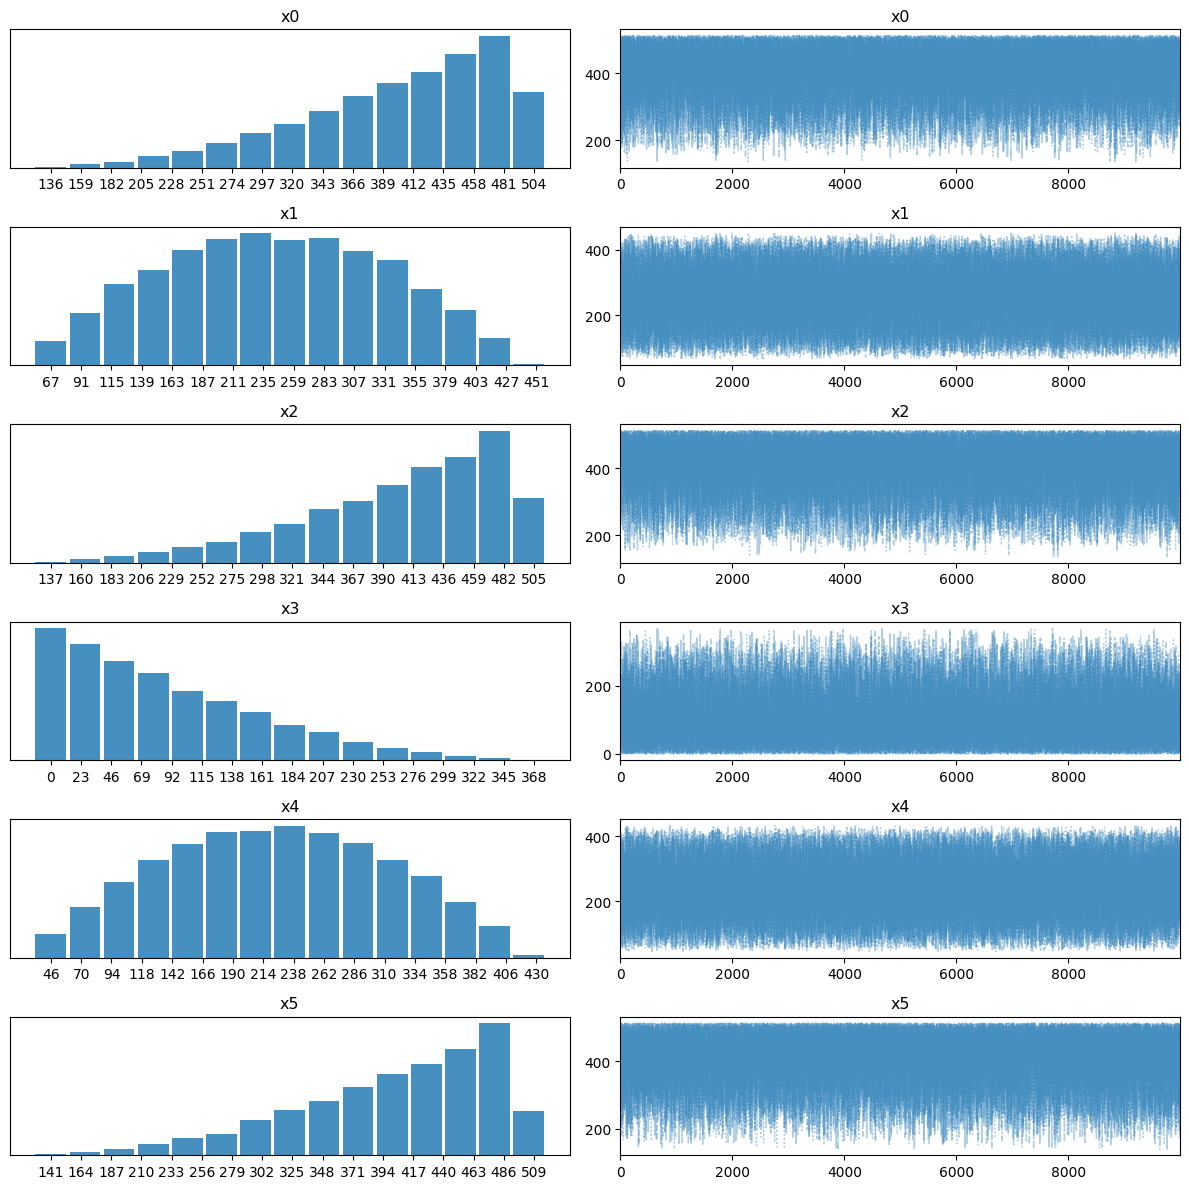

In [6]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('spur_trace_plot.png', dpi=150);

In [7]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,414.072,75.950,275.0,512.0,0.382,0.270,39546.0,39682.0,1.0
x1,256.721,87.269,97.0,406.0,0.439,0.310,39588.0,38987.0,1.0
x2,416.207,75.792,274.0,512.0,0.376,0.266,40731.0,39724.0,1.0
x3,97.687,75.876,0.0,237.0,0.380,0.269,40321.0,40104.0,1.0
x4,237.385,87.518,82.0,393.0,0.434,0.307,40609.0,39742.0,1.0
x5,414.408,76.095,274.0,512.0,0.381,0.269,39940.0,38632.0,1.0
